# <center>STUDENT AT INSTITUT POLYTECHNIQUE DE PARIS 24 MAY 2020</center>#
# <center>PROHACK/International Data Science Hackathon</center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

In [1]:
import csv
import marshal
import numpy as np
import pandas as pd
from math import sqrt
import networkx as nwx
import tensorflow as tf
from sklearn import svm
from sklearn.svm import SVC
from datetime import datetime
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

## I USE THIS FUNCTION TO DETERMINATE THE EXECUTION TIME

In [2]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## TO USE THIS FUNCTION TO SAVE THE TARGET RESULT

1-- This function take a list of of value(liste_to_save) and the string(file_name) and create a file named "file_name.csv" containing our values

In [3]:
#this function allow to save a list data in a csv file
def save_liste(liste_to_save,file_name):    
    size_liste=len(liste_to_save)
    file_name=file_name+".csv"
    
    with open(file_name, "w") as f_write:
        writer = csv.writer(f_write, delimiter=",")
        writer.writerow(("index","pred","opt_pred"))

        for i in range(size_liste):
            writer.writerow((i+1,float(liste_to_save[i][0]),float((liste_to_save[i][1]))))

## IMPORTING DATA 

In [4]:
#load the data
train_data=pd.read_csv("DATA/train.csv")
test_data=pd.read_csv("DATA/test.csv")

## TO SEE THE CHARACTERISTICS OF TRAINING AND TESTING DATAS

1- Here we display a summary of the characteristics of our data

In [5]:
#to see the size of the datas
print("training data size    = ",train_data.shape)
print("testing data size     = ",test_data.shape)

training data size    =  (3865, 80)
testing data size     =  (890, 79)


In [6]:
#see the type of each training data
print(train_data.dtypes)

galactic year                                                                         int64
galaxy                                                                               object
existence expectancy index                                                          float64
existence expectancy at birth                                                       float64
Gross income per capita                                                             float64
Income Index                                                                        float64
Expected years of education (galactic years)                                        float64
Mean years of education (galactic years)                                            float64
Intergalactic Development Index (IDI)                                               float64
Education Index                                                                     float64
Intergalactic Development Index (IDI), Rank                                     

In [7]:
#see the type of each testing data(bormaly it is the same with training)
print(test_data.dtypes)

galactic year                                                                         int64
galaxy                                                                               object
existence expectancy index                                                          float64
existence expectancy at birth                                                       float64
Gross income per capita                                                             float64
Income Index                                                                        float64
Expected years of education (galactic years)                                        float64
Mean years of education (galactic years)                                            float64
Intergalactic Development Index (IDI)                                               float64
Education Index                                                                     float64
Intergalactic Development Index (IDI), Rank                                     

In [8]:
#to see the statistique of the training data
print(train_data.describe(include="all"))

        galactic year              galaxy  existence expectancy index  \
count    3.865000e+03                3865                 3864.000000   
unique            NaN                 181                         NaN   
top               NaN  Andromeda XXII[57]                         NaN   
freq              NaN                  26                         NaN   
mean     1.000709e+06                 NaN                    0.872479   
std      6.945463e+03                 NaN                    0.162367   
min      9.900250e+05                 NaN                    0.227890   
25%      9.950060e+05                 NaN                    0.763027   
50%      1.000000e+06                 NaN                    0.907359   
75%      1.006009e+06                 NaN                    0.992760   
max      1.015056e+06                 NaN                    1.246908   

        existence expectancy at birth  Gross income per capita  Income Index  \
count                     3864.000000      

In [9]:
#galaxy is the only qualitative variable, so we see
print(train_data.galaxy.value_counts())

Andromeda XXII[57]                             26
Tucana Dwarf                                   26
Andromeda XXIV                                 26
Andromeda XIX[60]                              26
Andromeda XII                                  26
Boötes IV                                      25
Pegasus Dwarf Sph (And VI)                     25
NGC 147 (DDO 3)                                25
Canes Venatici II Dwarf                        25
Eridanus II                                    25
IC 1613 (UGC 668)                              25
Pisces II                                      25
Andromeda XXVIII                               25
Pisces V (Andromeda XVI)                       25
Andromeda II                                   25
Pegasus III                                    25
Cetus Dwarf                                    25
Andromeda XV                                   25
Andromeda VIII                                 25
Leo IV Dwarf                                   25


In [10]:
#Print the first lines for to see the caracteristic of training data and differents columns
print(train_data.head())

   galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                            

In [11]:
#to see the statistique of the testing data
print(test_data.describe(include="all"))

        galactic year       galaxy  existence expectancy index  \
count    8.900000e+02          890                  885.000000   
unique            NaN          172                         NaN   
top               NaN  Andromeda X                         NaN   
freq              NaN           10                         NaN   
mean     1.011498e+06          NaN                    0.923881   
std      2.881505e+03          NaN                    0.134856   
min      1.007012e+06          NaN                    0.456086   
25%      1.009020e+06          NaN                    0.834118   
50%      1.011030e+06          NaN                    0.944683   
75%      1.014049e+06          NaN                    1.022712   
max      1.016064e+06          NaN                    1.250508   

        existence expectancy at birth  Gross income per capita  Income Index  \
count                      885.000000               885.000000    885.000000   
unique                            NaN          

In [12]:
#Print the first lines for to see the caracteristic of testing data and differents columns
print(test_data.head())

   galactic year         galaxy  existence expectancy index  \
0        1007012        KK98 77                    0.456086   
1        1007012  Reticulum III                    0.529835   
2        1008016  Reticulum III                    0.560976   
3        1007012        Segue 1                    0.565910   
4        1013042        Virgo I                    0.588274   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      51.562543             12236.576447      0.593325   
1                      57.228262              3431.883825      0.675407   
2                      59.379539             27562.914252      0.594624   
3                      59.952390             20352.232905      0.837700   
4                      55.428320             23959.704016      0.520579   

   Expected years of education (galactic years)  \
0                                     10.414164   
1                                      7.239485   
2                

## TO DETERMINATE THE NUMBER AND THE PERCENTAGE OF THE MISSING VALUES FOR EACH COLUMNS 

1-- We use the isnull function to determine the missing values in the columns

2--We have created the list dolonne_a_supprimer which contains the list of columns to delete during preprocessing. These columns correspond to the column for which the percentage of missing data is greater than 15%

3--The column contains the data used for the training of our models

In [13]:
#we visualize the number of missing data for each column for training data
#We create a list "column_to_delete"
#we create a list "column_uses_for_the_training"
column_training_data=train_data.columns
column_to_delete=[]
column_uses_for_the_training=[]

for i in range(80):
    percentage=100*(train_data[train_data[column_training_data[i]].isnull()].shape[0]/train_data.shape[0])
    if(percentage >= 15):
        column_to_delete.append(column_training_data[i])
    else:
        column_uses_for_the_training.append(column_training_data[i])
    print(column_training_data[i]," = ", train_data[train_data[column_training_data[i]].isnull()].shape[0]," = ",percentage,"%train")
    
del column_uses_for_the_training[-1]

galactic year  =  0  =  0.0 %train
galaxy  =  0  =  0.0 %train
existence expectancy index  =  1  =  0.0258732212160414 %train
existence expectancy at birth  =  1  =  0.0258732212160414 %train
Gross income per capita  =  28  =  0.7244501940491591 %train
Income Index  =  28  =  0.7244501940491591 %train
Expected years of education (galactic years)  =  133  =  3.4411384217335055 %train
Mean years of education (galactic years)  =  363  =  9.391979301423028 %train
Intergalactic Development Index (IDI)  =  391  =  10.116429495472186 %train
Education Index  =  391  =  10.116429495472186 %train
Intergalactic Development Index (IDI), Rank  =  433  =  11.203104786545925 %train
Population using at least basic drinking-water services (%)  =  1844  =  47.71021992238034 %train
Population using at least basic sanitation services (%)  =  1850  =  47.86545924967658 %train
Gross capital formation (% of GGP)  =  2363  =  61.13842173350582 %train
Population, total (millions)  =  2594  =  67.11513583441139

In [14]:
#We can see here the percentage of missing rows in the test data on the columns that we want to keep for our analysis
column_testing_data=test_data.columns
for i in range(79):
    if((column_testing_data[i] in column_to_delete)==False ):
        print("Number of missing data ",column_testing_data[i]," = ", test_data[test_data[column_testing_data[i]].isnull()].shape[0]," = ",100*(test_data[test_data[column_testing_data[i]].isnull()].shape[0]/890),"%test")

Number of missing data  galactic year  =  0  =  0.0 %test
Number of missing data  galaxy  =  0  =  0.0 %test
Number of missing data  existence expectancy index  =  5  =  0.5617977528089888 %test
Number of missing data  existence expectancy at birth  =  5  =  0.5617977528089888 %test
Number of missing data  Gross income per capita  =  5  =  0.5617977528089888 %test
Number of missing data  Income Index  =  5  =  0.5617977528089888 %test
Number of missing data  Expected years of education (galactic years)  =  5  =  0.5617977528089888 %test
Number of missing data  Mean years of education (galactic years)  =  8  =  0.8988764044943821 %test
Number of missing data  Intergalactic Development Index (IDI)  =  8  =  0.8988764044943821 %test
Number of missing data  Education Index  =  8  =  0.8988764044943821 %test
Number of missing data  Intergalactic Development Index (IDI), Rank  =  10  =  1.1235955056179776 %test


# <center> PREPROCESSING DATA  </center>#

1--This function takes as argument a pandas dataframe containing our data in csv file and does the necessary preprocessing by returning an array numpy which will be used by our classification algorithms. To do this function, do the following processing.

2--No line in the dataframe is deleted: therefore the number of input lines is equal to the number of output lines

3--We remove all columns with a percentage of missing data in the training data greater than 15%.

4--We have transformed the qualitative variables galaxy into quantitative variable by encoding and after we have deleted the galaxy column

5--In the remaining columns, we replaced the missing data with the median value of the column.

6--We have transformed the panda datafram into a numpy array that our preprocessing function will return for

7--The returned numpy array will be used to train our models.

8--We must provide our processing function with a dataframe that does not include the index to predict: therefore a dataframe of 79 columns

9--At the end, we will return a numpy array with 11 columns

In [15]:
#we build the dictionnary that we will use for encoding the categoricial variable galaxy
galaxy_categoricial=train_data.galaxy.value_counts()
dictionnary_for_encoding_galaxy={}
i=0;
for cle in galaxy_categoricial.keys() :
    i=i+1
    dictionnary_for_encoding_galaxy[cle]=i

In [16]:
def Feature_Engineering_version_1(data):
    """We use this function to do the preprocessing of the datas"""
    
    #We delete all columns where the number of rows with missing data is greater than 15%
    #For this we use the list column_to_delete that we have created in
    column_data=data.columns
    nb_lines_data=data.shape[0]
    for i in range(79):
        if(column_data[i] in column_to_delete):
            del data[column_data[i]]    
    
    #We transforme the categorial variable galaxy in integer
    wassa=[]
    for i in range(nb_lines_data):
        wassa.append(dictionnary_for_encoding_galaxy[data.galaxy[i]])
    data["galaxy_encoding"]=wassa
    
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    
    #we transform the galaxy in galaxy_encoding in this list
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier

    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.median())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

In [17]:
def Feature_Engineering_version_2(data):
    """We use this function to do the preprocessing of the datas"""
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #test submission
    test_data=pd.read_csv("DATA/test.csv")
    train_data=pd.read_csv("DATA/train.csv")
    #--------------------------------------------------------------------------------------------------------------    
    #Add the columns training data of preprocessing in the data
    TEST_A_0=pd.get_dummies(train_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
        
    #Add the columns training data of preprocessing in the data
    TEST_B_0=pd.get_dummies(train_data["galactic year"])
    TEST_B_COLUMNS_0=TEST_B_0.columns
    for INDEX_1 in TEST_B_COLUMNS_0:
        data[INDEX_1]=TEST_B_0[INDEX_1]*0
    #--------------------------------------------------------------------------------------------------------------
    #Add the columns testing of preprocessing in the data
    TEST_A_0=pd.get_dummies(test_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    
    #Add the columns testing data of preprocessing in the data
    TEST_B_0=pd.get_dummies(test_data["galactic year"])
    TEST_B_COLUMNS_0=TEST_B_0.columns
    for INDEX_1 in TEST_B_COLUMNS_0:
        data[INDEX_1]=TEST_B_0[INDEX_1]*0
    #--------------------------------------------------------------------------------------------------------------
    #we transforme the categorial variable galaxy in integer
    TEST_A=pd.get_dummies(data.galaxy)
    TEST_A_COLUMNS=TEST_A.columns
    for INDEX in TEST_A_COLUMNS:
        data[INDEX]=TEST_A[INDEX]
    
    TEST_B=pd.get_dummies(data["galactic year"])
    TEST_B_COLUMNS=TEST_B.columns
    for INDEX_1 in TEST_B_COLUMNS:
        data[INDEX_1]=TEST_B[INDEX_1]
    #--------------------------------------------------------------------------------------------------------------
    ###############################################################################################################
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    #del data["galactic year"]
    
    #we transform the galaxy in galaxy_encoding in this list
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier

    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.median())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

In [18]:
def Feature_Engineering_version_3(data):
    """We use this function to do the preprocessing of the datas"""
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #test submission
    test_data=pd.read_csv("DATA/test.csv")
    train_data=pd.read_csv("DATA/train.csv")
    #--------------------------------------------------------------------------------------------------------------    
    #Add the columns training data of preprocessing in the data
    TEST_A_0=pd.get_dummies(train_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #Add the columns testing of preprocessing in the data
    TEST_A_0=pd.get_dummies(test_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #we transforme the categorial variable galaxy in integer
    TEST_A=pd.get_dummies(data.galaxy)
    TEST_A_COLUMNS=TEST_A.columns
    for INDEX in TEST_A_COLUMNS:
        data[INDEX]=TEST_A[INDEX]
    #--------------------------------------------------------------------------------------------------------------
    data["Life expectancy at birth"]=data["Life expectancy at birth, male (galactic years)"]*data["Life expectancy at birth, female (galactic years)"]/2
    del data["existence expectancy at birth"]
    #--------------------------------------------------------------------------------------------------------------
    ###############################################################################################################
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    del data["Current health expenditure (% of GGP)"]
    del data["Respiratory disease incidence (per 100,000 people)"]
    del data["Labour force participation rate (% ages 15 and older), female"]
    del data["Labour force participation rate (% ages 15 and older)"]
    #--------------------------------------------------------------------------------------------------------------
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier
    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.mean())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

In [19]:
def Feature_Engineering_version_4(data):
    """We use this function to do the preprocessing of the datas"""
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #test submission
    test_data=pd.read_csv("DATA/test.csv")
    train_data=pd.read_csv("DATA/train.csv")
    #--------------------------------------------------------------------------------------------------------------    
    #Add the columns training data of preprocessing in the data
    TEST_A_0=pd.get_dummies(train_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #Add the columns testing of preprocessing in the data
    TEST_A_0=pd.get_dummies(test_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #we transforme the categorial variable galaxy in integer
    TEST_A=pd.get_dummies(data.galaxy)
    TEST_A_COLUMNS=TEST_A.columns
    for INDEX in TEST_A_COLUMNS:
        data[INDEX]=TEST_A[INDEX]
    #--------------------------------------------------------------------------------------------------------------
    data["Life expectancy at birth"]=data["Life expectancy at birth, male (galactic years)"]*data["Life expectancy at birth, female (galactic years)"]/2
    del data["existence expectancy at birth"]
    ###############################################################################################################
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #data["existence expectancy"]=data["existence expectancy index"]*data["existence expectancy at birth"]
    #data["Intergalactic Development Index (IDI) Rank"]=data["Intergalactic Development Index (IDI), female, Rank"]*data["Intergalactic Development Index (IDI), male, Rank"]/2
    #data["Intergalactic Development Index (IDI)"]=data["Intergalactic Development Index (IDI), female"]*data["Intergalactic Development Index (IDI), male"]/2
    #data["Estimated gross galactic income per capita"]=data["Estimated gross galactic income per capita, male"]*data["Estimated gross galactic income per capita, female"]/2
    #data["Expected years of education"]=data["Expected years of education, female (galactic years)"]*data["Expected years of education, male (galactic years)"]/2
    #data["Mean years of education"]=data["Mean years of education, female (galactic years)"]*data["Mean years of education, male (galactic years)"]/2
    #data["Youth unemployment"]=data["Youth unemployment rate (female to male ratio)"]*data["Mortality rate, female grown up (per 1,000 people)"]
    #data["123 456 789"]=data["Population with at least some secondary education (% ages 25 and older)"]*data["Population, total (millions)"]
    #data["123 456 789"]=data["galactic year"]*data["Exports and imports (% of GGP)"]
    #data["random"]=data["Labour force participation rate (% ages 15 and older), female"]*data["Mortality rate, male grown up (per 1,000 people)"]/2
    #data["random1"]=data["Labour force participation rate (% ages 15 and older)"]*data["Mortality rate, female grown up (per 1,000 people)"]/2
    #data["random123456"]=np.exp(data["Labour force participation rate (% ages 15 and older), female"])
    #data["Labour force participatio"]=data["Labour force participation rate (% ages 15 and older)"]*data["Labour force participation rate (% ages 15 and older), female"]/2
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #del data["galactic year"]
    #del data["Mortality rate, female grown up (per 1,000 people)"]
    #del data["Mortality rate, male grown up (per 1,000 people)"]
    #we transform the galaxy in galaxy_encoding in this list
    #--------------------------------------------------------------------------------------------------------------
    ###############################################################################################################
    ###############################################################################################################
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    del data["Current health expenditure (% of GGP)"]
    del data["Respiratory disease incidence (per 100,000 people)"]
    del data["Labour force participation rate (% ages 15 and older), female"]
    del data["Labour force participation rate (% ages 15 and older)"]
    #--------------------------------------------------------------------------------------------------------------
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier
    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.mean())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

# <center> STRATEGY OF ENERGY OPTIMIZATION </center> #

1--In here we have use à lot of technique for allocate the energy. Each function represents a one method for allocate the energy.

In [20]:
def repartition_energy_strategy_1(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index < 0 .7 and
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index > 0 .7
    max_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["existence expectancy index"].max()+0.01
    max_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["existence expectancy index"].max()+0.01
    
    sum_existence_expectancy_index_sup_0_7=(max_sup_0_7-GALAXY_existence_expectancy_index_SUP_0_7["existence expectancy index"]).sum()
    sum_existence_expectancy_index_inf_0_7=(max_inf_0_7-GALAXY_existence_expectancy_index_INF_0_7["existence expectancy index"]).sum()
    
    #the liste thzt this function will return
    allocation_energy=[]
    
    #energy sharing
    energy_for_inf_0_7=percentage*500
    energy_for_sup_0_7=50000-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #process of distribution
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]>0.7):
            energy=(max_sup_0_7-data_energy["existence expectancy index"][i])*energy_for_sup_0_7/sum_existence_expectancy_index_sup_0_7
            if(energy>100):
                percentage_sup_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_sup_0_7+=energy
                allocation_energy.append(energy)
        else:
            energy=(max_inf_0_7-data_energy["existence expectancy index"][i])*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            if(energy>100):
                percentage_inf_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_inf_0_7+=energy
                allocation_energy.append(energy)
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return allocation_energy

In [21]:
def repartition_energy_strategy_2(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #we calculate potential increase
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    
    sum_existence_expectancy_index_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["Potential for increase in the Index"].sum()
    sum_existence_expectancy_index_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["Potential for increase in the Index"].sum()
    
    #the liste that this function will return
    allocation_energy=[]
    
    #energy sharing
    energy_for_inf_0_7=percentage*499.90
    energy_for_sup_0_7=49990-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #process of distribution
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]>0.7):
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_sup_0_7/sum_existence_expectancy_index_sup_0_7
            if(energy>100):
                percentage_sup_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_sup_0_7+=energy
                allocation_energy.append(energy)
        else:
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            if(energy>100):
                percentage_inf_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_inf_0_7+=energy
                allocation_energy.append(energy)
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return allocation_energy

In [22]:
def repartition_energy_strategy_3(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #may be delete
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3

    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]

    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index < 0 .7 and
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index > 0 .7
    max_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["y"].max()+0.001
    max_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["y"].max()+0.001
    
    #we calculate the sum of the y
    sum_y_sup_0_7=(max_sup_0_7-GALAXY_existence_expectancy_index_SUP_0_7["y"]).sum()
    sum_y_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["y"].sum()
    sum_existence_expectancy_index_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["Potential for increase in the Index"].sum()
    
    #the liste thzt this function will return
    allocation_energy=[]
    
    #for allocation energy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #energy sharing
    energy_for_inf_0_7=percentage*499.90
    energy_for_sup_0_7=49990-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0

        
    #process of distribution for the galaxy who have existence expectancy index<0.7
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]<0.7):
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            #energy=data_energy["y"][i]*energy_for_inf_0_7/sum_y_inf_0_7
            if(energy>100):
                data_energy["allocation energy"][i]=min(100,energy-100)
                percentage_inf_0_7+=min(100,energy-100)
            else:
                data_energy["allocation energy"][i]=energy
                percentage_inf_0_7+=energy
        else:
            energy=(max_sup_0_7-data_energy["y"][i])*energy_for_sup_0_7/sum_y_sup_0_7
            if(energy>100):
                data_energy["allocation energy"][i]=min(100,energy-100)
                percentage_sup_0_7+=min(100,energy-100)
            else:
                data_energy["allocation energy"][i]=energy
                percentage_sup_0_7+=energy
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return data_energy["allocation energy"].values.tolist()

In [23]:
def repartition_energy_strategy_4(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy. Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #may be delete
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3

    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]

    #we axtract the index in decreasing order of y for data with existence expectancy index>0.7 and existence 
    #expectancy index<0.7
    index_sort_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7.sort_values(["y"],ascending=[True])["y"].index
    index_sort_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_inf_0_7=percentage*500
    energy_for_sup_0_7=50000-energy_for_inf_0_7-200
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #for allocation energy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    # give the inf 0.7
    number_inf=energy_for_inf_0_7//100
    for i in index_sort_inf_0_7[:number_inf]:
        data_energy["allocation energy"][i]=100
        percentage_inf_0_7+=data_energy["allocation energy"][i]
    if(index_sort_inf_0_7.shape[0]>number_inf):
        for i in index_sort_inf_0_7[number_inf:]:
            data_energy["allocation energy"][i]=100/(index_sort_inf_0_7.shape[0]-number_inf)
            percentage_inf_0_7+=data_energy["allocation energy"][i]

    # give the sup 0.7
    number_sup=energy_for_sup_0_7//100
    for i in index_sort_sup_0_7[:number_sup]:
        data_energy["allocation energy"][i]=99
        percentage_sup_0_7+=data_energy["allocation energy"][i]
    if(index_sort_sup_0_7.shape[0]>number_sup):
        for i in index_sort_sup_0_7[number_sup:]:
            data_energy["allocation energy"][i]=100/(index_sort_sup_0_7.shape[0]-number_sup)
            percentage_sup_0_7+=data_energy["allocation energy"][i]
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return data_energy["allocation energy"].values.tolist()

In [24]:
def repartition_energy_strategy_5(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 1  DSML energy at the start, then we distribute the remaining energy by allocating 100  DSML 
    energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a <0.7"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=49990-data_energy.shape[0]
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #for allocation energy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0+1
    
    # give the inf 0.7
    for i in index_sort_:
        if(energy_for_max>0):
            data_energy["allocation energy"][i]=100
            energy_for_max-=99
            if(data_energy["existence expectancy index"][i]<0.7):
                percentage_inf_0_7+=data_energy["allocation energy"][i]
            else:
                percentage_sup_0_7+=data_energy["allocation energy"][i]
        else:
            if(data_energy["existence expectancy index"][i]<0.7):
                percentage_inf_0_7+=1
            else:
                percentage_sup_0_7+=1
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return data_energy["allocation energy"].values.tolist()

In [25]:
def repartition_energy_strategy_6(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 1  DSML energy at the start, then we distribute the remaining energy by allocating 100  DSML 
    energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a <0.7"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=49990-data_energy.shape[0]
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0+1
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in index_sort_:
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][i]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][i]=100
                energy_for_max-=99
                percentage_inf_0_7+=data_energy["allocation energy"][i]
            else:
                data_energy["allocation energy"][i]=100
                energy_for_max-=99
                percentage_sup_0_7+=data_energy["allocation energy"][i]
        else:
            if(data_energy["existence expectancy index"][i]<0.7):
                percentage_inf_0_7+=1
            else:
                percentage_sup_0_7+=1
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [26]:
def repartition_energy_strategy_7(data_energy,percentage):
    """In this case, we will calculate the the square of Potential for increase in the Index and classify the galaxies 
    by this value. After, wo give 100DSML energy for the 400first, then we will give 50 of the 100 first following, at
    the end we give 99,98,97,...,1 at the last
    """
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #may be delete
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3
    data_energy['Potential for increase in the Index square']=data_energy['Potential for increase in the Index']*data_energy['Potential for increase in the Index']
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    
    
    #we axtract the index in decreasing order of Potential for increase in the Index square
    #index_sort_=data_energy.sort_values(["Potential for increase in the Index square"],ascending=[True])["Potential for increase in the Index square"].index
    index_sort_INF_0_7=GALAXY_existence_expectancy_index_INF_0_7.sort_values(["Potential for increase in the Index square"],ascending=[False])["Potential for increase in the Index square"].index
    index_sort_SUP_0_7=GALAXY_existence_expectancy_index_SUP_0_7.sort_values(["Potential for increase in the Index square"],ascending=[False])["Potential for increase in the Index square"].index
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We give 100DSML energy of the 50 first lower existence expectancy index 
    for i in range(50):
        data_energy["allocation energy"][index_sort_INF_0_7[i]]=100
        
    #We give 100DSML energy of the 50 first lower existence expectancy index 
    for i in range(399):
        data_energy["allocation energy"][index_sort_SUP_0_7[i]]=100
                
    tampon=100
    for i in range(399,499):
        data_energy["allocation energy"][index_sort_SUP_0_7[i]]=tampon
        tampon-=1
        if(tampon==-1):
            print("------------NEGATIVE VALUE------------")
    
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]<0.7):
            percentage_inf_0_7+=data_energy["allocation energy"][i]
        else:
            percentage_sup_0_7+=data_energy["allocation energy"][i]
    
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    print("SQR ALLOCATION ENERGY==",data_energy['Potential for increase in the Index square'].sum())
        
    return data_energy["allocation energy"].values.tolist()
    
    

In [27]:
def repartition_energy_strategy_8(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in index_sort_:
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][i]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][i]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][i]
            else:
                data_energy["allocation energy"][i]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][i]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [28]:
def repartition_energy_strategy_9(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(400):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give 50 energy of the next 100
    for i in range(400,499):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=50
                energy_for_max-=50
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=50
                energy_for_max-=50
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    #we give energy of the next 100
    tamp=100
    for i in range(499,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [29]:
def repartition_energy_strategy_10(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(400):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give energy of the next 100
    tamp=100
    for i in range(400,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1-(i%2)
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1-(i%2)
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [30]:
def repartition_energy_strategy_11(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(300):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give energy of the next 100
    tamp=100
    for i in range(300,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                if(i%3==0):
                    tamp-=1
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                if(i%3==0):
                    tamp-=1
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [31]:
def Likely_increase_in_the_Index(E):
    """this function  take energy and return the likely increase"""
    prediction_repartition=np.abs(prediction_test)
    tampon=E*((3-np.log(prediction_repartition+0.01))*(3-np.log(prediction_repartition+0.01)))/1000
    
    return -np.sum(tampon) 
################################################################################################################
################################################################################################################
################################################################################################################
def repartition_energy_strategy_12(data_energy):
    """this functiuon use scipy optimization of python for calculate best allocation energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #The repartition value
    #prediction_repartition=np.abs(data_energy["y"].values.tolist())
    
    #initialization of energy
    #mask is list that value is 1 if it is data_energy["existence expectancy index"].iloc[i]<0.7, 0 other
    mask_0_7=[]
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"].iloc[i]<0.7):
            mask_0_7.append(1)
        else:
            mask_0_7.append(0)
            
    #Likely increase contrain
    cons=({'type': 'ineq',
          'fun': lambda E: 50000-np.sum(E)},
         {'type': 'ineq',
          'fun': lambda E: np.sum(E*mask_0_7)-5000},
         {'type': 'ineq',
          'fun': lambda E: E},
         {'type': 'ineq',
          'fun': lambda E: 100-E})    
#-------------------------------------------------------------------------------------------------------
    #Allocation energy at the begining
    E=np.array(repartition_energy_strategy_1(data_energy,10))
#-------------------------------------------------------------------------------------------------------
    #calculate the best allocation energy
    Energy = minimize(Likely_increase_in_the_Index, E, constraints=cons)
    
    #calculate the percentage of the energy we have allocated
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"].iloc[i]<0.7):
            percentage_inf_0_7+=Energy.x[i]
        else:
            percentage_sup_0_7+=Energy.x[i]
                
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",np.sum(Energy.x))
    
    return Energy.x

# <center> Uses this function for to have statistique in our prediction </center> #

In [32]:
def optimization_energey_statistique(prediction_liste):
    """This function calculate the potential for increase in the index, the Likely increase in the index, the total
    energy and the total index"""
    
    size_list=len(prediction_liste)
    Potential_for_increase_in_the_Index=0.0
    Likely_increase_in_the_Index=0.0
    total_index=0.0
    
    for i in range(size_list):
        Potential_for_increase_in_the_Index+= -np.log(prediction_liste[i][0]+0.01)+3
        Likely_increase_in_the_Index+=prediction_liste[i][1]*(-np.log(prediction_liste[i][0]+0.01)+3)*(-np.log(prediction_liste[i][0]+0.01)+3)/1000
        total_index+=prediction_liste[i][0]
        
    return Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index

# <center> Prediction Error Visualization Tools </center> #

In [33]:
def graphe_error_visualization(Y_node_test_preprocessing,prediction_,val_beg,val_end):
    """This function allow us to see the difference between of the real target y and the prediction between to index
    val_deb and val_end"""
    
    Y1=Y_node_test_preprocessing
    Y2=prediction_
    size_list=len(Y_node_test_preprocessing)
    X=np.arange(0, size_list)
    
    fig = plt.figure() # Create matplotlib figure
    plt.figure(figsize=(40,15))
    
    width = 0.15
    plt.bar(X[val_beg:val_end]-3*width/2, Y1[val_beg:val_end], width, color='b' )
    plt.bar(X[val_beg:val_end]-width/2, Y2[val_beg:val_end], width, color='r' )
    #Y1.set_ylabel('Predict index')
    #Y2.set_ylabel('Real index')

    plt.show()

# <center> Error Analysis Function </center> #

In [34]:
def error_change(Y_node_test_preprocessing,prediction_,rate):
    """this function displays the targets that present a prediction error greater than rate and make the 
    correction. After that, the function displays the RMSE before processing by the function and the RMSE after 
    processing"""
    
    rmse1=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    
    Y_node_test_preprocessing_values=np.array(Y_node_test_preprocessing.values)
    prediction_value=np.array(prediction_)
    
    for i in range(len(Y_node_test_preprocessing_values)):
    
        if(Y_node_test_preprocessing_values[i]-prediction_value[i]>rate):
            print("Y_node_test_preprocessing[",i,"]=",Y_node_test_preprocessing_values[i],"    prediction_value[",i,"]=",prediction_value[i]," error=",Y_node_test_preprocessing_values[i]-prediction_value[i])
            prediction_value[i]+=Y_node_test_preprocessing_values[i]-prediction_value[i]
    
        if(prediction_value[i]-Y_node_test_preprocessing_values[i]>rate):
            print("Y_node_test_preprocessing[",i,"]=",Y_node_test_preprocessing_values[i],"    prediction_value[",i,"]=",prediction_value[i]," error=",prediction_value[i]-Y_node_test_preprocessing_values[i])
            Y_node_test_preprocessing_values[i]+=prediction_value[i]-Y_node_test_preprocessing_values[i]
    
    rmse2=sqrt(mean_squared_error(Y_node_test_preprocessing_values,prediction_value))
    
    print("FIRST ERROR=",rmse1,"   SECOND ERROR=",rmse2)

# <center> Build Two graph using the prediction </center> #

In [35]:
def prediction_graph(prediction_test,middle):
    """this function takes à liste of float and an integer. It build the two graphe : the first is the graph
    who abciss is between 0 and the integer middle and the second the abciss is middle and the size of graph"""
    
    size_graphe=max(len(prediction_test),middle)
    init_graph=min(0,middle)
    middle_graph=0
    
    if(middle>0):
        middle_graph=min(middle,size_graphe)
    
    X=np.arange(0, size_graphe)
    Y=np.sort(np.array(prediction_test))
    
    #first graph
    plt.plot(X[init_graph:middle_graph], Y[init_graph:middle_graph], 'r')
    plt.xlabel('INDEX')
    plt.ylabel('PREDICTION')
    plt.title('GRAPH')
    plt.show()
    
    #second graph
    plt.plot(X[middle_graph:size_graphe], Y[middle_graph:size_graphe], 'r')
    plt.xlabel('INDEX')
    plt.ylabel('PREDICTION')
    plt.title('GRAPH')
    plt.show()

# <center> PREDICTION ALGORITHM </center> #

# 1-- we have implemented several classification algorithms. The goal is to determine which is the best algorithm.
# 2-- For each algorithm, we determined the execution time and we built a graph which gives the precision graph as a function of the number of parameters
# 3-- To train our prediction algorithms, we split the data into 2 parts: 70% for training the data and 30% for testing the data.


# GRADIENT BOOSTING REGRESSOR #


In [36]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
#we delete all variable we have an error superior of 0.04
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_2(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.26, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_BaggingRegressor=[]
parameter_BaggingRegressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_BaggingRegressor.append(i+1)
    bagging_regressor = GradientBoostingRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=2500, min_samples_leaf=1)
    #training the bagging model
    bagging_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)

    #predictor and calcul rms
    prediction_=bagging_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_BaggingRegressor.append(rmse)
timer(start_time)


Time taken: 0 hours 2 minutes and 22.62 seconds.


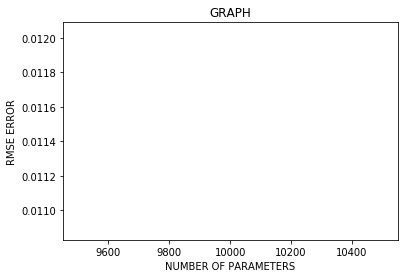

MIN ERROR RMSE== 0.011460301431975932     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [37]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(accuracy_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [38]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
nombre=0
#we see the nomber of galaxy who have the index superior at 0.6
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        nombre+=1
        #print(train_data["galaxy"].loc[i])
print("nombre==",nombre)

nombre== 2


<Figure size 432x288 with 0 Axes>

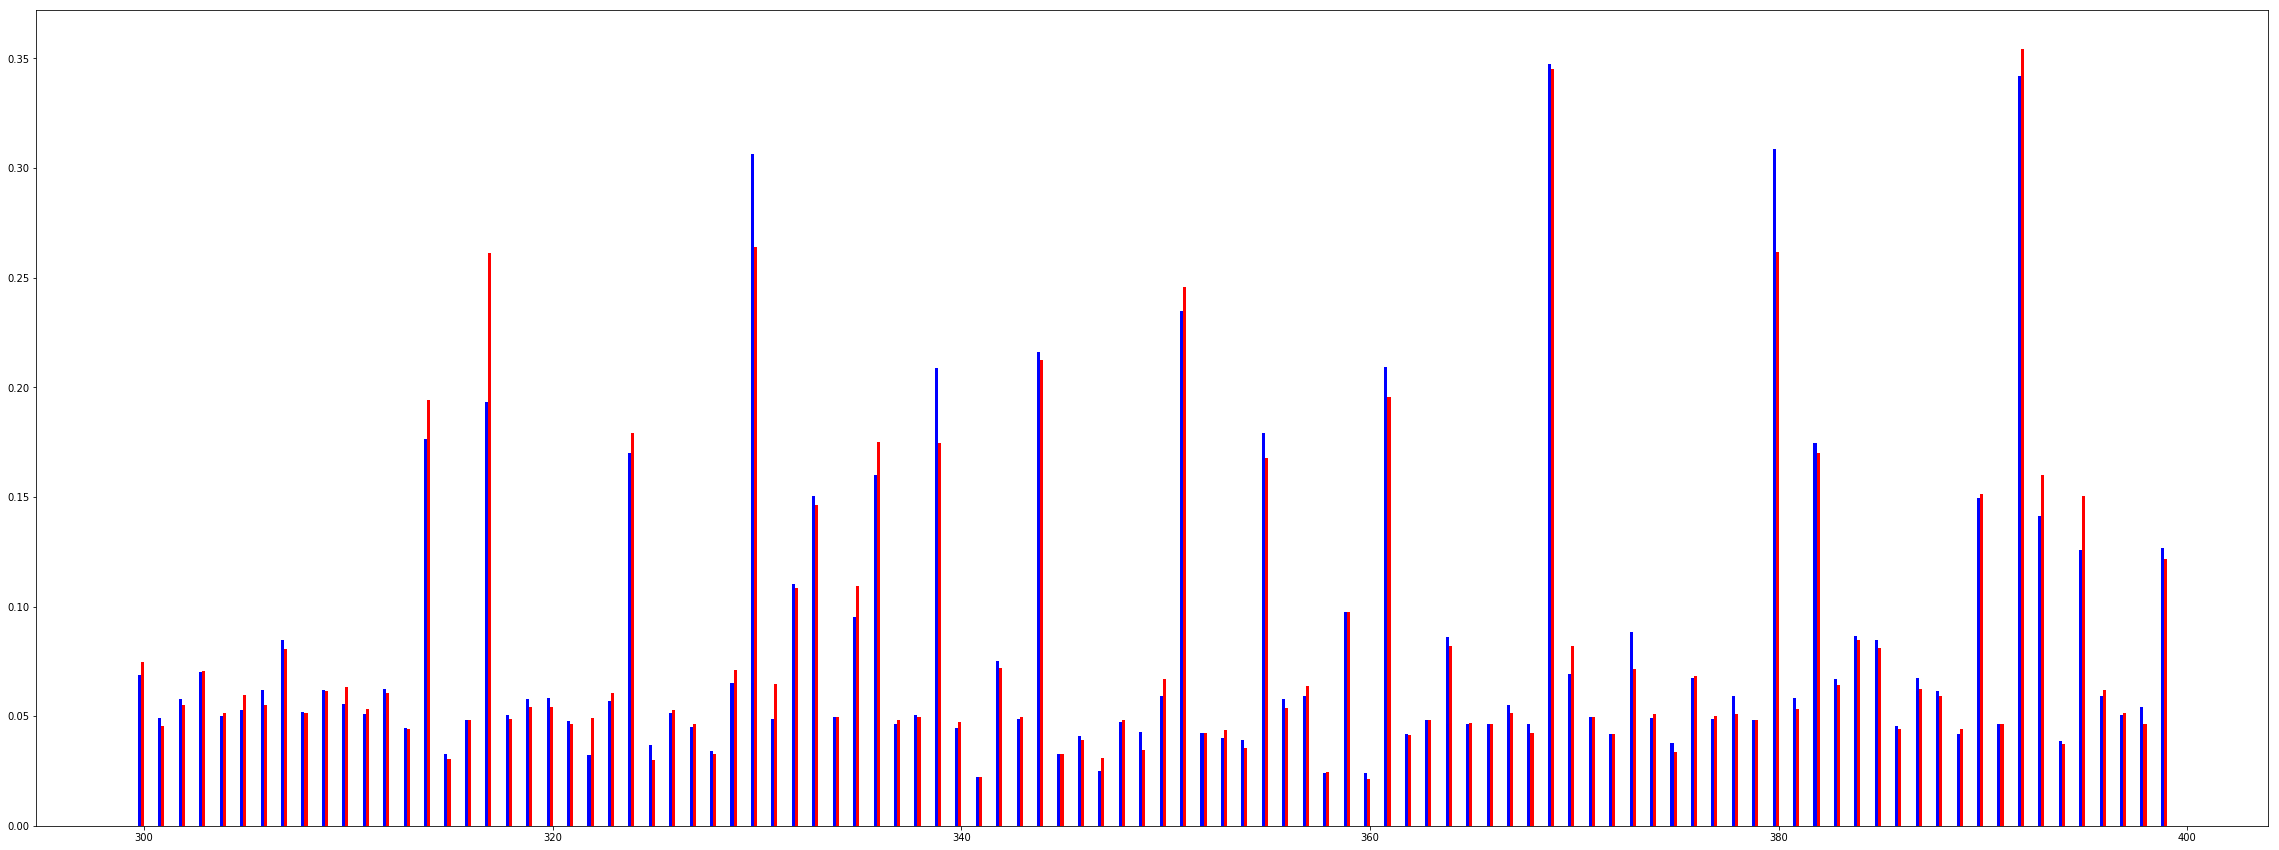

In [39]:
#visualisation error
graphe_error_visualization(Y_node_test_preprocessing,prediction_,300,400)

In [40]:
#analyze the error
error_change(Y_node_test_preprocessing,prediction_,0.04)

Y_node_test_preprocessing[ 136 ]= 0.2804153876368496     prediction_value[ 136 ]= 0.20856748845755463  error= 0.07184789917929496
Y_node_test_preprocessing[ 172 ]= 0.18921578262594246     prediction_value[ 172 ]= 0.27328127866673163  error= 0.08406549604078917
Y_node_test_preprocessing[ 317 ]= 0.19308279864664835     prediction_value[ 317 ]= 0.26132786629756827  error= 0.06824506765091992
Y_node_test_preprocessing[ 330 ]= 0.3064625422675257     prediction_value[ 330 ]= 0.2637667458847438  error= 0.04269579638278187
Y_node_test_preprocessing[ 380 ]= 0.3087296088594771     prediction_value[ 380 ]= 0.2615098938483048  error= 0.04721971501117228
Y_node_test_preprocessing[ 402 ]= 0.5253458574534273     prediction_value[ 402 ]= 0.3543905394699192  error= 0.1709553179835081
Y_node_test_preprocessing[ 407 ]= 0.3028396045686769     prediction_value[ 407 ]= 0.34717299374890076  error= 0.04433338918022384
Y_node_test_preprocessing[ 590 ]= 0.31797768228011536     prediction_value[ 590 ]= 0.2443652

In [42]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
###############################################################################################################
###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.1):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]
################################################################################################################
#--------------------------------------------------------------------------------------------------------------#
#preprocessing Data
#train_data_preprocessing=Feature_Engineering_version_1train_data)
#test_data_preprocessing=Feature_Engineering_version_1(test_data)
train_data_preprocessing=Feature_Engineering_version_2(train_data)
test_data_preprocessing=Feature_Engineering_version_2(test_data)
#train_data_preprocessing=Feature_Engineering_version_3(train_data)
#test_data_preprocessing=Feature_Engineering_version_3(test_data)
#train_data_preprocessing=Feature_Engineering_version_4(train_data)
#test_data_preprocessing=Feature_Engineering_version_4(test_data)
#--------------------------------------------------------------------------------------------------------------#
################################################################################################################
#build the model
bagging_regressor = GradientBoostingRegressor(n_estimators=10001, learning_rate= 0.09, max_depth=3,min_samples_split=2500, min_samples_leaf=1)
#fit the model
bagging_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)


prediction_test=bagging_regressor.predict(test_data_preprocessing)
test_data["y"]=np.abs(prediction_test)
################################################################################################################
#---------------------------------------------------------------------------------------------------------------
#op_pred=repartition_energy_strategy_1(test_data,10)
#op_pred=repartition_energy_strategy_2(test_data,11)
#op_pred=repartition_energy_strategy_3(test_data,11)
#op_pred=repartition_energy_strategy_4(test_data,10)
#op_pred=repartition_energy_strategy_5(test_data,10)
#op_pred=repartition_energy_strategy_6(test_data,10)
#op_pred=repartition_energy_strategy_7(test_data,10)
#op_pred=repartition_energy_strategy_9(test_data,10)
#op_pred=repartition_energy_strategy_10(test_data,10)
op_pred=repartition_energy_strategy_11(test_data,10)
#op_pred=repartition_energy_strategy_12(test_data)

#---------------------------------------------------------------------------------------------------------------
################################################################################################################
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([np.abs(prediction_test[i]),np.abs(op_pred[i])])
    
    
#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("----------------------------------------------------------------------------------------------------------")
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
#save_liste(prediction_liste,"prediction_")
save_liste(prediction_liste,"_")

/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value i

percentage_sup_0_7== 0.7971
percentage_inf_0_7== 0.1019
Total energy== 44950.0
----------------------------------------------------------------------------------------------------------
POTENTIAL FOR INCREASE ON THE INDEX  =  5187.391327797669
LIKELY INCREASE IN THE INDEX         =  1662.837626331252
TOTAL INDEX                          =  46.40474832602282


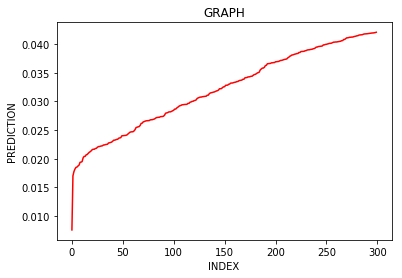

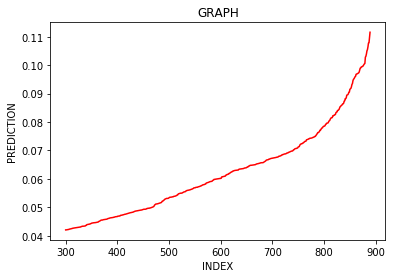

In [43]:
#prediction courbe
prediction_graph(prediction_test,300)

# <center >CatBoost REGRESSOR </center> #

In [44]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.25, random_state=10)


#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
from catboost import CatBoostRegressor
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_catBoostRegressor=[]
parameter_catBoostRegressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_catBoostRegressor.append(i+1)
    #model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)
    catBoost_regressor=CatBoostRegressor(iterations=10000, depth=3, learning_rate=0.1, loss_function='RMSE')
    #training the bagging model
    catBoost_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)

    #predictor and calcul rms
    prediction_=catBoost_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_catBoostRegressor.append(rmse)
timer(start_time)

0:	learn: 0.0968443	total: 60.8ms	remaining: 10m 7s
1:	learn: 0.0893330	total: 68.2ms	remaining: 5m 40s
2:	learn: 0.0824343	total: 81.3ms	remaining: 4m 30s
3:	learn: 0.0763090	total: 96ms	remaining: 3m 59s
4:	learn: 0.0709238	total: 106ms	remaining: 3m 32s
5:	learn: 0.0659695	total: 117ms	remaining: 3m 14s
6:	learn: 0.0618282	total: 126ms	remaining: 2m 59s
7:	learn: 0.0579345	total: 132ms	remaining: 2m 44s
8:	learn: 0.0544875	total: 141ms	remaining: 2m 36s
9:	learn: 0.0515105	total: 147ms	remaining: 2m 26s
10:	learn: 0.0490521	total: 157ms	remaining: 2m 22s
11:	learn: 0.0467145	total: 163ms	remaining: 2m 15s
12:	learn: 0.0448959	total: 173ms	remaining: 2m 12s
13:	learn: 0.0431069	total: 180ms	remaining: 2m 8s
14:	learn: 0.0415830	total: 191ms	remaining: 2m 7s
15:	learn: 0.0400481	total: 198ms	remaining: 2m 3s
16:	learn: 0.0386513	total: 212ms	remaining: 2m 4s
17:	learn: 0.0374213	total: 222ms	remaining: 2m 2s
18:	learn: 0.0362964	total: 230ms	remaining: 2m
19:	learn: 0.0354083	total: 2

167:	learn: 0.0181545	total: 1.26s	remaining: 1m 13s
168:	learn: 0.0180505	total: 1.26s	remaining: 1m 13s
169:	learn: 0.0179986	total: 1.27s	remaining: 1m 13s
170:	learn: 0.0179824	total: 1.28s	remaining: 1m 13s
171:	learn: 0.0179700	total: 1.29s	remaining: 1m 13s
172:	learn: 0.0179643	total: 1.3s	remaining: 1m 13s
173:	learn: 0.0179604	total: 1.3s	remaining: 1m 13s
174:	learn: 0.0179577	total: 1.31s	remaining: 1m 13s
175:	learn: 0.0179561	total: 1.32s	remaining: 1m 13s
176:	learn: 0.0179407	total: 1.33s	remaining: 1m 13s
177:	learn: 0.0179388	total: 1.33s	remaining: 1m 13s
178:	learn: 0.0179369	total: 1.34s	remaining: 1m 13s
179:	learn: 0.0179316	total: 1.34s	remaining: 1m 13s
180:	learn: 0.0178881	total: 1.35s	remaining: 1m 13s
181:	learn: 0.0178848	total: 1.36s	remaining: 1m 13s
182:	learn: 0.0178822	total: 1.36s	remaining: 1m 13s
183:	learn: 0.0178755	total: 1.37s	remaining: 1m 13s
184:	learn: 0.0178666	total: 1.37s	remaining: 1m 12s
185:	learn: 0.0178260	total: 1.38s	remaining: 1m

327:	learn: 0.0156344	total: 2.25s	remaining: 1m 6s
328:	learn: 0.0156044	total: 2.26s	remaining: 1m 6s
329:	learn: 0.0156044	total: 2.27s	remaining: 1m 6s
330:	learn: 0.0156043	total: 2.28s	remaining: 1m 6s
331:	learn: 0.0156018	total: 2.28s	remaining: 1m 6s
332:	learn: 0.0155832	total: 2.29s	remaining: 1m 6s
333:	learn: 0.0155464	total: 2.3s	remaining: 1m 6s
334:	learn: 0.0155164	total: 2.31s	remaining: 1m 6s
335:	learn: 0.0155164	total: 2.31s	remaining: 1m 6s
336:	learn: 0.0155146	total: 2.32s	remaining: 1m 6s
337:	learn: 0.0155064	total: 2.33s	remaining: 1m 6s
338:	learn: 0.0154981	total: 2.33s	remaining: 1m 6s
339:	learn: 0.0154977	total: 2.34s	remaining: 1m 6s
340:	learn: 0.0154970	total: 2.34s	remaining: 1m 6s
341:	learn: 0.0154726	total: 2.35s	remaining: 1m 6s
342:	learn: 0.0154488	total: 2.35s	remaining: 1m 6s
343:	learn: 0.0154487	total: 2.36s	remaining: 1m 6s
344:	learn: 0.0154475	total: 2.37s	remaining: 1m 6s
345:	learn: 0.0154434	total: 2.37s	remaining: 1m 6s
346:	learn: 0

489:	learn: 0.0141563	total: 3.44s	remaining: 1m 6s
490:	learn: 0.0141557	total: 3.45s	remaining: 1m 6s
491:	learn: 0.0141263	total: 3.46s	remaining: 1m 6s
492:	learn: 0.0141056	total: 3.46s	remaining: 1m 6s
493:	learn: 0.0141053	total: 3.47s	remaining: 1m 6s
494:	learn: 0.0141052	total: 3.48s	remaining: 1m 6s
495:	learn: 0.0141046	total: 3.5s	remaining: 1m 6s
496:	learn: 0.0141043	total: 3.51s	remaining: 1m 7s
497:	learn: 0.0141038	total: 3.52s	remaining: 1m 7s
498:	learn: 0.0141038	total: 3.53s	remaining: 1m 7s
499:	learn: 0.0141038	total: 3.53s	remaining: 1m 7s
500:	learn: 0.0141034	total: 3.54s	remaining: 1m 7s
501:	learn: 0.0140984	total: 3.55s	remaining: 1m 7s
502:	learn: 0.0140970	total: 3.55s	remaining: 1m 7s
503:	learn: 0.0140849	total: 3.56s	remaining: 1m 7s
504:	learn: 0.0140830	total: 3.57s	remaining: 1m 7s
505:	learn: 0.0140823	total: 3.57s	remaining: 1m 7s
506:	learn: 0.0140723	total: 3.58s	remaining: 1m 7s
507:	learn: 0.0140514	total: 3.58s	remaining: 1m 6s
508:	learn: 0

663:	learn: 0.0133443	total: 4.62s	remaining: 1m 4s
664:	learn: 0.0133424	total: 4.63s	remaining: 1m 4s
665:	learn: 0.0133423	total: 4.64s	remaining: 1m 4s
666:	learn: 0.0133416	total: 4.64s	remaining: 1m 4s
667:	learn: 0.0133094	total: 4.65s	remaining: 1m 4s
668:	learn: 0.0132947	total: 4.66s	remaining: 1m 4s
669:	learn: 0.0132794	total: 4.66s	remaining: 1m 4s
670:	learn: 0.0132785	total: 4.67s	remaining: 1m 4s
671:	learn: 0.0132534	total: 4.68s	remaining: 1m 4s
672:	learn: 0.0132515	total: 4.68s	remaining: 1m 4s
673:	learn: 0.0132513	total: 4.69s	remaining: 1m 4s
674:	learn: 0.0132342	total: 4.7s	remaining: 1m 4s
675:	learn: 0.0132340	total: 4.71s	remaining: 1m 4s
676:	learn: 0.0132255	total: 4.71s	remaining: 1m 4s
677:	learn: 0.0132239	total: 4.72s	remaining: 1m 4s
678:	learn: 0.0132237	total: 4.72s	remaining: 1m 4s
679:	learn: 0.0132234	total: 4.73s	remaining: 1m 4s
680:	learn: 0.0132234	total: 4.74s	remaining: 1m 4s
681:	learn: 0.0132028	total: 4.74s	remaining: 1m 4s
682:	learn: 0

844:	learn: 0.0124631	total: 5.79s	remaining: 1m 2s
845:	learn: 0.0124624	total: 5.8s	remaining: 1m 2s
846:	learn: 0.0124621	total: 5.81s	remaining: 1m 2s
847:	learn: 0.0124574	total: 5.83s	remaining: 1m 2s
848:	learn: 0.0124563	total: 5.84s	remaining: 1m 2s
849:	learn: 0.0124561	total: 5.85s	remaining: 1m 2s
850:	learn: 0.0124542	total: 5.86s	remaining: 1m 2s
851:	learn: 0.0124501	total: 5.86s	remaining: 1m 2s
852:	learn: 0.0124499	total: 5.87s	remaining: 1m 2s
853:	learn: 0.0124499	total: 5.88s	remaining: 1m 2s
854:	learn: 0.0124496	total: 5.88s	remaining: 1m 2s
855:	learn: 0.0124496	total: 5.89s	remaining: 1m 2s
856:	learn: 0.0124496	total: 5.89s	remaining: 1m 2s
857:	learn: 0.0124384	total: 5.9s	remaining: 1m 2s
858:	learn: 0.0124377	total: 5.91s	remaining: 1m 2s
859:	learn: 0.0124373	total: 5.91s	remaining: 1m 2s
860:	learn: 0.0124324	total: 5.92s	remaining: 1m 2s
861:	learn: 0.0124312	total: 5.92s	remaining: 1m 2s
862:	learn: 0.0124311	total: 5.93s	remaining: 1m 2s
863:	learn: 0.

1014:	learn: 0.0120183	total: 6.97s	remaining: 1m 1s
1015:	learn: 0.0120182	total: 6.97s	remaining: 1m 1s
1016:	learn: 0.0120180	total: 6.98s	remaining: 1m 1s
1017:	learn: 0.0120170	total: 6.99s	remaining: 1m 1s
1018:	learn: 0.0120162	total: 7s	remaining: 1m 1s
1019:	learn: 0.0119991	total: 7s	remaining: 1m 1s
1020:	learn: 0.0119983	total: 7.01s	remaining: 1m 1s
1021:	learn: 0.0119966	total: 7.02s	remaining: 1m 1s
1022:	learn: 0.0119847	total: 7.02s	remaining: 1m 1s
1023:	learn: 0.0119795	total: 7.03s	remaining: 1m 1s
1024:	learn: 0.0119712	total: 7.04s	remaining: 1m 1s
1025:	learn: 0.0119692	total: 7.04s	remaining: 1m 1s
1026:	learn: 0.0119613	total: 7.05s	remaining: 1m 1s
1027:	learn: 0.0119608	total: 7.06s	remaining: 1m 1s
1028:	learn: 0.0119603	total: 7.06s	remaining: 1m 1s
1029:	learn: 0.0119597	total: 7.07s	remaining: 1m 1s
1030:	learn: 0.0119597	total: 7.08s	remaining: 1m 1s
1031:	learn: 0.0119591	total: 7.08s	remaining: 1m 1s
1032:	learn: 0.0119589	total: 7.09s	remaining: 1m 1s

1201:	learn: 0.0114912	total: 8.13s	remaining: 59.5s
1202:	learn: 0.0114905	total: 8.14s	remaining: 59.5s
1203:	learn: 0.0114895	total: 8.15s	remaining: 59.5s
1204:	learn: 0.0114892	total: 8.15s	remaining: 59.5s
1205:	learn: 0.0114887	total: 8.16s	remaining: 59.5s
1206:	learn: 0.0114886	total: 8.17s	remaining: 59.5s
1207:	learn: 0.0114886	total: 8.17s	remaining: 59.5s
1208:	learn: 0.0114688	total: 8.19s	remaining: 59.5s
1209:	learn: 0.0114677	total: 8.2s	remaining: 59.6s
1210:	learn: 0.0114675	total: 8.2s	remaining: 59.5s
1211:	learn: 0.0114670	total: 8.21s	remaining: 59.5s
1212:	learn: 0.0114669	total: 8.22s	remaining: 59.5s
1213:	learn: 0.0114666	total: 8.22s	remaining: 59.5s
1214:	learn: 0.0114664	total: 8.23s	remaining: 59.5s
1215:	learn: 0.0114664	total: 8.23s	remaining: 59.5s
1216:	learn: 0.0114663	total: 8.24s	remaining: 59.5s
1217:	learn: 0.0114662	total: 8.24s	remaining: 59.4s
1218:	learn: 0.0114661	total: 8.25s	remaining: 59.4s
1219:	learn: 0.0114661	total: 8.26s	remaining: 5

1364:	learn: 0.0112699	total: 9.1s	remaining: 57.5s
1365:	learn: 0.0112538	total: 9.1s	remaining: 57.5s
1366:	learn: 0.0112534	total: 9.11s	remaining: 57.5s
1367:	learn: 0.0112532	total: 9.12s	remaining: 57.5s
1368:	learn: 0.0112530	total: 9.12s	remaining: 57.5s
1369:	learn: 0.0112530	total: 9.13s	remaining: 57.5s
1370:	learn: 0.0112528	total: 9.13s	remaining: 57.5s
1371:	learn: 0.0112508	total: 9.14s	remaining: 57.5s
1372:	learn: 0.0112505	total: 9.14s	remaining: 57.4s
1373:	learn: 0.0112489	total: 9.15s	remaining: 57.4s
1374:	learn: 0.0112472	total: 9.15s	remaining: 57.4s
1375:	learn: 0.0112471	total: 9.16s	remaining: 57.4s
1376:	learn: 0.0112471	total: 9.16s	remaining: 57.4s
1377:	learn: 0.0112470	total: 9.17s	remaining: 57.4s
1378:	learn: 0.0112470	total: 9.18s	remaining: 57.4s
1379:	learn: 0.0112468	total: 9.18s	remaining: 57.4s
1380:	learn: 0.0112461	total: 9.19s	remaining: 57.3s
1381:	learn: 0.0112461	total: 9.2s	remaining: 57.3s
1382:	learn: 0.0112459	total: 9.2s	remaining: 57.

1523:	learn: 0.0110543	total: 10s	remaining: 55.9s
1524:	learn: 0.0110542	total: 10.1s	remaining: 55.9s
1525:	learn: 0.0110459	total: 10.1s	remaining: 55.9s
1526:	learn: 0.0110458	total: 10.1s	remaining: 55.9s
1527:	learn: 0.0110457	total: 10.1s	remaining: 55.9s
1528:	learn: 0.0110452	total: 10.1s	remaining: 55.9s
1529:	learn: 0.0110330	total: 10.1s	remaining: 55.8s
1530:	learn: 0.0110329	total: 10.1s	remaining: 55.8s
1531:	learn: 0.0110329	total: 10.1s	remaining: 55.8s
1532:	learn: 0.0110329	total: 10.1s	remaining: 55.8s
1533:	learn: 0.0110312	total: 10.1s	remaining: 55.8s
1534:	learn: 0.0110305	total: 10.1s	remaining: 55.8s
1535:	learn: 0.0110305	total: 10.1s	remaining: 55.8s
1536:	learn: 0.0110305	total: 10.1s	remaining: 55.8s
1537:	learn: 0.0110305	total: 10.1s	remaining: 55.8s
1538:	learn: 0.0110303	total: 10.1s	remaining: 55.8s
1539:	learn: 0.0110302	total: 10.1s	remaining: 55.7s
1540:	learn: 0.0110301	total: 10.2s	remaining: 55.7s
1541:	learn: 0.0110301	total: 10.2s	remaining: 5

1708:	learn: 0.0108010	total: 11.2s	remaining: 54.3s
1709:	learn: 0.0108000	total: 11.2s	remaining: 54.3s
1710:	learn: 0.0107999	total: 11.2s	remaining: 54.3s
1711:	learn: 0.0107996	total: 11.2s	remaining: 54.3s
1712:	learn: 0.0107996	total: 11.2s	remaining: 54.3s
1713:	learn: 0.0107995	total: 11.2s	remaining: 54.3s
1714:	learn: 0.0107986	total: 11.2s	remaining: 54.3s
1715:	learn: 0.0107979	total: 11.2s	remaining: 54.3s
1716:	learn: 0.0107911	total: 11.3s	remaining: 54.3s
1717:	learn: 0.0107908	total: 11.3s	remaining: 54.3s
1718:	learn: 0.0107906	total: 11.3s	remaining: 54.3s
1719:	learn: 0.0107906	total: 11.3s	remaining: 54.3s
1720:	learn: 0.0107906	total: 11.3s	remaining: 54.3s
1721:	learn: 0.0107899	total: 11.3s	remaining: 54.3s
1722:	learn: 0.0107896	total: 11.3s	remaining: 54.3s
1723:	learn: 0.0107896	total: 11.3s	remaining: 54.3s
1724:	learn: 0.0107894	total: 11.3s	remaining: 54.3s
1725:	learn: 0.0107812	total: 11.3s	remaining: 54.3s
1726:	learn: 0.0107811	total: 11.3s	remaining:

1871:	learn: 0.0106489	total: 12.3s	remaining: 53.6s
1872:	learn: 0.0106487	total: 12.4s	remaining: 53.6s
1873:	learn: 0.0106439	total: 12.4s	remaining: 53.6s
1874:	learn: 0.0106435	total: 12.4s	remaining: 53.6s
1875:	learn: 0.0106432	total: 12.4s	remaining: 53.6s
1876:	learn: 0.0106431	total: 12.4s	remaining: 53.6s
1877:	learn: 0.0106350	total: 12.4s	remaining: 53.6s
1878:	learn: 0.0106350	total: 12.4s	remaining: 53.6s
1879:	learn: 0.0106349	total: 12.4s	remaining: 53.6s
1880:	learn: 0.0106349	total: 12.4s	remaining: 53.6s
1881:	learn: 0.0106349	total: 12.4s	remaining: 53.6s
1882:	learn: 0.0106348	total: 12.4s	remaining: 53.6s
1883:	learn: 0.0106345	total: 12.4s	remaining: 53.6s
1884:	learn: 0.0106343	total: 12.4s	remaining: 53.6s
1885:	learn: 0.0106341	total: 12.5s	remaining: 53.6s
1886:	learn: 0.0106341	total: 12.5s	remaining: 53.6s
1887:	learn: 0.0106340	total: 12.5s	remaining: 53.6s
1888:	learn: 0.0106338	total: 12.5s	remaining: 53.6s
1889:	learn: 0.0106317	total: 12.5s	remaining:

2051:	learn: 0.0104878	total: 13.5s	remaining: 52.2s
2052:	learn: 0.0104877	total: 13.5s	remaining: 52.2s
2053:	learn: 0.0104865	total: 13.5s	remaining: 52.2s
2054:	learn: 0.0104864	total: 13.5s	remaining: 52.2s
2055:	learn: 0.0104795	total: 13.5s	remaining: 52.2s
2056:	learn: 0.0104791	total: 13.5s	remaining: 52.2s
2057:	learn: 0.0104789	total: 13.5s	remaining: 52.2s
2058:	learn: 0.0104785	total: 13.5s	remaining: 52.2s
2059:	learn: 0.0104785	total: 13.5s	remaining: 52.2s
2060:	learn: 0.0104784	total: 13.5s	remaining: 52.1s
2061:	learn: 0.0104783	total: 13.5s	remaining: 52.1s
2062:	learn: 0.0104783	total: 13.5s	remaining: 52.1s
2063:	learn: 0.0104777	total: 13.6s	remaining: 52.1s
2064:	learn: 0.0104776	total: 13.6s	remaining: 52.1s
2065:	learn: 0.0104776	total: 13.6s	remaining: 52.1s
2066:	learn: 0.0104761	total: 13.6s	remaining: 52.1s
2067:	learn: 0.0104759	total: 13.6s	remaining: 52.1s
2068:	learn: 0.0104758	total: 13.6s	remaining: 52.1s
2069:	learn: 0.0104758	total: 13.6s	remaining:

2209:	learn: 0.0103442	total: 14.4s	remaining: 50.8s
2210:	learn: 0.0103435	total: 14.4s	remaining: 50.8s
2211:	learn: 0.0103434	total: 14.4s	remaining: 50.8s
2212:	learn: 0.0103433	total: 14.4s	remaining: 50.8s
2213:	learn: 0.0103403	total: 14.4s	remaining: 50.8s
2214:	learn: 0.0103403	total: 14.5s	remaining: 50.8s
2215:	learn: 0.0103381	total: 14.5s	remaining: 50.8s
2216:	learn: 0.0103380	total: 14.5s	remaining: 50.8s
2217:	learn: 0.0103379	total: 14.5s	remaining: 50.8s
2218:	learn: 0.0103325	total: 14.5s	remaining: 50.8s
2219:	learn: 0.0103318	total: 14.5s	remaining: 50.8s
2220:	learn: 0.0103315	total: 14.5s	remaining: 50.8s
2221:	learn: 0.0103305	total: 14.5s	remaining: 50.7s
2222:	learn: 0.0103303	total: 14.5s	remaining: 50.7s
2223:	learn: 0.0103303	total: 14.5s	remaining: 50.7s
2224:	learn: 0.0103299	total: 14.5s	remaining: 50.7s
2225:	learn: 0.0103298	total: 14.5s	remaining: 50.7s
2226:	learn: 0.0103295	total: 14.5s	remaining: 50.7s
2227:	learn: 0.0103294	total: 14.5s	remaining:

2372:	learn: 0.0101970	total: 15.4s	remaining: 49.4s
2373:	learn: 0.0101969	total: 15.4s	remaining: 49.4s
2374:	learn: 0.0101969	total: 15.4s	remaining: 49.4s
2375:	learn: 0.0101969	total: 15.4s	remaining: 49.3s
2376:	learn: 0.0101957	total: 15.4s	remaining: 49.3s
2377:	learn: 0.0101954	total: 15.4s	remaining: 49.3s
2378:	learn: 0.0101947	total: 15.4s	remaining: 49.3s
2379:	learn: 0.0101946	total: 15.4s	remaining: 49.3s
2380:	learn: 0.0101945	total: 15.4s	remaining: 49.3s
2381:	learn: 0.0101941	total: 15.4s	remaining: 49.3s
2382:	learn: 0.0101939	total: 15.4s	remaining: 49.3s
2383:	learn: 0.0101938	total: 15.4s	remaining: 49.3s
2384:	learn: 0.0101937	total: 15.4s	remaining: 49.3s
2385:	learn: 0.0101735	total: 15.4s	remaining: 49.2s
2386:	learn: 0.0101733	total: 15.4s	remaining: 49.2s
2387:	learn: 0.0101726	total: 15.4s	remaining: 49.2s
2388:	learn: 0.0101726	total: 15.4s	remaining: 49.2s
2389:	learn: 0.0101687	total: 15.5s	remaining: 49.2s
2390:	learn: 0.0101687	total: 15.5s	remaining:

2537:	learn: 0.0100662	total: 16.3s	remaining: 47.9s
2538:	learn: 0.0100662	total: 16.3s	remaining: 47.9s
2539:	learn: 0.0100662	total: 16.3s	remaining: 47.9s
2540:	learn: 0.0100662	total: 16.3s	remaining: 47.9s
2541:	learn: 0.0100661	total: 16.3s	remaining: 47.9s
2542:	learn: 0.0100614	total: 16.3s	remaining: 47.9s
2543:	learn: 0.0100612	total: 16.3s	remaining: 47.9s
2544:	learn: 0.0100612	total: 16.3s	remaining: 47.8s
2545:	learn: 0.0100612	total: 16.3s	remaining: 47.8s
2546:	learn: 0.0100603	total: 16.3s	remaining: 47.8s
2547:	learn: 0.0100598	total: 16.4s	remaining: 47.8s
2548:	learn: 0.0100555	total: 16.4s	remaining: 47.8s
2549:	learn: 0.0100468	total: 16.4s	remaining: 47.8s
2550:	learn: 0.0100460	total: 16.4s	remaining: 47.8s
2551:	learn: 0.0100454	total: 16.4s	remaining: 47.8s
2552:	learn: 0.0100453	total: 16.4s	remaining: 47.8s
2553:	learn: 0.0100453	total: 16.4s	remaining: 47.8s
2554:	learn: 0.0100451	total: 16.4s	remaining: 47.8s
2555:	learn: 0.0100451	total: 16.4s	remaining:

2714:	learn: 0.0099244	total: 17.4s	remaining: 46.7s
2715:	learn: 0.0099243	total: 17.4s	remaining: 46.7s
2716:	learn: 0.0099243	total: 17.4s	remaining: 46.7s
2717:	learn: 0.0099228	total: 17.4s	remaining: 46.7s
2718:	learn: 0.0099227	total: 17.4s	remaining: 46.7s
2719:	learn: 0.0099227	total: 17.4s	remaining: 46.7s
2720:	learn: 0.0099227	total: 17.4s	remaining: 46.7s
2721:	learn: 0.0099224	total: 17.4s	remaining: 46.6s
2722:	learn: 0.0099192	total: 17.5s	remaining: 46.6s
2723:	learn: 0.0099190	total: 17.5s	remaining: 46.6s
2724:	learn: 0.0099178	total: 17.5s	remaining: 46.6s
2725:	learn: 0.0099175	total: 17.5s	remaining: 46.6s
2726:	learn: 0.0099175	total: 17.5s	remaining: 46.6s
2727:	learn: 0.0099100	total: 17.5s	remaining: 46.6s
2728:	learn: 0.0099099	total: 17.5s	remaining: 46.6s
2729:	learn: 0.0099099	total: 17.5s	remaining: 46.6s
2730:	learn: 0.0099040	total: 17.5s	remaining: 46.6s
2731:	learn: 0.0099026	total: 17.5s	remaining: 46.6s
2732:	learn: 0.0099024	total: 17.5s	remaining:

2900:	learn: 0.0098263	total: 18.5s	remaining: 45.3s
2901:	learn: 0.0098263	total: 18.5s	remaining: 45.3s
2902:	learn: 0.0098263	total: 18.5s	remaining: 45.3s
2903:	learn: 0.0098263	total: 18.5s	remaining: 45.3s
2904:	learn: 0.0098262	total: 18.5s	remaining: 45.3s
2905:	learn: 0.0098185	total: 18.5s	remaining: 45.3s
2906:	learn: 0.0098184	total: 18.6s	remaining: 45.3s
2907:	learn: 0.0098184	total: 18.6s	remaining: 45.3s
2908:	learn: 0.0098183	total: 18.6s	remaining: 45.2s
2909:	learn: 0.0098183	total: 18.6s	remaining: 45.2s
2910:	learn: 0.0098181	total: 18.6s	remaining: 45.2s
2911:	learn: 0.0098181	total: 18.6s	remaining: 45.2s
2912:	learn: 0.0098179	total: 18.6s	remaining: 45.2s
2913:	learn: 0.0098179	total: 18.6s	remaining: 45.2s
2914:	learn: 0.0098179	total: 18.6s	remaining: 45.2s
2915:	learn: 0.0098047	total: 18.6s	remaining: 45.2s
2916:	learn: 0.0098047	total: 18.6s	remaining: 45.2s
2917:	learn: 0.0098043	total: 18.6s	remaining: 45.2s
2918:	learn: 0.0098042	total: 18.6s	remaining:

3058:	learn: 0.0096930	total: 19.4s	remaining: 44.1s
3059:	learn: 0.0096927	total: 19.4s	remaining: 44.1s
3060:	learn: 0.0096925	total: 19.4s	remaining: 44.1s
3061:	learn: 0.0096925	total: 19.4s	remaining: 44.1s
3062:	learn: 0.0096925	total: 19.4s	remaining: 44.1s
3063:	learn: 0.0096923	total: 19.5s	remaining: 44s
3064:	learn: 0.0096873	total: 19.5s	remaining: 44s
3065:	learn: 0.0096873	total: 19.5s	remaining: 44s
3066:	learn: 0.0096869	total: 19.5s	remaining: 44s
3067:	learn: 0.0096869	total: 19.5s	remaining: 44s
3068:	learn: 0.0096869	total: 19.5s	remaining: 44s
3069:	learn: 0.0096868	total: 19.5s	remaining: 44s
3070:	learn: 0.0096867	total: 19.5s	remaining: 44s
3071:	learn: 0.0096867	total: 19.5s	remaining: 44s
3072:	learn: 0.0096867	total: 19.5s	remaining: 44s
3073:	learn: 0.0096867	total: 19.5s	remaining: 44s
3074:	learn: 0.0096847	total: 19.5s	remaining: 44s
3075:	learn: 0.0096835	total: 19.5s	remaining: 44s
3076:	learn: 0.0096835	total: 19.5s	remaining: 44s
3077:	learn: 0.009683

3235:	learn: 0.0096109	total: 20.5s	remaining: 42.9s
3236:	learn: 0.0096109	total: 20.5s	remaining: 42.9s
3237:	learn: 0.0096108	total: 20.5s	remaining: 42.9s
3238:	learn: 0.0096108	total: 20.5s	remaining: 42.9s
3239:	learn: 0.0096108	total: 20.5s	remaining: 42.9s
3240:	learn: 0.0096108	total: 20.5s	remaining: 42.9s
3241:	learn: 0.0096107	total: 20.6s	remaining: 42.8s
3242:	learn: 0.0096107	total: 20.6s	remaining: 42.8s
3243:	learn: 0.0096107	total: 20.6s	remaining: 42.8s
3244:	learn: 0.0096107	total: 20.6s	remaining: 42.8s
3245:	learn: 0.0096106	total: 20.6s	remaining: 42.8s
3246:	learn: 0.0096106	total: 20.6s	remaining: 42.8s
3247:	learn: 0.0096106	total: 20.6s	remaining: 42.8s
3248:	learn: 0.0096105	total: 20.6s	remaining: 42.8s
3249:	learn: 0.0096105	total: 20.6s	remaining: 42.8s
3250:	learn: 0.0096105	total: 20.6s	remaining: 42.8s
3251:	learn: 0.0096105	total: 20.6s	remaining: 42.8s
3252:	learn: 0.0096105	total: 20.6s	remaining: 42.8s
3253:	learn: 0.0096104	total: 20.6s	remaining:

3391:	learn: 0.0095274	total: 21.4s	remaining: 41.7s
3392:	learn: 0.0095261	total: 21.4s	remaining: 41.7s
3393:	learn: 0.0095261	total: 21.4s	remaining: 41.7s
3394:	learn: 0.0095257	total: 21.5s	remaining: 41.7s
3395:	learn: 0.0095257	total: 21.5s	remaining: 41.7s
3396:	learn: 0.0095188	total: 21.5s	remaining: 41.7s
3397:	learn: 0.0095187	total: 21.5s	remaining: 41.7s
3398:	learn: 0.0095186	total: 21.5s	remaining: 41.7s
3399:	learn: 0.0095182	total: 21.5s	remaining: 41.7s
3400:	learn: 0.0095182	total: 21.5s	remaining: 41.7s
3401:	learn: 0.0095180	total: 21.5s	remaining: 41.7s
3402:	learn: 0.0095180	total: 21.5s	remaining: 41.7s
3403:	learn: 0.0095180	total: 21.5s	remaining: 41.7s
3404:	learn: 0.0095180	total: 21.5s	remaining: 41.7s
3405:	learn: 0.0095176	total: 21.5s	remaining: 41.7s
3406:	learn: 0.0095176	total: 21.5s	remaining: 41.7s
3407:	learn: 0.0095175	total: 21.5s	remaining: 41.7s
3408:	learn: 0.0095175	total: 21.5s	remaining: 41.6s
3409:	learn: 0.0095132	total: 21.5s	remaining:

3561:	learn: 0.0093715	total: 22.5s	remaining: 40.7s
3562:	learn: 0.0093715	total: 22.5s	remaining: 40.7s
3563:	learn: 0.0093714	total: 22.5s	remaining: 40.7s
3564:	learn: 0.0093714	total: 22.5s	remaining: 40.7s
3565:	learn: 0.0093713	total: 22.5s	remaining: 40.7s
3566:	learn: 0.0093713	total: 22.5s	remaining: 40.7s
3567:	learn: 0.0093713	total: 22.6s	remaining: 40.6s
3568:	learn: 0.0093712	total: 22.6s	remaining: 40.6s
3569:	learn: 0.0093712	total: 22.6s	remaining: 40.6s
3570:	learn: 0.0093706	total: 22.6s	remaining: 40.6s
3571:	learn: 0.0093706	total: 22.6s	remaining: 40.6s
3572:	learn: 0.0093706	total: 22.6s	remaining: 40.6s
3573:	learn: 0.0093706	total: 22.6s	remaining: 40.6s
3574:	learn: 0.0093692	total: 22.6s	remaining: 40.6s
3575:	learn: 0.0093685	total: 22.6s	remaining: 40.6s
3576:	learn: 0.0093685	total: 22.6s	remaining: 40.6s
3577:	learn: 0.0093679	total: 22.6s	remaining: 40.6s
3578:	learn: 0.0093678	total: 22.6s	remaining: 40.6s
3579:	learn: 0.0093678	total: 22.6s	remaining:

3743:	learn: 0.0092896	total: 23.8s	remaining: 39.8s
3744:	learn: 0.0092896	total: 23.8s	remaining: 39.8s
3745:	learn: 0.0092896	total: 23.8s	remaining: 39.8s
3746:	learn: 0.0092896	total: 23.8s	remaining: 39.8s
3747:	learn: 0.0092896	total: 23.8s	remaining: 39.8s
3748:	learn: 0.0092895	total: 23.9s	remaining: 39.8s
3749:	learn: 0.0092895	total: 23.9s	remaining: 39.8s
3750:	learn: 0.0092889	total: 23.9s	remaining: 39.8s
3751:	learn: 0.0092888	total: 23.9s	remaining: 39.8s
3752:	learn: 0.0092887	total: 23.9s	remaining: 39.8s
3753:	learn: 0.0092887	total: 23.9s	remaining: 39.7s
3754:	learn: 0.0092887	total: 23.9s	remaining: 39.7s
3755:	learn: 0.0092887	total: 23.9s	remaining: 39.7s
3756:	learn: 0.0092887	total: 23.9s	remaining: 39.7s
3757:	learn: 0.0092887	total: 23.9s	remaining: 39.7s
3758:	learn: 0.0092887	total: 23.9s	remaining: 39.7s
3759:	learn: 0.0092887	total: 23.9s	remaining: 39.7s
3760:	learn: 0.0092885	total: 23.9s	remaining: 39.7s
3761:	learn: 0.0092885	total: 24s	remaining: 3

3900:	learn: 0.0091800	total: 24.9s	remaining: 38.9s
3901:	learn: 0.0091800	total: 24.9s	remaining: 38.9s
3902:	learn: 0.0091799	total: 24.9s	remaining: 38.9s
3903:	learn: 0.0091799	total: 24.9s	remaining: 38.9s
3904:	learn: 0.0091799	total: 24.9s	remaining: 38.9s
3905:	learn: 0.0091799	total: 24.9s	remaining: 38.9s
3906:	learn: 0.0091798	total: 24.9s	remaining: 38.9s
3907:	learn: 0.0091797	total: 24.9s	remaining: 38.9s
3908:	learn: 0.0091797	total: 24.9s	remaining: 38.9s
3909:	learn: 0.0091797	total: 24.9s	remaining: 38.9s
3910:	learn: 0.0091797	total: 25s	remaining: 38.9s
3911:	learn: 0.0091796	total: 25s	remaining: 38.8s
3912:	learn: 0.0091796	total: 25s	remaining: 38.8s
3913:	learn: 0.0091796	total: 25s	remaining: 38.8s
3914:	learn: 0.0091796	total: 25s	remaining: 38.8s
3915:	learn: 0.0091796	total: 25s	remaining: 38.8s
3916:	learn: 0.0091796	total: 25s	remaining: 38.8s
3917:	learn: 0.0091795	total: 25s	remaining: 38.8s
3918:	learn: 0.0091795	total: 25s	remaining: 38.8s
3919:	learn

4071:	learn: 0.0090949	total: 26s	remaining: 37.8s
4072:	learn: 0.0090949	total: 26s	remaining: 37.8s
4073:	learn: 0.0090949	total: 26s	remaining: 37.8s
4074:	learn: 0.0090949	total: 26s	remaining: 37.8s
4075:	learn: 0.0090939	total: 26s	remaining: 37.8s
4076:	learn: 0.0090931	total: 26s	remaining: 37.8s
4077:	learn: 0.0090931	total: 26s	remaining: 37.8s
4078:	learn: 0.0090926	total: 26s	remaining: 37.8s
4079:	learn: 0.0090906	total: 26s	remaining: 37.8s
4080:	learn: 0.0090897	total: 26s	remaining: 37.8s
4081:	learn: 0.0090895	total: 26s	remaining: 37.8s
4082:	learn: 0.0090895	total: 26s	remaining: 37.7s
4083:	learn: 0.0090893	total: 26.1s	remaining: 37.7s
4084:	learn: 0.0090893	total: 26.1s	remaining: 37.7s
4085:	learn: 0.0090892	total: 26.1s	remaining: 37.7s
4086:	learn: 0.0090892	total: 26.1s	remaining: 37.7s
4087:	learn: 0.0090813	total: 26.1s	remaining: 37.7s
4088:	learn: 0.0090810	total: 26.1s	remaining: 37.7s
4089:	learn: 0.0090810	total: 26.1s	remaining: 37.7s
4090:	learn: 0.00

4253:	learn: 0.0089759	total: 27.1s	remaining: 36.5s
4254:	learn: 0.0089757	total: 27.1s	remaining: 36.5s
4255:	learn: 0.0089756	total: 27.1s	remaining: 36.5s
4256:	learn: 0.0089756	total: 27.1s	remaining: 36.5s
4257:	learn: 0.0089755	total: 27.1s	remaining: 36.5s
4258:	learn: 0.0089755	total: 27.1s	remaining: 36.5s
4259:	learn: 0.0089753	total: 27.1s	remaining: 36.5s
4260:	learn: 0.0089749	total: 27.1s	remaining: 36.5s
4261:	learn: 0.0089748	total: 27.1s	remaining: 36.5s
4262:	learn: 0.0089747	total: 27.1s	remaining: 36.5s
4263:	learn: 0.0089747	total: 27.1s	remaining: 36.5s
4264:	learn: 0.0089747	total: 27.1s	remaining: 36.5s
4265:	learn: 0.0089744	total: 27.1s	remaining: 36.5s
4266:	learn: 0.0089744	total: 27.1s	remaining: 36.5s
4267:	learn: 0.0089744	total: 27.1s	remaining: 36.4s
4268:	learn: 0.0089744	total: 27.1s	remaining: 36.4s
4269:	learn: 0.0089744	total: 27.1s	remaining: 36.4s
4270:	learn: 0.0089728	total: 27.2s	remaining: 36.4s
4271:	learn: 0.0089728	total: 27.2s	remaining:

4420:	learn: 0.0089013	total: 28.1s	remaining: 35.5s
4421:	learn: 0.0089013	total: 28.1s	remaining: 35.5s
4422:	learn: 0.0089013	total: 28.1s	remaining: 35.5s
4423:	learn: 0.0089013	total: 28.1s	remaining: 35.5s
4424:	learn: 0.0089013	total: 28.2s	remaining: 35.5s
4425:	learn: 0.0089012	total: 28.2s	remaining: 35.5s
4426:	learn: 0.0089010	total: 28.2s	remaining: 35.5s
4427:	learn: 0.0088975	total: 28.2s	remaining: 35.4s
4428:	learn: 0.0088974	total: 28.2s	remaining: 35.4s
4429:	learn: 0.0088973	total: 28.2s	remaining: 35.4s
4430:	learn: 0.0088972	total: 28.2s	remaining: 35.4s
4431:	learn: 0.0088972	total: 28.2s	remaining: 35.4s
4432:	learn: 0.0088972	total: 28.2s	remaining: 35.4s
4433:	learn: 0.0088970	total: 28.2s	remaining: 35.4s
4434:	learn: 0.0088970	total: 28.2s	remaining: 35.4s
4435:	learn: 0.0088969	total: 28.2s	remaining: 35.4s
4436:	learn: 0.0088968	total: 28.2s	remaining: 35.4s
4437:	learn: 0.0088960	total: 28.2s	remaining: 35.4s
4438:	learn: 0.0088960	total: 28.2s	remaining:

4587:	learn: 0.0088258	total: 29.2s	remaining: 34.4s
4588:	learn: 0.0088258	total: 29.2s	remaining: 34.4s
4589:	learn: 0.0088258	total: 29.2s	remaining: 34.4s
4590:	learn: 0.0088253	total: 29.2s	remaining: 34.4s
4591:	learn: 0.0088252	total: 29.2s	remaining: 34.4s
4592:	learn: 0.0088251	total: 29.3s	remaining: 34.4s
4593:	learn: 0.0088251	total: 29.3s	remaining: 34.5s
4594:	learn: 0.0088250	total: 29.3s	remaining: 34.5s
4595:	learn: 0.0088250	total: 29.3s	remaining: 34.4s
4596:	learn: 0.0088248	total: 29.3s	remaining: 34.4s
4597:	learn: 0.0088248	total: 29.3s	remaining: 34.4s
4598:	learn: 0.0088248	total: 29.3s	remaining: 34.4s
4599:	learn: 0.0088247	total: 29.3s	remaining: 34.4s
4600:	learn: 0.0088247	total: 29.3s	remaining: 34.4s
4601:	learn: 0.0088246	total: 29.3s	remaining: 34.4s
4602:	learn: 0.0088246	total: 29.3s	remaining: 34.4s
4603:	learn: 0.0088246	total: 29.4s	remaining: 34.4s
4604:	learn: 0.0088243	total: 29.4s	remaining: 34.4s
4605:	learn: 0.0088243	total: 29.4s	remaining:

4749:	learn: 0.0087399	total: 30.3s	remaining: 33.4s
4750:	learn: 0.0087398	total: 30.3s	remaining: 33.4s
4751:	learn: 0.0087397	total: 30.3s	remaining: 33.4s
4752:	learn: 0.0087395	total: 30.3s	remaining: 33.4s
4753:	learn: 0.0087395	total: 30.3s	remaining: 33.4s
4754:	learn: 0.0087395	total: 30.3s	remaining: 33.4s
4755:	learn: 0.0087394	total: 30.3s	remaining: 33.4s
4756:	learn: 0.0087394	total: 30.3s	remaining: 33.4s
4757:	learn: 0.0087394	total: 30.3s	remaining: 33.4s
4758:	learn: 0.0087394	total: 30.3s	remaining: 33.4s
4759:	learn: 0.0087394	total: 30.3s	remaining: 33.4s
4760:	learn: 0.0087394	total: 30.3s	remaining: 33.4s
4761:	learn: 0.0087394	total: 30.3s	remaining: 33.4s
4762:	learn: 0.0087391	total: 30.3s	remaining: 33.4s
4763:	learn: 0.0087391	total: 30.3s	remaining: 33.3s
4764:	learn: 0.0087390	total: 30.3s	remaining: 33.3s
4765:	learn: 0.0087389	total: 30.4s	remaining: 33.3s
4766:	learn: 0.0087389	total: 30.4s	remaining: 33.3s
4767:	learn: 0.0087389	total: 30.4s	remaining:

4908:	learn: 0.0086715	total: 31.3s	remaining: 32.5s
4909:	learn: 0.0086711	total: 31.3s	remaining: 32.5s
4910:	learn: 0.0086711	total: 31.3s	remaining: 32.5s
4911:	learn: 0.0086705	total: 31.4s	remaining: 32.5s
4912:	learn: 0.0086705	total: 31.4s	remaining: 32.5s
4913:	learn: 0.0086699	total: 31.4s	remaining: 32.5s
4914:	learn: 0.0086699	total: 31.4s	remaining: 32.5s
4915:	learn: 0.0086699	total: 31.4s	remaining: 32.5s
4916:	learn: 0.0086699	total: 31.4s	remaining: 32.4s
4917:	learn: 0.0086699	total: 31.4s	remaining: 32.4s
4918:	learn: 0.0086699	total: 31.4s	remaining: 32.4s
4919:	learn: 0.0086697	total: 31.4s	remaining: 32.4s
4920:	learn: 0.0086695	total: 31.4s	remaining: 32.4s
4921:	learn: 0.0086695	total: 31.4s	remaining: 32.4s
4922:	learn: 0.0086695	total: 31.4s	remaining: 32.4s
4923:	learn: 0.0086689	total: 31.4s	remaining: 32.4s
4924:	learn: 0.0086688	total: 31.4s	remaining: 32.4s
4925:	learn: 0.0086681	total: 31.4s	remaining: 32.4s
4926:	learn: 0.0086681	total: 31.4s	remaining:

5081:	learn: 0.0085852	total: 32.6s	remaining: 31.5s
5082:	learn: 0.0085852	total: 32.6s	remaining: 31.5s
5083:	learn: 0.0085837	total: 32.6s	remaining: 31.5s
5084:	learn: 0.0085837	total: 32.6s	remaining: 31.5s
5085:	learn: 0.0085836	total: 32.6s	remaining: 31.5s
5086:	learn: 0.0085836	total: 32.6s	remaining: 31.5s
5087:	learn: 0.0085835	total: 32.6s	remaining: 31.5s
5088:	learn: 0.0085834	total: 32.6s	remaining: 31.5s
5089:	learn: 0.0085834	total: 32.6s	remaining: 31.5s
5090:	learn: 0.0085818	total: 32.6s	remaining: 31.5s
5091:	learn: 0.0085817	total: 32.6s	remaining: 31.5s
5092:	learn: 0.0085817	total: 32.6s	remaining: 31.4s
5093:	learn: 0.0085817	total: 32.6s	remaining: 31.4s
5094:	learn: 0.0085817	total: 32.7s	remaining: 31.4s
5095:	learn: 0.0085817	total: 32.7s	remaining: 31.4s
5096:	learn: 0.0085817	total: 32.7s	remaining: 31.4s
5097:	learn: 0.0085816	total: 32.7s	remaining: 31.4s
5098:	learn: 0.0085816	total: 32.7s	remaining: 31.4s
5099:	learn: 0.0085816	total: 32.7s	remaining:

5251:	learn: 0.0085317	total: 33.6s	remaining: 30.4s
5252:	learn: 0.0085317	total: 33.6s	remaining: 30.4s
5253:	learn: 0.0085317	total: 33.6s	remaining: 30.4s
5254:	learn: 0.0085316	total: 33.7s	remaining: 30.4s
5255:	learn: 0.0085316	total: 33.7s	remaining: 30.4s
5256:	learn: 0.0085316	total: 33.7s	remaining: 30.4s
5257:	learn: 0.0085316	total: 33.7s	remaining: 30.4s
5258:	learn: 0.0085314	total: 33.7s	remaining: 30.4s
5259:	learn: 0.0085314	total: 33.7s	remaining: 30.4s
5260:	learn: 0.0085314	total: 33.7s	remaining: 30.4s
5261:	learn: 0.0085305	total: 33.7s	remaining: 30.3s
5262:	learn: 0.0085303	total: 33.7s	remaining: 30.3s
5263:	learn: 0.0085303	total: 33.7s	remaining: 30.3s
5264:	learn: 0.0085302	total: 33.7s	remaining: 30.3s
5265:	learn: 0.0085298	total: 33.7s	remaining: 30.3s
5266:	learn: 0.0085298	total: 33.7s	remaining: 30.3s
5267:	learn: 0.0085298	total: 33.7s	remaining: 30.3s
5268:	learn: 0.0085297	total: 33.8s	remaining: 30.3s
5269:	learn: 0.0085297	total: 33.8s	remaining:

5421:	learn: 0.0084558	total: 34.7s	remaining: 29.3s
5422:	learn: 0.0084557	total: 34.7s	remaining: 29.3s
5423:	learn: 0.0084557	total: 34.7s	remaining: 29.3s
5424:	learn: 0.0084528	total: 34.7s	remaining: 29.2s
5425:	learn: 0.0084528	total: 34.7s	remaining: 29.2s
5426:	learn: 0.0084525	total: 34.7s	remaining: 29.2s
5427:	learn: 0.0084525	total: 34.7s	remaining: 29.2s
5428:	learn: 0.0084524	total: 34.7s	remaining: 29.2s
5429:	learn: 0.0084524	total: 34.7s	remaining: 29.2s
5430:	learn: 0.0084524	total: 34.7s	remaining: 29.2s
5431:	learn: 0.0084524	total: 34.7s	remaining: 29.2s
5432:	learn: 0.0084524	total: 34.7s	remaining: 29.2s
5433:	learn: 0.0084524	total: 34.7s	remaining: 29.2s
5434:	learn: 0.0084523	total: 34.7s	remaining: 29.2s
5435:	learn: 0.0084523	total: 34.7s	remaining: 29.2s
5436:	learn: 0.0084523	total: 34.7s	remaining: 29.2s
5437:	learn: 0.0084523	total: 34.8s	remaining: 29.2s
5438:	learn: 0.0084486	total: 34.8s	remaining: 29.1s
5439:	learn: 0.0084486	total: 34.8s	remaining:

5605:	learn: 0.0083891	total: 35.7s	remaining: 28s
5606:	learn: 0.0083890	total: 35.7s	remaining: 28s
5607:	learn: 0.0083890	total: 35.7s	remaining: 28s
5608:	learn: 0.0083883	total: 35.7s	remaining: 28s
5609:	learn: 0.0083883	total: 35.7s	remaining: 28s
5610:	learn: 0.0083883	total: 35.7s	remaining: 27.9s
5611:	learn: 0.0083882	total: 35.7s	remaining: 27.9s
5612:	learn: 0.0083882	total: 35.7s	remaining: 27.9s
5613:	learn: 0.0083882	total: 35.7s	remaining: 27.9s
5614:	learn: 0.0083878	total: 35.8s	remaining: 27.9s
5615:	learn: 0.0083878	total: 35.8s	remaining: 27.9s
5616:	learn: 0.0083878	total: 35.8s	remaining: 27.9s
5617:	learn: 0.0083875	total: 35.8s	remaining: 27.9s
5618:	learn: 0.0083873	total: 35.8s	remaining: 27.9s
5619:	learn: 0.0083873	total: 35.8s	remaining: 27.9s
5620:	learn: 0.0083872	total: 35.8s	remaining: 27.9s
5621:	learn: 0.0083871	total: 35.8s	remaining: 27.9s
5622:	learn: 0.0083870	total: 35.8s	remaining: 27.9s
5623:	learn: 0.0083870	total: 35.8s	remaining: 27.9s
562

5786:	learn: 0.0083234	total: 36.7s	remaining: 26.7s
5787:	learn: 0.0083234	total: 36.7s	remaining: 26.7s
5788:	learn: 0.0083233	total: 36.7s	remaining: 26.7s
5789:	learn: 0.0083233	total: 36.7s	remaining: 26.7s
5790:	learn: 0.0083232	total: 36.7s	remaining: 26.7s
5791:	learn: 0.0083231	total: 36.7s	remaining: 26.7s
5792:	learn: 0.0083230	total: 36.8s	remaining: 26.7s
5793:	learn: 0.0083222	total: 36.8s	remaining: 26.7s
5794:	learn: 0.0083222	total: 36.8s	remaining: 26.7s
5795:	learn: 0.0083222	total: 36.8s	remaining: 26.7s
5796:	learn: 0.0083221	total: 36.8s	remaining: 26.7s
5797:	learn: 0.0083221	total: 36.8s	remaining: 26.7s
5798:	learn: 0.0083220	total: 36.8s	remaining: 26.6s
5799:	learn: 0.0083220	total: 36.8s	remaining: 26.6s
5800:	learn: 0.0083219	total: 36.8s	remaining: 26.6s
5801:	learn: 0.0083218	total: 36.8s	remaining: 26.6s
5802:	learn: 0.0083218	total: 36.8s	remaining: 26.6s
5803:	learn: 0.0083218	total: 36.8s	remaining: 26.6s
5804:	learn: 0.0083218	total: 36.8s	remaining:

5964:	learn: 0.0082817	total: 37.7s	remaining: 25.5s
5965:	learn: 0.0082810	total: 37.7s	remaining: 25.5s
5966:	learn: 0.0082810	total: 37.7s	remaining: 25.5s
5967:	learn: 0.0082810	total: 37.8s	remaining: 25.5s
5968:	learn: 0.0082808	total: 37.8s	remaining: 25.5s
5969:	learn: 0.0082806	total: 37.8s	remaining: 25.5s
5970:	learn: 0.0082805	total: 37.8s	remaining: 25.5s
5971:	learn: 0.0082804	total: 37.8s	remaining: 25.5s
5972:	learn: 0.0082801	total: 37.8s	remaining: 25.5s
5973:	learn: 0.0082801	total: 37.8s	remaining: 25.5s
5974:	learn: 0.0082801	total: 37.8s	remaining: 25.5s
5975:	learn: 0.0082801	total: 37.8s	remaining: 25.4s
5976:	learn: 0.0082800	total: 37.8s	remaining: 25.4s
5977:	learn: 0.0082800	total: 37.8s	remaining: 25.4s
5978:	learn: 0.0082798	total: 37.8s	remaining: 25.4s
5979:	learn: 0.0082798	total: 37.8s	remaining: 25.4s
5980:	learn: 0.0082798	total: 37.8s	remaining: 25.4s
5981:	learn: 0.0082797	total: 37.8s	remaining: 25.4s
5982:	learn: 0.0082796	total: 37.8s	remaining:

6141:	learn: 0.0082403	total: 38.7s	remaining: 24.3s
6142:	learn: 0.0082403	total: 38.8s	remaining: 24.3s
6143:	learn: 0.0082403	total: 38.8s	remaining: 24.3s
6144:	learn: 0.0082403	total: 38.8s	remaining: 24.3s
6145:	learn: 0.0082402	total: 38.8s	remaining: 24.3s
6146:	learn: 0.0082376	total: 38.8s	remaining: 24.3s
6147:	learn: 0.0082376	total: 38.8s	remaining: 24.3s
6148:	learn: 0.0082376	total: 38.8s	remaining: 24.3s
6149:	learn: 0.0082375	total: 38.8s	remaining: 24.3s
6150:	learn: 0.0082375	total: 38.8s	remaining: 24.3s
6151:	learn: 0.0082375	total: 38.8s	remaining: 24.3s
6152:	learn: 0.0082375	total: 38.8s	remaining: 24.3s
6153:	learn: 0.0082374	total: 38.8s	remaining: 24.3s
6154:	learn: 0.0082374	total: 38.8s	remaining: 24.3s
6155:	learn: 0.0082374	total: 38.8s	remaining: 24.2s
6156:	learn: 0.0082374	total: 38.8s	remaining: 24.2s
6157:	learn: 0.0082374	total: 38.8s	remaining: 24.2s
6158:	learn: 0.0082374	total: 38.8s	remaining: 24.2s
6159:	learn: 0.0082373	total: 38.8s	remaining:

6301:	learn: 0.0082086	total: 39.8s	remaining: 23.3s
6302:	learn: 0.0082086	total: 39.8s	remaining: 23.3s
6303:	learn: 0.0082085	total: 39.8s	remaining: 23.3s
6304:	learn: 0.0082085	total: 39.8s	remaining: 23.3s
6305:	learn: 0.0082085	total: 39.8s	remaining: 23.3s
6306:	learn: 0.0082085	total: 39.8s	remaining: 23.3s
6307:	learn: 0.0082084	total: 39.8s	remaining: 23.3s
6308:	learn: 0.0082084	total: 39.8s	remaining: 23.3s
6309:	learn: 0.0082084	total: 39.8s	remaining: 23.3s
6310:	learn: 0.0082083	total: 39.8s	remaining: 23.3s
6311:	learn: 0.0082083	total: 39.8s	remaining: 23.3s
6312:	learn: 0.0082083	total: 39.8s	remaining: 23.3s
6313:	learn: 0.0082082	total: 39.8s	remaining: 23.3s
6314:	learn: 0.0082082	total: 39.9s	remaining: 23.3s
6315:	learn: 0.0082082	total: 39.9s	remaining: 23.2s
6316:	learn: 0.0082081	total: 39.9s	remaining: 23.2s
6317:	learn: 0.0082081	total: 39.9s	remaining: 23.2s
6318:	learn: 0.0082081	total: 39.9s	remaining: 23.2s
6319:	learn: 0.0082081	total: 39.9s	remaining:

6468:	learn: 0.0081753	total: 40.8s	remaining: 22.3s
6469:	learn: 0.0081753	total: 40.8s	remaining: 22.3s
6470:	learn: 0.0081753	total: 40.8s	remaining: 22.3s
6471:	learn: 0.0081752	total: 40.8s	remaining: 22.2s
6472:	learn: 0.0081750	total: 40.8s	remaining: 22.2s
6473:	learn: 0.0081750	total: 40.8s	remaining: 22.2s
6474:	learn: 0.0081749	total: 40.8s	remaining: 22.2s
6475:	learn: 0.0081748	total: 40.8s	remaining: 22.2s
6476:	learn: 0.0081748	total: 40.8s	remaining: 22.2s
6477:	learn: 0.0081748	total: 40.8s	remaining: 22.2s
6478:	learn: 0.0081747	total: 40.8s	remaining: 22.2s
6479:	learn: 0.0081747	total: 40.9s	remaining: 22.2s
6480:	learn: 0.0081747	total: 40.9s	remaining: 22.2s
6481:	learn: 0.0081747	total: 40.9s	remaining: 22.2s
6482:	learn: 0.0081747	total: 40.9s	remaining: 22.2s
6483:	learn: 0.0081746	total: 40.9s	remaining: 22.2s
6484:	learn: 0.0081742	total: 40.9s	remaining: 22.2s
6485:	learn: 0.0081721	total: 40.9s	remaining: 22.2s
6486:	learn: 0.0081721	total: 40.9s	remaining:

6631:	learn: 0.0081424	total: 41.8s	remaining: 21.2s
6632:	learn: 0.0081424	total: 41.8s	remaining: 21.2s
6633:	learn: 0.0081424	total: 41.8s	remaining: 21.2s
6634:	learn: 0.0081424	total: 41.8s	remaining: 21.2s
6635:	learn: 0.0081423	total: 41.8s	remaining: 21.2s
6636:	learn: 0.0081423	total: 41.8s	remaining: 21.2s
6637:	learn: 0.0081423	total: 41.8s	remaining: 21.2s
6638:	learn: 0.0081423	total: 41.8s	remaining: 21.2s
6639:	learn: 0.0081418	total: 41.9s	remaining: 21.2s
6640:	learn: 0.0081391	total: 41.9s	remaining: 21.2s
6641:	learn: 0.0081390	total: 41.9s	remaining: 21.2s
6642:	learn: 0.0081390	total: 41.9s	remaining: 21.2s
6643:	learn: 0.0081390	total: 41.9s	remaining: 21.2s
6644:	learn: 0.0081390	total: 41.9s	remaining: 21.1s
6645:	learn: 0.0081388	total: 41.9s	remaining: 21.1s
6646:	learn: 0.0081388	total: 41.9s	remaining: 21.1s
6647:	learn: 0.0081388	total: 41.9s	remaining: 21.1s
6648:	learn: 0.0081387	total: 41.9s	remaining: 21.1s
6649:	learn: 0.0081387	total: 41.9s	remaining:

6795:	learn: 0.0081078	total: 42.8s	remaining: 20.2s
6796:	learn: 0.0081078	total: 42.8s	remaining: 20.2s
6797:	learn: 0.0081068	total: 42.8s	remaining: 20.2s
6798:	learn: 0.0081068	total: 42.8s	remaining: 20.2s
6799:	learn: 0.0081068	total: 42.8s	remaining: 20.2s
6800:	learn: 0.0081068	total: 42.8s	remaining: 20.1s
6801:	learn: 0.0081062	total: 42.8s	remaining: 20.1s
6802:	learn: 0.0081010	total: 42.8s	remaining: 20.1s
6803:	learn: 0.0081010	total: 42.9s	remaining: 20.1s
6804:	learn: 0.0081010	total: 42.9s	remaining: 20.1s
6805:	learn: 0.0081010	total: 42.9s	remaining: 20.1s
6806:	learn: 0.0081010	total: 42.9s	remaining: 20.1s
6807:	learn: 0.0081009	total: 42.9s	remaining: 20.1s
6808:	learn: 0.0081008	total: 42.9s	remaining: 20.1s
6809:	learn: 0.0081007	total: 42.9s	remaining: 20.1s
6810:	learn: 0.0081007	total: 42.9s	remaining: 20.1s
6811:	learn: 0.0081007	total: 42.9s	remaining: 20.1s
6812:	learn: 0.0081006	total: 42.9s	remaining: 20.1s
6813:	learn: 0.0080997	total: 42.9s	remaining:

6970:	learn: 0.0080754	total: 44s	remaining: 19.1s
6971:	learn: 0.0080754	total: 44s	remaining: 19.1s
6972:	learn: 0.0080754	total: 44s	remaining: 19.1s
6973:	learn: 0.0080753	total: 44s	remaining: 19.1s
6974:	learn: 0.0080753	total: 44s	remaining: 19.1s
6975:	learn: 0.0080746	total: 44s	remaining: 19.1s
6976:	learn: 0.0080745	total: 44s	remaining: 19.1s
6977:	learn: 0.0080745	total: 44s	remaining: 19.1s
6978:	learn: 0.0080744	total: 44s	remaining: 19.1s
6979:	learn: 0.0080744	total: 44s	remaining: 19.1s
6980:	learn: 0.0080744	total: 44s	remaining: 19s
6981:	learn: 0.0080744	total: 44s	remaining: 19s
6982:	learn: 0.0080742	total: 44.1s	remaining: 19s
6983:	learn: 0.0080740	total: 44.1s	remaining: 19s
6984:	learn: 0.0080740	total: 44.1s	remaining: 19s
6985:	learn: 0.0080740	total: 44.1s	remaining: 19s
6986:	learn: 0.0080731	total: 44.1s	remaining: 19s
6987:	learn: 0.0080731	total: 44.1s	remaining: 19s
6988:	learn: 0.0080731	total: 44.1s	remaining: 19s
6989:	learn: 0.0080731	total: 44.1s

7136:	learn: 0.0080414	total: 45s	remaining: 18s
7137:	learn: 0.0080414	total: 45s	remaining: 18s
7138:	learn: 0.0080414	total: 45s	remaining: 18s
7139:	learn: 0.0080413	total: 45s	remaining: 18s
7140:	learn: 0.0080413	total: 45s	remaining: 18s
7141:	learn: 0.0080409	total: 45s	remaining: 18s
7142:	learn: 0.0080408	total: 45s	remaining: 18s
7143:	learn: 0.0080407	total: 45s	remaining: 18s
7144:	learn: 0.0080400	total: 45s	remaining: 18s
7145:	learn: 0.0080386	total: 45s	remaining: 18s
7146:	learn: 0.0080383	total: 45s	remaining: 18s
7147:	learn: 0.0080382	total: 45.1s	remaining: 18s
7148:	learn: 0.0080382	total: 45.1s	remaining: 18s
7149:	learn: 0.0080382	total: 45.1s	remaining: 18s
7150:	learn: 0.0080381	total: 45.1s	remaining: 18s
7151:	learn: 0.0080206	total: 45.1s	remaining: 18s
7152:	learn: 0.0080206	total: 45.1s	remaining: 17.9s
7153:	learn: 0.0080206	total: 45.1s	remaining: 17.9s
7154:	learn: 0.0080199	total: 45.1s	remaining: 17.9s
7155:	learn: 0.0080198	total: 45.1s	remaining: 

7319:	learn: 0.0079569	total: 46.3s	remaining: 17s
7320:	learn: 0.0079515	total: 46.3s	remaining: 17s
7321:	learn: 0.0079514	total: 46.3s	remaining: 16.9s
7322:	learn: 0.0079514	total: 46.4s	remaining: 16.9s
7323:	learn: 0.0079513	total: 46.4s	remaining: 16.9s
7324:	learn: 0.0079512	total: 46.4s	remaining: 16.9s
7325:	learn: 0.0079512	total: 46.4s	remaining: 16.9s
7326:	learn: 0.0079512	total: 46.4s	remaining: 16.9s
7327:	learn: 0.0079504	total: 46.4s	remaining: 16.9s
7328:	learn: 0.0079501	total: 46.4s	remaining: 16.9s
7329:	learn: 0.0079498	total: 46.4s	remaining: 16.9s
7330:	learn: 0.0079498	total: 46.4s	remaining: 16.9s
7331:	learn: 0.0079497	total: 46.4s	remaining: 16.9s
7332:	learn: 0.0079497	total: 46.4s	remaining: 16.9s
7333:	learn: 0.0079497	total: 46.4s	remaining: 16.9s
7334:	learn: 0.0079496	total: 46.4s	remaining: 16.9s
7335:	learn: 0.0079495	total: 46.4s	remaining: 16.9s
7336:	learn: 0.0079495	total: 46.4s	remaining: 16.9s
7337:	learn: 0.0079495	total: 46.4s	remaining: 16.

7487:	learn: 0.0078980	total: 47.5s	remaining: 15.9s
7488:	learn: 0.0078979	total: 47.5s	remaining: 15.9s
7489:	learn: 0.0078979	total: 47.5s	remaining: 15.9s
7490:	learn: 0.0078977	total: 47.5s	remaining: 15.9s
7491:	learn: 0.0078977	total: 47.6s	remaining: 15.9s
7492:	learn: 0.0078977	total: 47.6s	remaining: 15.9s
7493:	learn: 0.0078977	total: 47.6s	remaining: 15.9s
7494:	learn: 0.0078976	total: 47.6s	remaining: 15.9s
7495:	learn: 0.0078976	total: 47.6s	remaining: 15.9s
7496:	learn: 0.0078976	total: 47.6s	remaining: 15.9s
7497:	learn: 0.0078976	total: 47.6s	remaining: 15.9s
7498:	learn: 0.0078976	total: 47.6s	remaining: 15.9s
7499:	learn: 0.0078976	total: 47.6s	remaining: 15.9s
7500:	learn: 0.0078974	total: 47.6s	remaining: 15.9s
7501:	learn: 0.0078974	total: 47.6s	remaining: 15.9s
7502:	learn: 0.0078974	total: 47.6s	remaining: 15.8s
7503:	learn: 0.0078973	total: 47.6s	remaining: 15.8s
7504:	learn: 0.0078973	total: 47.6s	remaining: 15.8s
7505:	learn: 0.0078973	total: 47.6s	remaining:

7647:	learn: 0.0078682	total: 48.5s	remaining: 14.9s
7648:	learn: 0.0078682	total: 48.5s	remaining: 14.9s
7649:	learn: 0.0078682	total: 48.5s	remaining: 14.9s
7650:	learn: 0.0078682	total: 48.5s	remaining: 14.9s
7651:	learn: 0.0078682	total: 48.5s	remaining: 14.9s
7652:	learn: 0.0078682	total: 48.5s	remaining: 14.9s
7653:	learn: 0.0078682	total: 48.5s	remaining: 14.9s
7654:	learn: 0.0078678	total: 48.6s	remaining: 14.9s
7655:	learn: 0.0078678	total: 48.6s	remaining: 14.9s
7656:	learn: 0.0078678	total: 48.6s	remaining: 14.9s
7657:	learn: 0.0078678	total: 48.6s	remaining: 14.9s
7658:	learn: 0.0078667	total: 48.6s	remaining: 14.8s
7659:	learn: 0.0078667	total: 48.6s	remaining: 14.8s
7660:	learn: 0.0078667	total: 48.6s	remaining: 14.8s
7661:	learn: 0.0078667	total: 48.6s	remaining: 14.8s
7662:	learn: 0.0078667	total: 48.6s	remaining: 14.8s
7663:	learn: 0.0078667	total: 48.6s	remaining: 14.8s
7664:	learn: 0.0078667	total: 48.6s	remaining: 14.8s
7665:	learn: 0.0078662	total: 48.6s	remaining:

7805:	learn: 0.0078498	total: 49.7s	remaining: 14s
7806:	learn: 0.0078495	total: 49.7s	remaining: 14s
7807:	learn: 0.0078495	total: 49.7s	remaining: 14s
7808:	learn: 0.0078495	total: 49.7s	remaining: 13.9s
7809:	learn: 0.0078495	total: 49.7s	remaining: 13.9s
7810:	learn: 0.0078495	total: 49.7s	remaining: 13.9s
7811:	learn: 0.0078494	total: 49.7s	remaining: 13.9s
7812:	learn: 0.0078494	total: 49.7s	remaining: 13.9s
7813:	learn: 0.0078494	total: 49.7s	remaining: 13.9s
7814:	learn: 0.0078494	total: 49.7s	remaining: 13.9s
7815:	learn: 0.0078494	total: 49.8s	remaining: 13.9s
7816:	learn: 0.0078494	total: 49.8s	remaining: 13.9s
7817:	learn: 0.0078494	total: 49.8s	remaining: 13.9s
7818:	learn: 0.0078494	total: 49.8s	remaining: 13.9s
7819:	learn: 0.0078494	total: 49.8s	remaining: 13.9s
7820:	learn: 0.0078494	total: 49.8s	remaining: 13.9s
7821:	learn: 0.0078494	total: 49.8s	remaining: 13.9s
7822:	learn: 0.0078493	total: 49.8s	remaining: 13.9s
7823:	learn: 0.0078493	total: 49.8s	remaining: 13.8s

7961:	learn: 0.0078232	total: 50.7s	remaining: 13s
7962:	learn: 0.0078231	total: 50.7s	remaining: 13s
7963:	learn: 0.0078231	total: 50.7s	remaining: 13s
7964:	learn: 0.0078212	total: 50.7s	remaining: 13s
7965:	learn: 0.0078211	total: 50.7s	remaining: 13s
7966:	learn: 0.0078211	total: 50.7s	remaining: 12.9s
7967:	learn: 0.0078210	total: 50.7s	remaining: 12.9s
7968:	learn: 0.0078208	total: 50.8s	remaining: 12.9s
7969:	learn: 0.0078208	total: 50.8s	remaining: 12.9s
7970:	learn: 0.0078208	total: 50.8s	remaining: 12.9s
7971:	learn: 0.0078208	total: 50.8s	remaining: 12.9s
7972:	learn: 0.0078207	total: 50.8s	remaining: 12.9s
7973:	learn: 0.0078207	total: 50.8s	remaining: 12.9s
7974:	learn: 0.0078203	total: 50.8s	remaining: 12.9s
7975:	learn: 0.0078203	total: 50.8s	remaining: 12.9s
7976:	learn: 0.0078203	total: 50.8s	remaining: 12.9s
7977:	learn: 0.0078158	total: 50.8s	remaining: 12.9s
7978:	learn: 0.0078157	total: 50.8s	remaining: 12.9s
7979:	learn: 0.0078156	total: 50.8s	remaining: 12.9s
798

8117:	learn: 0.0077727	total: 51.7s	remaining: 12s
8118:	learn: 0.0077727	total: 51.7s	remaining: 12s
8119:	learn: 0.0077727	total: 51.7s	remaining: 12s
8120:	learn: 0.0077727	total: 51.7s	remaining: 12s
8121:	learn: 0.0077727	total: 51.7s	remaining: 12s
8122:	learn: 0.0077726	total: 51.7s	remaining: 11.9s
8123:	learn: 0.0077726	total: 51.7s	remaining: 11.9s
8124:	learn: 0.0077726	total: 51.7s	remaining: 11.9s
8125:	learn: 0.0077725	total: 51.7s	remaining: 11.9s
8126:	learn: 0.0077725	total: 51.7s	remaining: 11.9s
8127:	learn: 0.0077725	total: 51.7s	remaining: 11.9s
8128:	learn: 0.0077722	total: 51.7s	remaining: 11.9s
8129:	learn: 0.0077722	total: 51.7s	remaining: 11.9s
8130:	learn: 0.0077722	total: 51.7s	remaining: 11.9s
8131:	learn: 0.0077722	total: 51.8s	remaining: 11.9s
8132:	learn: 0.0077722	total: 51.8s	remaining: 11.9s
8133:	learn: 0.0077722	total: 51.8s	remaining: 11.9s
8134:	learn: 0.0077720	total: 51.8s	remaining: 11.9s
8135:	learn: 0.0077719	total: 51.8s	remaining: 11.9s
813

8287:	learn: 0.0077243	total: 52.8s	remaining: 10.9s
8288:	learn: 0.0077216	total: 52.8s	remaining: 10.9s
8289:	learn: 0.0077216	total: 52.8s	remaining: 10.9s
8290:	learn: 0.0077216	total: 52.8s	remaining: 10.9s
8291:	learn: 0.0077216	total: 52.8s	remaining: 10.9s
8292:	learn: 0.0077216	total: 52.8s	remaining: 10.9s
8293:	learn: 0.0077215	total: 52.9s	remaining: 10.9s
8294:	learn: 0.0077213	total: 52.9s	remaining: 10.9s
8295:	learn: 0.0077213	total: 52.9s	remaining: 10.9s
8296:	learn: 0.0077213	total: 52.9s	remaining: 10.9s
8297:	learn: 0.0077208	total: 52.9s	remaining: 10.8s
8298:	learn: 0.0077208	total: 52.9s	remaining: 10.8s
8299:	learn: 0.0077205	total: 52.9s	remaining: 10.8s
8300:	learn: 0.0077205	total: 52.9s	remaining: 10.8s
8301:	learn: 0.0077201	total: 52.9s	remaining: 10.8s
8302:	learn: 0.0077201	total: 52.9s	remaining: 10.8s
8303:	learn: 0.0077176	total: 52.9s	remaining: 10.8s
8304:	learn: 0.0077176	total: 52.9s	remaining: 10.8s
8305:	learn: 0.0077176	total: 52.9s	remaining:

8468:	learn: 0.0076799	total: 54s	remaining: 9.75s
8469:	learn: 0.0076799	total: 54s	remaining: 9.75s
8470:	learn: 0.0076799	total: 54s	remaining: 9.74s
8471:	learn: 0.0076798	total: 54s	remaining: 9.73s
8472:	learn: 0.0076797	total: 54s	remaining: 9.73s
8473:	learn: 0.0076797	total: 54s	remaining: 9.72s
8474:	learn: 0.0076797	total: 54s	remaining: 9.71s
8475:	learn: 0.0076796	total: 54s	remaining: 9.71s
8476:	learn: 0.0076796	total: 54s	remaining: 9.7s
8477:	learn: 0.0076795	total: 54s	remaining: 9.7s
8478:	learn: 0.0076795	total: 54s	remaining: 9.69s
8479:	learn: 0.0076795	total: 54s	remaining: 9.68s
8480:	learn: 0.0076795	total: 54s	remaining: 9.68s
8481:	learn: 0.0076795	total: 54s	remaining: 9.67s
8482:	learn: 0.0076795	total: 54s	remaining: 9.66s
8483:	learn: 0.0076794	total: 54s	remaining: 9.66s
8484:	learn: 0.0076794	total: 54.1s	remaining: 9.65s
8485:	learn: 0.0076784	total: 54.1s	remaining: 9.64s
8486:	learn: 0.0076784	total: 54.1s	remaining: 9.64s
8487:	learn: 0.0076784	tota

8642:	learn: 0.0076394	total: 55.1s	remaining: 8.65s
8643:	learn: 0.0076393	total: 55.1s	remaining: 8.64s
8644:	learn: 0.0076393	total: 55.1s	remaining: 8.63s
8645:	learn: 0.0076392	total: 55.1s	remaining: 8.63s
8646:	learn: 0.0076392	total: 55.1s	remaining: 8.62s
8647:	learn: 0.0076392	total: 55.1s	remaining: 8.62s
8648:	learn: 0.0076392	total: 55.1s	remaining: 8.61s
8649:	learn: 0.0076391	total: 55.1s	remaining: 8.6s
8650:	learn: 0.0076391	total: 55.1s	remaining: 8.6s
8651:	learn: 0.0076390	total: 55.1s	remaining: 8.59s
8652:	learn: 0.0076389	total: 55.1s	remaining: 8.59s
8653:	learn: 0.0076389	total: 55.2s	remaining: 8.58s
8654:	learn: 0.0076389	total: 55.2s	remaining: 8.57s
8655:	learn: 0.0076388	total: 55.2s	remaining: 8.56s
8656:	learn: 0.0076388	total: 55.2s	remaining: 8.56s
8657:	learn: 0.0076388	total: 55.2s	remaining: 8.55s
8658:	learn: 0.0076385	total: 55.2s	remaining: 8.55s
8659:	learn: 0.0076384	total: 55.2s	remaining: 8.54s
8660:	learn: 0.0076384	total: 55.2s	remaining: 8

8818:	learn: 0.0076007	total: 56.2s	remaining: 7.53s
8819:	learn: 0.0076007	total: 56.2s	remaining: 7.52s
8820:	learn: 0.0076007	total: 56.2s	remaining: 7.52s
8821:	learn: 0.0076007	total: 56.2s	remaining: 7.51s
8822:	learn: 0.0076007	total: 56.3s	remaining: 7.5s
8823:	learn: 0.0076007	total: 56.3s	remaining: 7.5s
8824:	learn: 0.0076006	total: 56.3s	remaining: 7.49s
8825:	learn: 0.0076006	total: 56.3s	remaining: 7.49s
8826:	learn: 0.0075992	total: 56.3s	remaining: 7.48s
8827:	learn: 0.0075982	total: 56.3s	remaining: 7.47s
8828:	learn: 0.0075982	total: 56.3s	remaining: 7.47s
8829:	learn: 0.0075981	total: 56.3s	remaining: 7.46s
8830:	learn: 0.0075981	total: 56.3s	remaining: 7.45s
8831:	learn: 0.0075981	total: 56.3s	remaining: 7.45s
8832:	learn: 0.0075980	total: 56.3s	remaining: 7.44s
8833:	learn: 0.0075980	total: 56.3s	remaining: 7.43s
8834:	learn: 0.0075980	total: 56.3s	remaining: 7.43s
8835:	learn: 0.0075980	total: 56.3s	remaining: 7.42s
8836:	learn: 0.0075979	total: 56.3s	remaining: 7

8994:	learn: 0.0075750	total: 57.5s	remaining: 6.43s
8995:	learn: 0.0075744	total: 57.6s	remaining: 6.42s
8996:	learn: 0.0075744	total: 57.6s	remaining: 6.42s
8997:	learn: 0.0075732	total: 57.6s	remaining: 6.41s
8998:	learn: 0.0075732	total: 57.6s	remaining: 6.4s
8999:	learn: 0.0075731	total: 57.6s	remaining: 6.4s
9000:	learn: 0.0075730	total: 57.6s	remaining: 6.39s
9001:	learn: 0.0075730	total: 57.6s	remaining: 6.38s
9002:	learn: 0.0075730	total: 57.6s	remaining: 6.38s
9003:	learn: 0.0075729	total: 57.6s	remaining: 6.37s
9004:	learn: 0.0075725	total: 57.6s	remaining: 6.37s
9005:	learn: 0.0075725	total: 57.6s	remaining: 6.36s
9006:	learn: 0.0075724	total: 57.6s	remaining: 6.35s
9007:	learn: 0.0075724	total: 57.6s	remaining: 6.35s
9008:	learn: 0.0075724	total: 57.6s	remaining: 6.34s
9009:	learn: 0.0075724	total: 57.6s	remaining: 6.33s
9010:	learn: 0.0075723	total: 57.6s	remaining: 6.33s
9011:	learn: 0.0075723	total: 57.7s	remaining: 6.32s
9012:	learn: 0.0075723	total: 57.7s	remaining: 6

9167:	learn: 0.0075341	total: 58.7s	remaining: 5.32s
9168:	learn: 0.0075341	total: 58.7s	remaining: 5.32s
9169:	learn: 0.0075341	total: 58.7s	remaining: 5.31s
9170:	learn: 0.0075338	total: 58.7s	remaining: 5.3s
9171:	learn: 0.0075337	total: 58.7s	remaining: 5.3s
9172:	learn: 0.0075337	total: 58.7s	remaining: 5.29s
9173:	learn: 0.0075335	total: 58.7s	remaining: 5.29s
9174:	learn: 0.0075335	total: 58.7s	remaining: 5.28s
9175:	learn: 0.0075335	total: 58.7s	remaining: 5.27s
9176:	learn: 0.0075335	total: 58.7s	remaining: 5.27s
9177:	learn: 0.0075335	total: 58.7s	remaining: 5.26s
9178:	learn: 0.0075335	total: 58.8s	remaining: 5.25s
9179:	learn: 0.0075335	total: 58.8s	remaining: 5.25s
9180:	learn: 0.0075335	total: 58.8s	remaining: 5.24s
9181:	learn: 0.0075335	total: 58.8s	remaining: 5.24s
9182:	learn: 0.0075334	total: 58.8s	remaining: 5.23s
9183:	learn: 0.0075334	total: 58.8s	remaining: 5.22s
9184:	learn: 0.0075334	total: 58.8s	remaining: 5.22s
9185:	learn: 0.0075326	total: 58.8s	remaining: 5

9323:	learn: 0.0074991	total: 59.6s	remaining: 4.32s
9324:	learn: 0.0074991	total: 59.6s	remaining: 4.32s
9325:	learn: 0.0074990	total: 59.7s	remaining: 4.31s
9326:	learn: 0.0074990	total: 59.7s	remaining: 4.3s
9327:	learn: 0.0074989	total: 59.7s	remaining: 4.3s
9328:	learn: 0.0074989	total: 59.7s	remaining: 4.29s
9329:	learn: 0.0074988	total: 59.7s	remaining: 4.29s
9330:	learn: 0.0074988	total: 59.7s	remaining: 4.28s
9331:	learn: 0.0074988	total: 59.7s	remaining: 4.27s
9332:	learn: 0.0074986	total: 59.7s	remaining: 4.27s
9333:	learn: 0.0074986	total: 59.7s	remaining: 4.26s
9334:	learn: 0.0074986	total: 59.7s	remaining: 4.25s
9335:	learn: 0.0074985	total: 59.7s	remaining: 4.25s
9336:	learn: 0.0074985	total: 59.7s	remaining: 4.24s
9337:	learn: 0.0074985	total: 59.7s	remaining: 4.23s
9338:	learn: 0.0074985	total: 59.7s	remaining: 4.23s
9339:	learn: 0.0074985	total: 59.7s	remaining: 4.22s
9340:	learn: 0.0074978	total: 59.8s	remaining: 4.21s
9341:	learn: 0.0074978	total: 59.8s	remaining: 4

9491:	learn: 0.0074805	total: 1m	remaining: 3.25s
9492:	learn: 0.0074805	total: 1m	remaining: 3.25s
9493:	learn: 0.0074805	total: 1m	remaining: 3.24s
9494:	learn: 0.0074805	total: 1m	remaining: 3.23s
9495:	learn: 0.0074805	total: 1m	remaining: 3.23s
9496:	learn: 0.0074805	total: 1m	remaining: 3.22s
9497:	learn: 0.0074805	total: 1m	remaining: 3.21s
9498:	learn: 0.0074804	total: 1m	remaining: 3.21s
9499:	learn: 0.0074804	total: 1m	remaining: 3.2s
9500:	learn: 0.0074804	total: 1m	remaining: 3.19s
9501:	learn: 0.0074804	total: 1m	remaining: 3.19s
9502:	learn: 0.0074802	total: 1m	remaining: 3.18s
9503:	learn: 0.0074799	total: 1m	remaining: 3.17s
9504:	learn: 0.0074799	total: 1m	remaining: 3.17s
9505:	learn: 0.0074799	total: 1m	remaining: 3.16s
9506:	learn: 0.0074799	total: 1m	remaining: 3.15s
9507:	learn: 0.0074799	total: 1m	remaining: 3.15s
9508:	learn: 0.0074799	total: 1m	remaining: 3.14s
9509:	learn: 0.0074799	total: 1m	remaining: 3.14s
9510:	learn: 0.0074798	total: 1m	remaining: 3.13s
9

9669:	learn: 0.0074518	total: 1m 1s	remaining: 2.11s
9670:	learn: 0.0074518	total: 1m 1s	remaining: 2.1s
9671:	learn: 0.0074516	total: 1m 1s	remaining: 2.1s
9672:	learn: 0.0074516	total: 1m 1s	remaining: 2.09s
9673:	learn: 0.0074384	total: 1m 1s	remaining: 2.08s
9674:	learn: 0.0074384	total: 1m 1s	remaining: 2.08s
9675:	learn: 0.0074384	total: 1m 1s	remaining: 2.07s
9676:	learn: 0.0074383	total: 1m 1s	remaining: 2.07s
9677:	learn: 0.0074382	total: 1m 1s	remaining: 2.06s
9678:	learn: 0.0074382	total: 1m 1s	remaining: 2.05s
9679:	learn: 0.0074371	total: 1m 1s	remaining: 2.05s
9680:	learn: 0.0074371	total: 1m 1s	remaining: 2.04s
9681:	learn: 0.0074371	total: 1m 1s	remaining: 2.03s
9682:	learn: 0.0074371	total: 1m 1s	remaining: 2.03s
9683:	learn: 0.0074371	total: 1m 1s	remaining: 2.02s
9684:	learn: 0.0074371	total: 1m 1s	remaining: 2.02s
9685:	learn: 0.0074369	total: 1m 1s	remaining: 2.01s
9686:	learn: 0.0074369	total: 1m 2s	remaining: 2s
9687:	learn: 0.0074366	total: 1m 2s	remaining: 2s
9

9846:	learn: 0.0074174	total: 1m 3s	remaining: 981ms
9847:	learn: 0.0074173	total: 1m 3s	remaining: 975ms
9848:	learn: 0.0074173	total: 1m 3s	remaining: 969ms
9849:	learn: 0.0074171	total: 1m 3s	remaining: 962ms
9850:	learn: 0.0074171	total: 1m 3s	remaining: 956ms
9851:	learn: 0.0074166	total: 1m 3s	remaining: 949ms
9852:	learn: 0.0074165	total: 1m 3s	remaining: 943ms
9853:	learn: 0.0074165	total: 1m 3s	remaining: 937ms
9854:	learn: 0.0074165	total: 1m 3s	remaining: 930ms
9855:	learn: 0.0074165	total: 1m 3s	remaining: 924ms
9856:	learn: 0.0074164	total: 1m 3s	remaining: 917ms
9857:	learn: 0.0074119	total: 1m 3s	remaining: 911ms
9858:	learn: 0.0074119	total: 1m 3s	remaining: 905ms
9859:	learn: 0.0074118	total: 1m 3s	remaining: 898ms
9860:	learn: 0.0074118	total: 1m 3s	remaining: 892ms
9861:	learn: 0.0074117	total: 1m 3s	remaining: 885ms
9862:	learn: 0.0074117	total: 1m 3s	remaining: 879ms
9863:	learn: 0.0074117	total: 1m 3s	remaining: 873ms
9864:	learn: 0.0074115	total: 1m 3s	remaining:

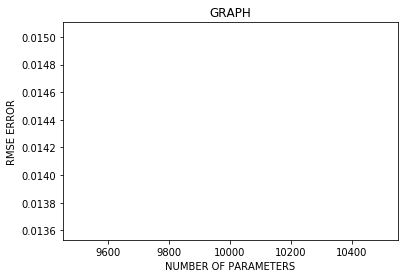

MIN ERROR RMSE== 0.014318742865210496     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [45]:
#BUILD THE GRAPH
X=np.array(parameter_catBoostRegressor)
Y=np.array(accuracy_catBoostRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [46]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
nombre=0
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        nombre+=1
        #print(train_data["galaxy"].loc[i])
print("nombre==",nombre)

nombre== 2


In [47]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
###############################################################################################################
###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]
################################################################################################################
#--------------------------------------------------------------------------------------------------------------#
#preprocessing Data
#train_data_preprocessing=Feature_Engineering_version_1train_data)
#test_data_preprocessing=Feature_Engineering_version_1(test_data)
train_data_preprocessing=Feature_Engineering_version_2(train_data)
test_data_preprocessing=Feature_Engineering_version_2(test_data)
#train_data_preprocessing=Feature_Engineering_version_3(train_data)
#test_data_preprocessing=Feature_Engineering_version_3(test_data)
#train_data_preprocessing=Feature_Engineering_version_4(train_data)
#test_data_preprocessing=Feature_Engineering_version_4(test_data)
#--------------------------------------------------------------------------------------------------------------#
################################################################################################################
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
from catboost import CatBoostRegressor
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

#build the model
catBoost_regressor=CatBoostRegressor(iterations=10000, depth=3, learning_rate=0.1, loss_function='RMSE')
#fit the model
catBoost_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)


prediction_test=catBoost_regressor.predict(test_data_preprocessing)
#test_data["y"]=np.abs(prediction_test)
################################################################################################################
#---------------------------------------------------------------------------------------------------------------
#op_pred=repartition_energy_strategy_1(test_data,10)
#op_pred=repartition_energy_strategy_2(test_data,11)
#op_pred=repartition_energy_strategy_3(test_data,11)
#op_pred=repartition_energy_strategy_4(test_data,10)
#op_pred=repartition_energy_strategy_5(test_data,10)
#op_pred=repartition_energy_strategy_6(test_data,10)
#op_pred=repartition_energy_strategy_7(test_data,10)
#op_pred=repartition_energy_strategy_9(test_data,10)
#op_pred=repartition_energy_strategy_10(test_data,10)
#op_pred=repartition_energy_strategy_11(test_data,10)
#op_pred=repartition_energy_strategy_12(test_data)
#op_pred=repartition_energy_strategy_13(test_data,10)

#---------------------------------------------------------------------------------------------------------------
################################################################################################################
#prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
#for i in range(prediction_test.shape[0]):
#    prediction_liste.append([np.abs(prediction_test[i]),np.abs(op_pred[i])])
    
    
#statistique 
#Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
#print("----------------------------------------------------------------------------------------------------------")
#print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
#print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
#print("TOTAL INDEX                          = ",total_index)

#save the prediction
#save_liste(prediction_liste,"prediction_")
#save_liste(prediction_liste,"_")

0:	learn: 0.0948474	total: 8.76ms	remaining: 1m 27s
1:	learn: 0.0872637	total: 15.7ms	remaining: 1m 18s
2:	learn: 0.0807308	total: 21.9ms	remaining: 1m 12s
3:	learn: 0.0746777	total: 28.6ms	remaining: 1m 11s
4:	learn: 0.0693412	total: 35.2ms	remaining: 1m 10s
5:	learn: 0.0645772	total: 41.7ms	remaining: 1m 9s
6:	learn: 0.0602588	total: 48.4ms	remaining: 1m 9s
7:	learn: 0.0565380	total: 55.1ms	remaining: 1m 8s
8:	learn: 0.0533790	total: 61.7ms	remaining: 1m 8s
9:	learn: 0.0505542	total: 68.4ms	remaining: 1m 8s
10:	learn: 0.0479041	total: 75ms	remaining: 1m 8s
11:	learn: 0.0453714	total: 83.1ms	remaining: 1m 9s
12:	learn: 0.0435741	total: 94.5ms	remaining: 1m 12s
13:	learn: 0.0417388	total: 103ms	remaining: 1m 13s
14:	learn: 0.0401634	total: 112ms	remaining: 1m 14s
15:	learn: 0.0387895	total: 120ms	remaining: 1m 14s
16:	learn: 0.0373749	total: 127ms	remaining: 1m 14s
17:	learn: 0.0362775	total: 134ms	remaining: 1m 14s
18:	learn: 0.0354276	total: 140ms	remaining: 1m 13s
19:	learn: 0.03443

161:	learn: 0.0183092	total: 1.22s	remaining: 1m 13s
162:	learn: 0.0183051	total: 1.23s	remaining: 1m 13s
163:	learn: 0.0183033	total: 1.23s	remaining: 1m 13s
164:	learn: 0.0182834	total: 1.24s	remaining: 1m 13s
165:	learn: 0.0182797	total: 1.25s	remaining: 1m 13s
166:	learn: 0.0182753	total: 1.25s	remaining: 1m 13s
167:	learn: 0.0182633	total: 1.26s	remaining: 1m 13s
168:	learn: 0.0182509	total: 1.26s	remaining: 1m 13s
169:	learn: 0.0182474	total: 1.27s	remaining: 1m 13s
170:	learn: 0.0182144	total: 1.28s	remaining: 1m 13s
171:	learn: 0.0181998	total: 1.28s	remaining: 1m 13s
172:	learn: 0.0181965	total: 1.29s	remaining: 1m 13s
173:	learn: 0.0181865	total: 1.3s	remaining: 1m 13s
174:	learn: 0.0181301	total: 1.3s	remaining: 1m 13s
175:	learn: 0.0181181	total: 1.31s	remaining: 1m 13s
176:	learn: 0.0181167	total: 1.32s	remaining: 1m 13s
177:	learn: 0.0181028	total: 1.32s	remaining: 1m 12s
178:	learn: 0.0181005	total: 1.33s	remaining: 1m 12s
179:	learn: 0.0180464	total: 1.33s	remaining: 1m

343:	learn: 0.0160220	total: 2.4s	remaining: 1m 7s
344:	learn: 0.0160214	total: 2.41s	remaining: 1m 7s
345:	learn: 0.0160187	total: 2.41s	remaining: 1m 7s
346:	learn: 0.0160141	total: 2.42s	remaining: 1m 7s
347:	learn: 0.0160114	total: 2.43s	remaining: 1m 7s
348:	learn: 0.0159784	total: 2.44s	remaining: 1m 7s
349:	learn: 0.0159425	total: 2.44s	remaining: 1m 7s
350:	learn: 0.0159401	total: 2.45s	remaining: 1m 7s
351:	learn: 0.0159349	total: 2.46s	remaining: 1m 7s
352:	learn: 0.0159340	total: 2.46s	remaining: 1m 7s
353:	learn: 0.0159122	total: 2.47s	remaining: 1m 7s
354:	learn: 0.0158794	total: 2.48s	remaining: 1m 7s
355:	learn: 0.0158448	total: 2.48s	remaining: 1m 7s
356:	learn: 0.0158446	total: 2.49s	remaining: 1m 7s
357:	learn: 0.0158247	total: 2.5s	remaining: 1m 7s
358:	learn: 0.0158216	total: 2.5s	remaining: 1m 7s
359:	learn: 0.0157842	total: 2.51s	remaining: 1m 7s
360:	learn: 0.0157805	total: 2.52s	remaining: 1m 7s
361:	learn: 0.0157805	total: 2.52s	remaining: 1m 7s
362:	learn: 0.0

515:	learn: 0.0145548	total: 3.59s	remaining: 1m 6s
516:	learn: 0.0145298	total: 3.6s	remaining: 1m 6s
517:	learn: 0.0145282	total: 3.6s	remaining: 1m 6s
518:	learn: 0.0145124	total: 3.61s	remaining: 1m 6s
519:	learn: 0.0145116	total: 3.62s	remaining: 1m 6s
520:	learn: 0.0145041	total: 3.63s	remaining: 1m 6s
521:	learn: 0.0145033	total: 3.64s	remaining: 1m 6s
522:	learn: 0.0145005	total: 3.64s	remaining: 1m 6s
523:	learn: 0.0144955	total: 3.65s	remaining: 1m 5s
524:	learn: 0.0144930	total: 3.66s	remaining: 1m 5s
525:	learn: 0.0144592	total: 3.66s	remaining: 1m 5s
526:	learn: 0.0144540	total: 3.67s	remaining: 1m 5s
527:	learn: 0.0144489	total: 3.67s	remaining: 1m 5s
528:	learn: 0.0144424	total: 3.68s	remaining: 1m 5s
529:	learn: 0.0144422	total: 3.69s	remaining: 1m 5s
530:	learn: 0.0144418	total: 3.69s	remaining: 1m 5s
531:	learn: 0.0144416	total: 3.7s	remaining: 1m 5s
532:	learn: 0.0144404	total: 3.71s	remaining: 1m 5s
533:	learn: 0.0144396	total: 3.71s	remaining: 1m 5s
534:	learn: 0.0

689:	learn: 0.0137632	total: 4.78s	remaining: 1m 4s
690:	learn: 0.0137531	total: 4.79s	remaining: 1m 4s
691:	learn: 0.0137491	total: 4.8s	remaining: 1m 4s
692:	learn: 0.0137490	total: 4.8s	remaining: 1m 4s
693:	learn: 0.0137479	total: 4.81s	remaining: 1m 4s
694:	learn: 0.0137476	total: 4.82s	remaining: 1m 4s
695:	learn: 0.0137339	total: 4.83s	remaining: 1m 4s
696:	learn: 0.0137332	total: 4.83s	remaining: 1m 4s
697:	learn: 0.0137332	total: 4.84s	remaining: 1m 4s
698:	learn: 0.0137330	total: 4.84s	remaining: 1m 4s
699:	learn: 0.0137317	total: 4.85s	remaining: 1m 4s
700:	learn: 0.0137311	total: 4.86s	remaining: 1m 4s
701:	learn: 0.0137275	total: 4.86s	remaining: 1m 4s
702:	learn: 0.0137274	total: 4.87s	remaining: 1m 4s
703:	learn: 0.0137263	total: 4.88s	remaining: 1m 4s
704:	learn: 0.0137262	total: 4.89s	remaining: 1m 4s
705:	learn: 0.0137095	total: 4.89s	remaining: 1m 4s
706:	learn: 0.0137079	total: 4.9s	remaining: 1m 4s
707:	learn: 0.0137059	total: 4.91s	remaining: 1m 4s
708:	learn: 0.0

856:	learn: 0.0132241	total: 5.96s	remaining: 1m 3s
857:	learn: 0.0132241	total: 5.96s	remaining: 1m 3s
858:	learn: 0.0132239	total: 5.97s	remaining: 1m 3s
859:	learn: 0.0132209	total: 5.98s	remaining: 1m 3s
860:	learn: 0.0132202	total: 5.98s	remaining: 1m 3s
861:	learn: 0.0132194	total: 5.99s	remaining: 1m 3s
862:	learn: 0.0132191	total: 6s	remaining: 1m 3s
863:	learn: 0.0132183	total: 6s	remaining: 1m 3s
864:	learn: 0.0132177	total: 6.01s	remaining: 1m 3s
865:	learn: 0.0132175	total: 6.02s	remaining: 1m 3s
866:	learn: 0.0132166	total: 6.03s	remaining: 1m 3s
867:	learn: 0.0132160	total: 6.03s	remaining: 1m 3s
868:	learn: 0.0132118	total: 6.04s	remaining: 1m 3s
869:	learn: 0.0132109	total: 6.05s	remaining: 1m 3s
870:	learn: 0.0132105	total: 6.06s	remaining: 1m 3s
871:	learn: 0.0132104	total: 6.06s	remaining: 1m 3s
872:	learn: 0.0132101	total: 6.07s	remaining: 1m 3s
873:	learn: 0.0132099	total: 6.08s	remaining: 1m 3s
874:	learn: 0.0132093	total: 6.09s	remaining: 1m 3s
875:	learn: 0.0132

1037:	learn: 0.0128251	total: 7.32s	remaining: 1m 3s
1038:	learn: 0.0128241	total: 7.33s	remaining: 1m 3s
1039:	learn: 0.0128240	total: 7.33s	remaining: 1m 3s
1040:	learn: 0.0128236	total: 7.34s	remaining: 1m 3s
1041:	learn: 0.0128229	total: 7.35s	remaining: 1m 3s
1042:	learn: 0.0128227	total: 7.35s	remaining: 1m 3s
1043:	learn: 0.0128199	total: 7.36s	remaining: 1m 3s
1044:	learn: 0.0128197	total: 7.37s	remaining: 1m 3s
1045:	learn: 0.0128195	total: 7.37s	remaining: 1m 3s
1046:	learn: 0.0128183	total: 7.38s	remaining: 1m 3s
1047:	learn: 0.0128182	total: 7.38s	remaining: 1m 3s
1048:	learn: 0.0128181	total: 7.39s	remaining: 1m 3s
1049:	learn: 0.0128175	total: 7.4s	remaining: 1m 3s
1050:	learn: 0.0128174	total: 7.4s	remaining: 1m 3s
1051:	learn: 0.0128173	total: 7.41s	remaining: 1m 3s
1052:	learn: 0.0128172	total: 7.42s	remaining: 1m 3s
1053:	learn: 0.0128167	total: 7.42s	remaining: 1m 2s
1054:	learn: 0.0128159	total: 7.43s	remaining: 1m 2s
1055:	learn: 0.0128158	total: 7.43s	remaining: 1

1218:	learn: 0.0124785	total: 8.48s	remaining: 1m 1s
1219:	learn: 0.0124742	total: 8.48s	remaining: 1m 1s
1220:	learn: 0.0124740	total: 8.49s	remaining: 1m 1s
1221:	learn: 0.0124730	total: 8.5s	remaining: 1m 1s
1222:	learn: 0.0124726	total: 8.51s	remaining: 1m 1s
1223:	learn: 0.0124720	total: 8.52s	remaining: 1m 1s
1224:	learn: 0.0124713	total: 8.52s	remaining: 1m 1s
1225:	learn: 0.0124707	total: 8.53s	remaining: 1m 1s
1226:	learn: 0.0124704	total: 8.53s	remaining: 1m 1s
1227:	learn: 0.0124698	total: 8.54s	remaining: 1m 1s
1228:	learn: 0.0124594	total: 8.55s	remaining: 1m
1229:	learn: 0.0124593	total: 8.55s	remaining: 1m
1230:	learn: 0.0124586	total: 8.56s	remaining: 1m
1231:	learn: 0.0124580	total: 8.56s	remaining: 1m
1232:	learn: 0.0124454	total: 8.57s	remaining: 1m
1233:	learn: 0.0124443	total: 8.58s	remaining: 1m
1234:	learn: 0.0124442	total: 8.58s	remaining: 1m
1235:	learn: 0.0124378	total: 8.59s	remaining: 1m
1236:	learn: 0.0124374	total: 8.6s	remaining: 1m
1237:	learn: 0.0124373

1394:	learn: 0.0121454	total: 9.64s	remaining: 59.4s
1395:	learn: 0.0121421	total: 9.64s	remaining: 59.4s
1396:	learn: 0.0121273	total: 9.65s	remaining: 59.4s
1397:	learn: 0.0121273	total: 9.66s	remaining: 59.4s
1398:	learn: 0.0121271	total: 9.66s	remaining: 59.4s
1399:	learn: 0.0121270	total: 9.67s	remaining: 59.4s
1400:	learn: 0.0121233	total: 9.68s	remaining: 59.4s
1401:	learn: 0.0121223	total: 9.68s	remaining: 59.4s
1402:	learn: 0.0121217	total: 9.69s	remaining: 59.4s
1403:	learn: 0.0121195	total: 9.7s	remaining: 59.4s
1404:	learn: 0.0121192	total: 9.7s	remaining: 59.4s
1405:	learn: 0.0121182	total: 9.71s	remaining: 59.3s
1406:	learn: 0.0121100	total: 9.71s	remaining: 59.3s
1407:	learn: 0.0121093	total: 9.72s	remaining: 59.3s
1408:	learn: 0.0121092	total: 9.73s	remaining: 59.3s
1409:	learn: 0.0121077	total: 9.73s	remaining: 59.3s
1410:	learn: 0.0121073	total: 9.74s	remaining: 59.3s
1411:	learn: 0.0121071	total: 9.74s	remaining: 59.3s
1412:	learn: 0.0121067	total: 9.75s	remaining: 5

1577:	learn: 0.0119038	total: 10.8s	remaining: 57.6s
1578:	learn: 0.0119031	total: 10.8s	remaining: 57.6s
1579:	learn: 0.0119020	total: 10.8s	remaining: 57.6s
1580:	learn: 0.0119017	total: 10.8s	remaining: 57.6s
1581:	learn: 0.0119016	total: 10.8s	remaining: 57.6s
1582:	learn: 0.0118993	total: 10.8s	remaining: 57.6s
1583:	learn: 0.0118992	total: 10.8s	remaining: 57.5s
1584:	learn: 0.0118989	total: 10.8s	remaining: 57.5s
1585:	learn: 0.0118980	total: 10.8s	remaining: 57.5s
1586:	learn: 0.0118979	total: 10.8s	remaining: 57.5s
1587:	learn: 0.0118925	total: 10.9s	remaining: 57.5s
1588:	learn: 0.0118907	total: 10.9s	remaining: 57.5s
1589:	learn: 0.0118906	total: 10.9s	remaining: 57.5s
1590:	learn: 0.0118902	total: 10.9s	remaining: 57.5s
1591:	learn: 0.0118899	total: 10.9s	remaining: 57.5s
1592:	learn: 0.0118897	total: 10.9s	remaining: 57.4s
1593:	learn: 0.0118896	total: 10.9s	remaining: 57.4s
1594:	learn: 0.0118811	total: 10.9s	remaining: 57.4s
1595:	learn: 0.0118795	total: 10.9s	remaining:

1760:	learn: 0.0116725	total: 11.9s	remaining: 55.8s
1761:	learn: 0.0116700	total: 11.9s	remaining: 55.8s
1762:	learn: 0.0116621	total: 11.9s	remaining: 55.8s
1763:	learn: 0.0116619	total: 11.9s	remaining: 55.8s
1764:	learn: 0.0116619	total: 12s	remaining: 55.8s
1765:	learn: 0.0116602	total: 12s	remaining: 55.8s
1766:	learn: 0.0116602	total: 12s	remaining: 55.8s
1767:	learn: 0.0116602	total: 12s	remaining: 55.8s
1768:	learn: 0.0116374	total: 12s	remaining: 55.7s
1769:	learn: 0.0116370	total: 12s	remaining: 55.7s
1770:	learn: 0.0116342	total: 12s	remaining: 55.7s
1771:	learn: 0.0116341	total: 12s	remaining: 55.7s
1772:	learn: 0.0116335	total: 12s	remaining: 55.7s
1773:	learn: 0.0116334	total: 12s	remaining: 55.7s
1774:	learn: 0.0116328	total: 12s	remaining: 55.7s
1775:	learn: 0.0116253	total: 12s	remaining: 55.7s
1776:	learn: 0.0116249	total: 12s	remaining: 55.7s
1777:	learn: 0.0116245	total: 12s	remaining: 55.6s
1778:	learn: 0.0116160	total: 12s	remaining: 55.6s
1779:	learn: 0.0116160	

1942:	learn: 0.0112955	total: 13.1s	remaining: 54.2s
1943:	learn: 0.0112954	total: 13.1s	remaining: 54.2s
1944:	learn: 0.0112921	total: 13.1s	remaining: 54.2s
1945:	learn: 0.0112920	total: 13.1s	remaining: 54.2s
1946:	learn: 0.0112920	total: 13.1s	remaining: 54.2s
1947:	learn: 0.0112919	total: 13.1s	remaining: 54.1s
1948:	learn: 0.0112919	total: 13.1s	remaining: 54.1s
1949:	learn: 0.0112918	total: 13.1s	remaining: 54.1s
1950:	learn: 0.0112908	total: 13.1s	remaining: 54.1s
1951:	learn: 0.0112906	total: 13.1s	remaining: 54.1s
1952:	learn: 0.0112906	total: 13.1s	remaining: 54.1s
1953:	learn: 0.0112905	total: 13.1s	remaining: 54.1s
1954:	learn: 0.0112878	total: 13.1s	remaining: 54.1s
1955:	learn: 0.0112870	total: 13.1s	remaining: 54.1s
1956:	learn: 0.0112747	total: 13.2s	remaining: 54.1s
1957:	learn: 0.0112747	total: 13.2s	remaining: 54.1s
1958:	learn: 0.0112687	total: 13.2s	remaining: 54s
1959:	learn: 0.0112686	total: 13.2s	remaining: 54s
1960:	learn: 0.0112686	total: 13.2s	remaining: 54s

2122:	learn: 0.0110615	total: 14.2s	remaining: 52.7s
2123:	learn: 0.0110588	total: 14.2s	remaining: 52.7s
2124:	learn: 0.0110578	total: 14.2s	remaining: 52.7s
2125:	learn: 0.0110546	total: 14.2s	remaining: 52.7s
2126:	learn: 0.0110523	total: 14.2s	remaining: 52.7s
2127:	learn: 0.0110522	total: 14.2s	remaining: 52.7s
2128:	learn: 0.0110520	total: 14.2s	remaining: 52.7s
2129:	learn: 0.0110512	total: 14.2s	remaining: 52.6s
2130:	learn: 0.0110511	total: 14.3s	remaining: 52.6s
2131:	learn: 0.0110458	total: 14.3s	remaining: 52.6s
2132:	learn: 0.0110437	total: 14.3s	remaining: 52.6s
2133:	learn: 0.0110434	total: 14.3s	remaining: 52.6s
2134:	learn: 0.0110432	total: 14.3s	remaining: 52.6s
2135:	learn: 0.0110432	total: 14.3s	remaining: 52.6s
2136:	learn: 0.0110415	total: 14.3s	remaining: 52.6s
2137:	learn: 0.0110163	total: 14.3s	remaining: 52.6s
2138:	learn: 0.0110163	total: 14.3s	remaining: 52.6s
2139:	learn: 0.0110162	total: 14.3s	remaining: 52.6s
2140:	learn: 0.0110161	total: 14.3s	remaining:

2300:	learn: 0.0108999	total: 15.3s	remaining: 51.3s
2301:	learn: 0.0108998	total: 15.3s	remaining: 51.3s
2302:	learn: 0.0108998	total: 15.4s	remaining: 51.3s
2303:	learn: 0.0108998	total: 15.4s	remaining: 51.3s
2304:	learn: 0.0108998	total: 15.4s	remaining: 51.3s
2305:	learn: 0.0108996	total: 15.4s	remaining: 51.3s
2306:	learn: 0.0108996	total: 15.4s	remaining: 51.3s
2307:	learn: 0.0108995	total: 15.4s	remaining: 51.3s
2308:	learn: 0.0108979	total: 15.4s	remaining: 51.3s
2309:	learn: 0.0108978	total: 15.4s	remaining: 51.3s
2310:	learn: 0.0108971	total: 15.4s	remaining: 51.3s
2311:	learn: 0.0108971	total: 15.4s	remaining: 51.3s
2312:	learn: 0.0108971	total: 15.4s	remaining: 51.3s
2313:	learn: 0.0108971	total: 15.4s	remaining: 51.3s
2314:	learn: 0.0108969	total: 15.4s	remaining: 51.3s
2315:	learn: 0.0108968	total: 15.4s	remaining: 51.2s
2316:	learn: 0.0108954	total: 15.5s	remaining: 51.3s
2317:	learn: 0.0108948	total: 15.5s	remaining: 51.3s
2318:	learn: 0.0108947	total: 15.5s	remaining:

2475:	learn: 0.0107849	total: 16.7s	remaining: 50.6s
2476:	learn: 0.0107691	total: 16.7s	remaining: 50.6s
2477:	learn: 0.0107687	total: 16.7s	remaining: 50.6s
2478:	learn: 0.0107685	total: 16.7s	remaining: 50.6s
2479:	learn: 0.0107679	total: 16.7s	remaining: 50.6s
2480:	learn: 0.0107678	total: 16.7s	remaining: 50.6s
2481:	learn: 0.0107674	total: 16.7s	remaining: 50.6s
2482:	learn: 0.0107671	total: 16.7s	remaining: 50.6s
2483:	learn: 0.0107671	total: 16.7s	remaining: 50.6s
2484:	learn: 0.0107670	total: 16.7s	remaining: 50.6s
2485:	learn: 0.0107597	total: 16.7s	remaining: 50.6s
2486:	learn: 0.0107588	total: 16.8s	remaining: 50.6s
2487:	learn: 0.0107588	total: 16.8s	remaining: 50.6s
2488:	learn: 0.0107565	total: 16.8s	remaining: 50.6s
2489:	learn: 0.0107563	total: 16.8s	remaining: 50.6s
2490:	learn: 0.0107563	total: 16.8s	remaining: 50.6s
2491:	learn: 0.0107387	total: 16.8s	remaining: 50.6s
2492:	learn: 0.0107376	total: 16.8s	remaining: 50.6s
2493:	learn: 0.0107374	total: 16.8s	remaining:

2633:	learn: 0.0106137	total: 17.8s	remaining: 49.7s
2634:	learn: 0.0106132	total: 17.8s	remaining: 49.7s
2635:	learn: 0.0106132	total: 17.8s	remaining: 49.7s
2636:	learn: 0.0106129	total: 17.8s	remaining: 49.7s
2637:	learn: 0.0106128	total: 17.8s	remaining: 49.7s
2638:	learn: 0.0106125	total: 17.8s	remaining: 49.7s
2639:	learn: 0.0106122	total: 17.8s	remaining: 49.7s
2640:	learn: 0.0106122	total: 17.8s	remaining: 49.7s
2641:	learn: 0.0106122	total: 17.9s	remaining: 49.7s
2642:	learn: 0.0106107	total: 17.9s	remaining: 49.7s
2643:	learn: 0.0106105	total: 17.9s	remaining: 49.7s
2644:	learn: 0.0106102	total: 17.9s	remaining: 49.7s
2645:	learn: 0.0106101	total: 17.9s	remaining: 49.7s
2646:	learn: 0.0106100	total: 17.9s	remaining: 49.7s
2647:	learn: 0.0106034	total: 17.9s	remaining: 49.7s
2648:	learn: 0.0106034	total: 17.9s	remaining: 49.7s
2649:	learn: 0.0106031	total: 17.9s	remaining: 49.7s
2650:	learn: 0.0106030	total: 17.9s	remaining: 49.7s
2651:	learn: 0.0106028	total: 17.9s	remaining:

2793:	learn: 0.0105178	total: 18.9s	remaining: 48.8s
2794:	learn: 0.0105174	total: 18.9s	remaining: 48.8s
2795:	learn: 0.0105173	total: 18.9s	remaining: 48.8s
2796:	learn: 0.0105172	total: 18.9s	remaining: 48.8s
2797:	learn: 0.0105171	total: 18.9s	remaining: 48.8s
2798:	learn: 0.0105150	total: 19s	remaining: 48.8s
2799:	learn: 0.0105136	total: 19s	remaining: 48.7s
2800:	learn: 0.0105134	total: 19s	remaining: 48.7s
2801:	learn: 0.0105125	total: 19s	remaining: 48.7s
2802:	learn: 0.0105125	total: 19s	remaining: 48.7s
2803:	learn: 0.0104884	total: 19s	remaining: 48.7s
2804:	learn: 0.0104875	total: 19s	remaining: 48.7s
2805:	learn: 0.0104864	total: 19s	remaining: 48.7s
2806:	learn: 0.0104786	total: 19s	remaining: 48.7s
2807:	learn: 0.0104786	total: 19s	remaining: 48.7s
2808:	learn: 0.0104774	total: 19s	remaining: 48.7s
2809:	learn: 0.0104751	total: 19s	remaining: 48.7s
2810:	learn: 0.0104744	total: 19s	remaining: 48.7s
2811:	learn: 0.0104743	total: 19s	remaining: 48.7s
2812:	learn: 0.010455

2959:	learn: 0.0103588	total: 20s	remaining: 47.6s
2960:	learn: 0.0103587	total: 20s	remaining: 47.6s
2961:	learn: 0.0103587	total: 20s	remaining: 47.6s
2962:	learn: 0.0103586	total: 20.1s	remaining: 47.6s
2963:	learn: 0.0103586	total: 20.1s	remaining: 47.6s
2964:	learn: 0.0103566	total: 20.1s	remaining: 47.6s
2965:	learn: 0.0103549	total: 20.1s	remaining: 47.6s
2966:	learn: 0.0103548	total: 20.1s	remaining: 47.6s
2967:	learn: 0.0103548	total: 20.1s	remaining: 47.6s
2968:	learn: 0.0103546	total: 20.1s	remaining: 47.6s
2969:	learn: 0.0103545	total: 20.1s	remaining: 47.6s
2970:	learn: 0.0103545	total: 20.1s	remaining: 47.6s
2971:	learn: 0.0103511	total: 20.1s	remaining: 47.5s
2972:	learn: 0.0103511	total: 20.1s	remaining: 47.5s
2973:	learn: 0.0103511	total: 20.1s	remaining: 47.5s
2974:	learn: 0.0103511	total: 20.1s	remaining: 47.5s
2975:	learn: 0.0103508	total: 20.1s	remaining: 47.5s
2976:	learn: 0.0103505	total: 20.1s	remaining: 47.5s
2977:	learn: 0.0103501	total: 20.1s	remaining: 47.5s

3135:	learn: 0.0101592	total: 21.1s	remaining: 46.2s
3136:	learn: 0.0101591	total: 21.1s	remaining: 46.2s
3137:	learn: 0.0101591	total: 21.1s	remaining: 46.2s
3138:	learn: 0.0101587	total: 21.1s	remaining: 46.2s
3139:	learn: 0.0101587	total: 21.2s	remaining: 46.2s
3140:	learn: 0.0101586	total: 21.2s	remaining: 46.2s
3141:	learn: 0.0101580	total: 21.2s	remaining: 46.2s
3142:	learn: 0.0101539	total: 21.2s	remaining: 46.2s
3143:	learn: 0.0101538	total: 21.2s	remaining: 46.2s
3144:	learn: 0.0101537	total: 21.2s	remaining: 46.2s
3145:	learn: 0.0101537	total: 21.2s	remaining: 46.2s
3146:	learn: 0.0101537	total: 21.2s	remaining: 46.2s
3147:	learn: 0.0101533	total: 21.2s	remaining: 46.2s
3148:	learn: 0.0101530	total: 21.2s	remaining: 46.1s
3149:	learn: 0.0101530	total: 21.2s	remaining: 46.1s
3150:	learn: 0.0101529	total: 21.2s	remaining: 46.1s
3151:	learn: 0.0101529	total: 21.2s	remaining: 46.1s
3152:	learn: 0.0101503	total: 21.2s	remaining: 46.1s
3153:	learn: 0.0101493	total: 21.2s	remaining:

3311:	learn: 0.0099916	total: 22.2s	remaining: 44.9s
3312:	learn: 0.0099915	total: 22.2s	remaining: 44.9s
3313:	learn: 0.0099914	total: 22.2s	remaining: 44.9s
3314:	learn: 0.0099900	total: 22.2s	remaining: 44.9s
3315:	learn: 0.0099899	total: 22.3s	remaining: 44.9s
3316:	learn: 0.0099899	total: 22.3s	remaining: 44.8s
3317:	learn: 0.0099899	total: 22.3s	remaining: 44.8s
3318:	learn: 0.0099898	total: 22.3s	remaining: 44.8s
3319:	learn: 0.0099894	total: 22.3s	remaining: 44.8s
3320:	learn: 0.0099891	total: 22.3s	remaining: 44.8s
3321:	learn: 0.0099873	total: 22.3s	remaining: 44.8s
3322:	learn: 0.0099872	total: 22.3s	remaining: 44.8s
3323:	learn: 0.0099871	total: 22.3s	remaining: 44.8s
3324:	learn: 0.0099871	total: 22.3s	remaining: 44.8s
3325:	learn: 0.0099849	total: 22.3s	remaining: 44.8s
3326:	learn: 0.0099845	total: 22.3s	remaining: 44.8s
3327:	learn: 0.0099841	total: 22.3s	remaining: 44.8s
3328:	learn: 0.0099839	total: 22.3s	remaining: 44.8s
3329:	learn: 0.0099825	total: 22.3s	remaining:

3488:	learn: 0.0098845	total: 23.3s	remaining: 43.5s
3489:	learn: 0.0098845	total: 23.3s	remaining: 43.5s
3490:	learn: 0.0098843	total: 23.3s	remaining: 43.5s
3491:	learn: 0.0098839	total: 23.3s	remaining: 43.5s
3492:	learn: 0.0098837	total: 23.4s	remaining: 43.5s
3493:	learn: 0.0098836	total: 23.4s	remaining: 43.5s
3494:	learn: 0.0098835	total: 23.4s	remaining: 43.5s
3495:	learn: 0.0098828	total: 23.4s	remaining: 43.5s
3496:	learn: 0.0098828	total: 23.4s	remaining: 43.5s
3497:	learn: 0.0098824	total: 23.4s	remaining: 43.5s
3498:	learn: 0.0098823	total: 23.4s	remaining: 43.5s
3499:	learn: 0.0098819	total: 23.4s	remaining: 43.5s
3500:	learn: 0.0098819	total: 23.4s	remaining: 43.5s
3501:	learn: 0.0098819	total: 23.4s	remaining: 43.4s
3502:	learn: 0.0098818	total: 23.4s	remaining: 43.4s
3503:	learn: 0.0098817	total: 23.4s	remaining: 43.4s
3504:	learn: 0.0098817	total: 23.4s	remaining: 43.4s
3505:	learn: 0.0098809	total: 23.4s	remaining: 43.4s
3506:	learn: 0.0098808	total: 23.4s	remaining:

3663:	learn: 0.0097604	total: 24.4s	remaining: 42.2s
3664:	learn: 0.0097603	total: 24.4s	remaining: 42.2s
3665:	learn: 0.0097600	total: 24.4s	remaining: 42.2s
3666:	learn: 0.0097587	total: 24.4s	remaining: 42.2s
3667:	learn: 0.0097586	total: 24.4s	remaining: 42.2s
3668:	learn: 0.0097586	total: 24.5s	remaining: 42.2s
3669:	learn: 0.0097586	total: 24.5s	remaining: 42.2s
3670:	learn: 0.0097585	total: 24.5s	remaining: 42.2s
3671:	learn: 0.0097585	total: 24.5s	remaining: 42.2s
3672:	learn: 0.0097579	total: 24.5s	remaining: 42.2s
3673:	learn: 0.0097578	total: 24.5s	remaining: 42.2s
3674:	learn: 0.0097576	total: 24.5s	remaining: 42.1s
3675:	learn: 0.0097576	total: 24.5s	remaining: 42.1s
3676:	learn: 0.0097576	total: 24.5s	remaining: 42.1s
3677:	learn: 0.0097574	total: 24.5s	remaining: 42.1s
3678:	learn: 0.0097571	total: 24.5s	remaining: 42.1s
3679:	learn: 0.0097568	total: 24.5s	remaining: 42.1s
3680:	learn: 0.0097568	total: 24.5s	remaining: 42.1s
3681:	learn: 0.0097566	total: 24.5s	remaining:

3837:	learn: 0.0096685	total: 25.5s	remaining: 40.9s
3838:	learn: 0.0096682	total: 25.5s	remaining: 40.9s
3839:	learn: 0.0096681	total: 25.5s	remaining: 40.9s
3840:	learn: 0.0096679	total: 25.5s	remaining: 40.9s
3841:	learn: 0.0096676	total: 25.5s	remaining: 40.9s
3842:	learn: 0.0096670	total: 25.5s	remaining: 40.9s
3843:	learn: 0.0096670	total: 25.5s	remaining: 40.9s
3844:	learn: 0.0096670	total: 25.5s	remaining: 40.9s
3845:	learn: 0.0096669	total: 25.6s	remaining: 40.9s
3846:	learn: 0.0096669	total: 25.6s	remaining: 40.9s
3847:	learn: 0.0096669	total: 25.6s	remaining: 40.9s
3848:	learn: 0.0096667	total: 25.6s	remaining: 40.9s
3849:	learn: 0.0096666	total: 25.6s	remaining: 40.9s
3850:	learn: 0.0096664	total: 25.6s	remaining: 40.9s
3851:	learn: 0.0096664	total: 25.6s	remaining: 40.8s
3852:	learn: 0.0096662	total: 25.6s	remaining: 40.8s
3853:	learn: 0.0096662	total: 25.6s	remaining: 40.8s
3854:	learn: 0.0096625	total: 25.6s	remaining: 40.8s
3855:	learn: 0.0096625	total: 25.6s	remaining:

4012:	learn: 0.0096248	total: 26.6s	remaining: 39.7s
4013:	learn: 0.0096247	total: 26.6s	remaining: 39.6s
4014:	learn: 0.0096246	total: 26.6s	remaining: 39.6s
4015:	learn: 0.0096246	total: 26.6s	remaining: 39.6s
4016:	learn: 0.0096246	total: 26.6s	remaining: 39.6s
4017:	learn: 0.0096246	total: 26.6s	remaining: 39.6s
4018:	learn: 0.0096246	total: 26.6s	remaining: 39.6s
4019:	learn: 0.0096246	total: 26.6s	remaining: 39.6s
4020:	learn: 0.0096246	total: 26.6s	remaining: 39.6s
4021:	learn: 0.0096245	total: 26.6s	remaining: 39.6s
4022:	learn: 0.0096245	total: 26.6s	remaining: 39.6s
4023:	learn: 0.0096243	total: 26.6s	remaining: 39.6s
4024:	learn: 0.0096243	total: 26.7s	remaining: 39.6s
4025:	learn: 0.0096238	total: 26.7s	remaining: 39.6s
4026:	learn: 0.0096237	total: 26.7s	remaining: 39.5s
4027:	learn: 0.0096237	total: 26.7s	remaining: 39.5s
4028:	learn: 0.0096237	total: 26.7s	remaining: 39.5s
4029:	learn: 0.0096236	total: 26.7s	remaining: 39.5s
4030:	learn: 0.0096228	total: 26.7s	remaining:

4186:	learn: 0.0095686	total: 27.7s	remaining: 38.4s
4187:	learn: 0.0095686	total: 27.7s	remaining: 38.4s
4188:	learn: 0.0095686	total: 27.7s	remaining: 38.4s
4189:	learn: 0.0095686	total: 27.7s	remaining: 38.4s
4190:	learn: 0.0095685	total: 27.7s	remaining: 38.4s
4191:	learn: 0.0095684	total: 27.7s	remaining: 38.4s
4192:	learn: 0.0095681	total: 27.7s	remaining: 38.4s
4193:	learn: 0.0095681	total: 27.7s	remaining: 38.3s
4194:	learn: 0.0095680	total: 27.7s	remaining: 38.3s
4195:	learn: 0.0095680	total: 27.7s	remaining: 38.3s
4196:	learn: 0.0095679	total: 27.7s	remaining: 38.3s
4197:	learn: 0.0095679	total: 27.7s	remaining: 38.3s
4198:	learn: 0.0095679	total: 27.7s	remaining: 38.3s
4199:	learn: 0.0095679	total: 27.7s	remaining: 38.3s
4200:	learn: 0.0095675	total: 27.7s	remaining: 38.3s
4201:	learn: 0.0095675	total: 27.7s	remaining: 38.3s
4202:	learn: 0.0095675	total: 27.8s	remaining: 38.3s
4203:	learn: 0.0095675	total: 27.8s	remaining: 38.3s
4204:	learn: 0.0095674	total: 27.8s	remaining:

4357:	learn: 0.0095452	total: 28.7s	remaining: 37.2s
4358:	learn: 0.0095451	total: 28.7s	remaining: 37.2s
4359:	learn: 0.0095447	total: 28.7s	remaining: 37.2s
4360:	learn: 0.0095440	total: 28.7s	remaining: 37.2s
4361:	learn: 0.0095440	total: 28.7s	remaining: 37.2s
4362:	learn: 0.0095440	total: 28.8s	remaining: 37.1s
4363:	learn: 0.0095440	total: 28.8s	remaining: 37.1s
4364:	learn: 0.0095440	total: 28.8s	remaining: 37.1s
4365:	learn: 0.0095440	total: 28.8s	remaining: 37.1s
4366:	learn: 0.0095182	total: 28.8s	remaining: 37.1s
4367:	learn: 0.0095181	total: 28.8s	remaining: 37.1s
4368:	learn: 0.0095181	total: 28.8s	remaining: 37.1s
4369:	learn: 0.0095181	total: 28.8s	remaining: 37.1s
4370:	learn: 0.0095181	total: 28.8s	remaining: 37.1s
4371:	learn: 0.0095149	total: 28.8s	remaining: 37.1s
4372:	learn: 0.0095149	total: 28.8s	remaining: 37.1s
4373:	learn: 0.0095149	total: 28.8s	remaining: 37.1s
4374:	learn: 0.0095149	total: 28.8s	remaining: 37.1s
4375:	learn: 0.0095149	total: 28.8s	remaining:

4528:	learn: 0.0094840	total: 29.8s	remaining: 36s
4529:	learn: 0.0094839	total: 29.8s	remaining: 36s
4530:	learn: 0.0094839	total: 29.8s	remaining: 36s
4531:	learn: 0.0094839	total: 29.8s	remaining: 36s
4532:	learn: 0.0094839	total: 29.8s	remaining: 36s
4533:	learn: 0.0094838	total: 29.8s	remaining: 36s
4534:	learn: 0.0094837	total: 29.8s	remaining: 35.9s
4535:	learn: 0.0094837	total: 29.8s	remaining: 35.9s
4536:	learn: 0.0094837	total: 29.8s	remaining: 35.9s
4537:	learn: 0.0094837	total: 29.8s	remaining: 35.9s
4538:	learn: 0.0094833	total: 29.9s	remaining: 35.9s
4539:	learn: 0.0094832	total: 29.9s	remaining: 35.9s
4540:	learn: 0.0094832	total: 29.9s	remaining: 35.9s
4541:	learn: 0.0094832	total: 29.9s	remaining: 35.9s
4542:	learn: 0.0094832	total: 29.9s	remaining: 35.9s
4543:	learn: 0.0094832	total: 29.9s	remaining: 35.9s
4544:	learn: 0.0094831	total: 29.9s	remaining: 35.9s
4545:	learn: 0.0094831	total: 29.9s	remaining: 35.9s
4546:	learn: 0.0094831	total: 29.9s	remaining: 35.9s
4547:

4698:	learn: 0.0094011	total: 30.8s	remaining: 34.8s
4699:	learn: 0.0094011	total: 30.9s	remaining: 34.8s
4700:	learn: 0.0094011	total: 30.9s	remaining: 34.8s
4701:	learn: 0.0094011	total: 30.9s	remaining: 34.8s
4702:	learn: 0.0094011	total: 30.9s	remaining: 34.8s
4703:	learn: 0.0094008	total: 30.9s	remaining: 34.8s
4704:	learn: 0.0094008	total: 30.9s	remaining: 34.8s
4705:	learn: 0.0094008	total: 30.9s	remaining: 34.7s
4706:	learn: 0.0093996	total: 30.9s	remaining: 34.7s
4707:	learn: 0.0093996	total: 30.9s	remaining: 34.7s
4708:	learn: 0.0093996	total: 30.9s	remaining: 34.7s
4709:	learn: 0.0093995	total: 30.9s	remaining: 34.7s
4710:	learn: 0.0093785	total: 30.9s	remaining: 34.7s
4711:	learn: 0.0093782	total: 30.9s	remaining: 34.7s
4712:	learn: 0.0093782	total: 30.9s	remaining: 34.7s
4713:	learn: 0.0093781	total: 30.9s	remaining: 34.7s
4714:	learn: 0.0093780	total: 30.9s	remaining: 34.7s
4715:	learn: 0.0093780	total: 30.9s	remaining: 34.7s
4716:	learn: 0.0093779	total: 31s	remaining: 3

4868:	learn: 0.0093263	total: 32.1s	remaining: 33.8s
4869:	learn: 0.0093263	total: 32.1s	remaining: 33.8s
4870:	learn: 0.0093258	total: 32.1s	remaining: 33.8s
4871:	learn: 0.0093258	total: 32.1s	remaining: 33.8s
4872:	learn: 0.0093256	total: 32.1s	remaining: 33.8s
4873:	learn: 0.0093254	total: 32.1s	remaining: 33.8s
4874:	learn: 0.0093248	total: 32.2s	remaining: 33.8s
4875:	learn: 0.0093248	total: 32.2s	remaining: 33.8s
4876:	learn: 0.0093233	total: 32.2s	remaining: 33.8s
4877:	learn: 0.0093232	total: 32.2s	remaining: 33.8s
4878:	learn: 0.0093230	total: 32.2s	remaining: 33.8s
4879:	learn: 0.0093230	total: 32.2s	remaining: 33.8s
4880:	learn: 0.0093230	total: 32.2s	remaining: 33.8s
4881:	learn: 0.0093222	total: 32.2s	remaining: 33.8s
4882:	learn: 0.0093219	total: 32.2s	remaining: 33.8s
4883:	learn: 0.0093219	total: 32.2s	remaining: 33.7s
4884:	learn: 0.0093217	total: 32.2s	remaining: 33.7s
4885:	learn: 0.0093217	total: 32.2s	remaining: 33.7s
4886:	learn: 0.0093217	total: 32.2s	remaining:

5040:	learn: 0.0092265	total: 33.3s	remaining: 32.8s
5041:	learn: 0.0092264	total: 33.3s	remaining: 32.8s
5042:	learn: 0.0092258	total: 33.4s	remaining: 32.8s
5043:	learn: 0.0092258	total: 33.4s	remaining: 32.8s
5044:	learn: 0.0092257	total: 33.4s	remaining: 32.8s
5045:	learn: 0.0092255	total: 33.4s	remaining: 32.8s
5046:	learn: 0.0092250	total: 33.4s	remaining: 32.8s
5047:	learn: 0.0092250	total: 33.4s	remaining: 32.7s
5048:	learn: 0.0092250	total: 33.4s	remaining: 32.7s
5049:	learn: 0.0092247	total: 33.4s	remaining: 32.7s
5050:	learn: 0.0092247	total: 33.4s	remaining: 32.7s
5051:	learn: 0.0092247	total: 33.4s	remaining: 32.7s
5052:	learn: 0.0092246	total: 33.4s	remaining: 32.7s
5053:	learn: 0.0092246	total: 33.4s	remaining: 32.7s
5054:	learn: 0.0092243	total: 33.4s	remaining: 32.7s
5055:	learn: 0.0092242	total: 33.4s	remaining: 32.7s
5056:	learn: 0.0092242	total: 33.4s	remaining: 32.7s
5057:	learn: 0.0092242	total: 33.5s	remaining: 32.7s
5058:	learn: 0.0092241	total: 33.5s	remaining:

5206:	learn: 0.0091784	total: 34.4s	remaining: 31.6s
5207:	learn: 0.0091783	total: 34.4s	remaining: 31.6s
5208:	learn: 0.0091783	total: 34.4s	remaining: 31.6s
5209:	learn: 0.0091782	total: 34.4s	remaining: 31.6s
5210:	learn: 0.0091782	total: 34.4s	remaining: 31.6s
5211:	learn: 0.0091782	total: 34.4s	remaining: 31.6s
5212:	learn: 0.0091782	total: 34.4s	remaining: 31.6s
5213:	learn: 0.0091782	total: 34.4s	remaining: 31.6s
5214:	learn: 0.0091779	total: 34.4s	remaining: 31.6s
5215:	learn: 0.0091779	total: 34.4s	remaining: 31.6s
5216:	learn: 0.0091779	total: 34.4s	remaining: 31.6s
5217:	learn: 0.0091779	total: 34.4s	remaining: 31.6s
5218:	learn: 0.0091761	total: 34.5s	remaining: 31.6s
5219:	learn: 0.0091761	total: 34.5s	remaining: 31.6s
5220:	learn: 0.0091761	total: 34.5s	remaining: 31.5s
5221:	learn: 0.0091761	total: 34.5s	remaining: 31.5s
5222:	learn: 0.0091761	total: 34.5s	remaining: 31.5s
5223:	learn: 0.0091761	total: 34.5s	remaining: 31.5s
5224:	learn: 0.0091761	total: 34.5s	remaining:

5375:	learn: 0.0091214	total: 35.4s	remaining: 30.5s
5376:	learn: 0.0091213	total: 35.4s	remaining: 30.5s
5377:	learn: 0.0091212	total: 35.4s	remaining: 30.4s
5378:	learn: 0.0091211	total: 35.4s	remaining: 30.4s
5379:	learn: 0.0091210	total: 35.4s	remaining: 30.4s
5380:	learn: 0.0091208	total: 35.4s	remaining: 30.4s
5381:	learn: 0.0091184	total: 35.5s	remaining: 30.4s
5382:	learn: 0.0091183	total: 35.5s	remaining: 30.4s
5383:	learn: 0.0091183	total: 35.5s	remaining: 30.4s
5384:	learn: 0.0091181	total: 35.5s	remaining: 30.4s
5385:	learn: 0.0091180	total: 35.5s	remaining: 30.4s
5386:	learn: 0.0091179	total: 35.5s	remaining: 30.4s
5387:	learn: 0.0091179	total: 35.5s	remaining: 30.4s
5388:	learn: 0.0091175	total: 35.5s	remaining: 30.4s
5389:	learn: 0.0091171	total: 35.5s	remaining: 30.4s
5390:	learn: 0.0091171	total: 35.5s	remaining: 30.4s
5391:	learn: 0.0091171	total: 35.5s	remaining: 30.4s
5392:	learn: 0.0091171	total: 35.5s	remaining: 30.3s
5393:	learn: 0.0091170	total: 35.5s	remaining:

5541:	learn: 0.0090671	total: 36.4s	remaining: 29.3s
5542:	learn: 0.0090671	total: 36.5s	remaining: 29.3s
5543:	learn: 0.0090671	total: 36.5s	remaining: 29.3s
5544:	learn: 0.0090670	total: 36.5s	remaining: 29.3s
5545:	learn: 0.0090670	total: 36.5s	remaining: 29.3s
5546:	learn: 0.0090670	total: 36.5s	remaining: 29.3s
5547:	learn: 0.0090670	total: 36.5s	remaining: 29.3s
5548:	learn: 0.0090669	total: 36.5s	remaining: 29.3s
5549:	learn: 0.0090669	total: 36.5s	remaining: 29.3s
5550:	learn: 0.0090667	total: 36.5s	remaining: 29.3s
5551:	learn: 0.0090666	total: 36.5s	remaining: 29.2s
5552:	learn: 0.0090666	total: 36.5s	remaining: 29.2s
5553:	learn: 0.0090666	total: 36.5s	remaining: 29.2s
5554:	learn: 0.0090666	total: 36.5s	remaining: 29.2s
5555:	learn: 0.0090536	total: 36.5s	remaining: 29.2s
5556:	learn: 0.0090536	total: 36.5s	remaining: 29.2s
5557:	learn: 0.0090535	total: 36.5s	remaining: 29.2s
5558:	learn: 0.0090531	total: 36.6s	remaining: 29.2s
5559:	learn: 0.0090531	total: 36.6s	remaining:

5716:	learn: 0.0090363	total: 37.7s	remaining: 28.2s
5717:	learn: 0.0090363	total: 37.7s	remaining: 28.2s
5718:	learn: 0.0090363	total: 37.7s	remaining: 28.2s
5719:	learn: 0.0090363	total: 37.7s	remaining: 28.2s
5720:	learn: 0.0090363	total: 37.7s	remaining: 28.2s
5721:	learn: 0.0090362	total: 37.7s	remaining: 28.2s
5722:	learn: 0.0090360	total: 37.7s	remaining: 28.2s
5723:	learn: 0.0090358	total: 37.7s	remaining: 28.2s
5724:	learn: 0.0090291	total: 37.7s	remaining: 28.2s
5725:	learn: 0.0090291	total: 37.7s	remaining: 28.2s
5726:	learn: 0.0090290	total: 37.7s	remaining: 28.1s
5727:	learn: 0.0090287	total: 37.7s	remaining: 28.1s
5728:	learn: 0.0090284	total: 37.7s	remaining: 28.1s
5729:	learn: 0.0090284	total: 37.7s	remaining: 28.1s
5730:	learn: 0.0090283	total: 37.8s	remaining: 28.1s
5731:	learn: 0.0090283	total: 37.8s	remaining: 28.1s
5732:	learn: 0.0090281	total: 37.8s	remaining: 28.1s
5733:	learn: 0.0090281	total: 37.8s	remaining: 28.1s
5734:	learn: 0.0090279	total: 37.8s	remaining:

5891:	learn: 0.0089757	total: 38.9s	remaining: 27.1s
5892:	learn: 0.0089755	total: 38.9s	remaining: 27.1s
5893:	learn: 0.0089755	total: 38.9s	remaining: 27.1s
5894:	learn: 0.0089755	total: 38.9s	remaining: 27.1s
5895:	learn: 0.0089755	total: 38.9s	remaining: 27.1s
5896:	learn: 0.0089751	total: 38.9s	remaining: 27.1s
5897:	learn: 0.0089750	total: 38.9s	remaining: 27.1s
5898:	learn: 0.0089711	total: 38.9s	remaining: 27.1s
5899:	learn: 0.0089711	total: 38.9s	remaining: 27.1s
5900:	learn: 0.0089711	total: 38.9s	remaining: 27s
5901:	learn: 0.0089711	total: 38.9s	remaining: 27s
5902:	learn: 0.0089711	total: 39s	remaining: 27s
5903:	learn: 0.0089709	total: 39s	remaining: 27s
5904:	learn: 0.0089645	total: 39s	remaining: 27s
5905:	learn: 0.0089643	total: 39s	remaining: 27s
5906:	learn: 0.0089643	total: 39s	remaining: 27s
5907:	learn: 0.0089642	total: 39s	remaining: 27s
5908:	learn: 0.0089637	total: 39s	remaining: 27s
5909:	learn: 0.0089637	total: 39s	remaining: 27s
5910:	learn: 0.0089636	total:

6072:	learn: 0.0089119	total: 40.1s	remaining: 25.9s
6073:	learn: 0.0089118	total: 40.1s	remaining: 25.9s
6074:	learn: 0.0089118	total: 40.1s	remaining: 25.9s
6075:	learn: 0.0089118	total: 40.1s	remaining: 25.9s
6076:	learn: 0.0089118	total: 40.1s	remaining: 25.9s
6077:	learn: 0.0089118	total: 40.1s	remaining: 25.9s
6078:	learn: 0.0089118	total: 40.1s	remaining: 25.9s
6079:	learn: 0.0089118	total: 40.1s	remaining: 25.9s
6080:	learn: 0.0089106	total: 40.2s	remaining: 25.9s
6081:	learn: 0.0089106	total: 40.2s	remaining: 25.9s
6082:	learn: 0.0089075	total: 40.2s	remaining: 25.9s
6083:	learn: 0.0089070	total: 40.2s	remaining: 25.9s
6084:	learn: 0.0089069	total: 40.2s	remaining: 25.9s
6085:	learn: 0.0089068	total: 40.2s	remaining: 25.8s
6086:	learn: 0.0089064	total: 40.2s	remaining: 25.8s
6087:	learn: 0.0089064	total: 40.2s	remaining: 25.8s
6088:	learn: 0.0089064	total: 40.2s	remaining: 25.8s
6089:	learn: 0.0089060	total: 40.2s	remaining: 25.8s
6090:	learn: 0.0089060	total: 40.2s	remaining:

6244:	learn: 0.0088417	total: 41.3s	remaining: 24.8s
6245:	learn: 0.0088416	total: 41.3s	remaining: 24.8s
6246:	learn: 0.0088416	total: 41.3s	remaining: 24.8s
6247:	learn: 0.0088416	total: 41.3s	remaining: 24.8s
6248:	learn: 0.0088394	total: 41.3s	remaining: 24.8s
6249:	learn: 0.0088394	total: 41.3s	remaining: 24.8s
6250:	learn: 0.0088388	total: 41.3s	remaining: 24.8s
6251:	learn: 0.0088388	total: 41.3s	remaining: 24.8s
6252:	learn: 0.0088385	total: 41.4s	remaining: 24.8s
6253:	learn: 0.0088384	total: 41.4s	remaining: 24.8s
6254:	learn: 0.0088384	total: 41.4s	remaining: 24.8s
6255:	learn: 0.0088379	total: 41.4s	remaining: 24.8s
6256:	learn: 0.0088379	total: 41.4s	remaining: 24.8s
6257:	learn: 0.0088378	total: 41.4s	remaining: 24.7s
6258:	learn: 0.0088378	total: 41.4s	remaining: 24.7s
6259:	learn: 0.0088378	total: 41.4s	remaining: 24.7s
6260:	learn: 0.0088365	total: 41.4s	remaining: 24.7s
6261:	learn: 0.0088365	total: 41.4s	remaining: 24.7s
6262:	learn: 0.0088365	total: 41.4s	remaining:

6420:	learn: 0.0087987	total: 42.5s	remaining: 23.7s
6421:	learn: 0.0087987	total: 42.5s	remaining: 23.7s
6422:	learn: 0.0087987	total: 42.5s	remaining: 23.7s
6423:	learn: 0.0087987	total: 42.5s	remaining: 23.7s
6424:	learn: 0.0087987	total: 42.5s	remaining: 23.7s
6425:	learn: 0.0087987	total: 42.5s	remaining: 23.7s
6426:	learn: 0.0087984	total: 42.5s	remaining: 23.7s
6427:	learn: 0.0087982	total: 42.6s	remaining: 23.6s
6428:	learn: 0.0087982	total: 42.6s	remaining: 23.6s
6429:	learn: 0.0087982	total: 42.6s	remaining: 23.6s
6430:	learn: 0.0087980	total: 42.6s	remaining: 23.6s
6431:	learn: 0.0087980	total: 42.6s	remaining: 23.6s
6432:	learn: 0.0087980	total: 42.6s	remaining: 23.6s
6433:	learn: 0.0087979	total: 42.6s	remaining: 23.6s
6434:	learn: 0.0087979	total: 42.6s	remaining: 23.6s
6435:	learn: 0.0087979	total: 42.6s	remaining: 23.6s
6436:	learn: 0.0087979	total: 42.6s	remaining: 23.6s
6437:	learn: 0.0087979	total: 42.6s	remaining: 23.6s
6438:	learn: 0.0087978	total: 42.6s	remaining:

6596:	learn: 0.0087246	total: 43.7s	remaining: 22.5s
6597:	learn: 0.0087234	total: 43.7s	remaining: 22.5s
6598:	learn: 0.0087234	total: 43.7s	remaining: 22.5s
6599:	learn: 0.0087234	total: 43.7s	remaining: 22.5s
6600:	learn: 0.0087234	total: 43.7s	remaining: 22.5s
6601:	learn: 0.0087234	total: 43.7s	remaining: 22.5s
6602:	learn: 0.0087229	total: 43.7s	remaining: 22.5s
6603:	learn: 0.0087229	total: 43.8s	remaining: 22.5s
6604:	learn: 0.0087226	total: 43.8s	remaining: 22.5s
6605:	learn: 0.0087223	total: 43.8s	remaining: 22.5s
6606:	learn: 0.0087223	total: 43.8s	remaining: 22.5s
6607:	learn: 0.0087222	total: 43.8s	remaining: 22.5s
6608:	learn: 0.0087221	total: 43.8s	remaining: 22.5s
6609:	learn: 0.0087221	total: 43.8s	remaining: 22.5s
6610:	learn: 0.0087216	total: 43.8s	remaining: 22.5s
6611:	learn: 0.0087215	total: 43.8s	remaining: 22.4s
6612:	learn: 0.0087215	total: 43.8s	remaining: 22.4s
6613:	learn: 0.0087215	total: 43.8s	remaining: 22.4s
6614:	learn: 0.0087215	total: 43.8s	remaining:

6772:	learn: 0.0086736	total: 44.9s	remaining: 21.4s
6773:	learn: 0.0086736	total: 44.9s	remaining: 21.4s
6774:	learn: 0.0086735	total: 44.9s	remaining: 21.4s
6775:	learn: 0.0086735	total: 44.9s	remaining: 21.4s
6776:	learn: 0.0086734	total: 44.9s	remaining: 21.4s
6777:	learn: 0.0086734	total: 44.9s	remaining: 21.4s
6778:	learn: 0.0086734	total: 44.9s	remaining: 21.3s
6779:	learn: 0.0086722	total: 44.9s	remaining: 21.3s
6780:	learn: 0.0086722	total: 44.9s	remaining: 21.3s
6781:	learn: 0.0086722	total: 44.9s	remaining: 21.3s
6782:	learn: 0.0086721	total: 45s	remaining: 21.3s
6783:	learn: 0.0086721	total: 45s	remaining: 21.3s
6784:	learn: 0.0086720	total: 45s	remaining: 21.3s
6785:	learn: 0.0086717	total: 45s	remaining: 21.3s
6786:	learn: 0.0086717	total: 45s	remaining: 21.3s
6787:	learn: 0.0086717	total: 45s	remaining: 21.3s
6788:	learn: 0.0086716	total: 45s	remaining: 21.3s
6789:	learn: 0.0086716	total: 45s	remaining: 21.3s
6790:	learn: 0.0086715	total: 45s	remaining: 21.3s
6791:	learn

6943:	learn: 0.0086588	total: 46.1s	remaining: 20.3s
6944:	learn: 0.0086588	total: 46.1s	remaining: 20.3s
6945:	learn: 0.0086578	total: 46.1s	remaining: 20.3s
6946:	learn: 0.0086578	total: 46.1s	remaining: 20.3s
6947:	learn: 0.0086578	total: 46.1s	remaining: 20.3s
6948:	learn: 0.0086578	total: 46.1s	remaining: 20.2s
6949:	learn: 0.0086577	total: 46.1s	remaining: 20.2s
6950:	learn: 0.0086577	total: 46.1s	remaining: 20.2s
6951:	learn: 0.0086577	total: 46.1s	remaining: 20.2s
6952:	learn: 0.0086576	total: 46.2s	remaining: 20.2s
6953:	learn: 0.0086576	total: 46.2s	remaining: 20.2s
6954:	learn: 0.0086576	total: 46.2s	remaining: 20.2s
6955:	learn: 0.0086576	total: 46.2s	remaining: 20.2s
6956:	learn: 0.0086576	total: 46.2s	remaining: 20.2s
6957:	learn: 0.0086574	total: 46.2s	remaining: 20.2s
6958:	learn: 0.0086574	total: 46.2s	remaining: 20.2s
6959:	learn: 0.0086574	total: 46.2s	remaining: 20.2s
6960:	learn: 0.0086574	total: 46.2s	remaining: 20.2s
6961:	learn: 0.0086574	total: 46.2s	remaining:

7110:	learn: 0.0086283	total: 47.3s	remaining: 19.2s
7111:	learn: 0.0086272	total: 47.3s	remaining: 19.2s
7112:	learn: 0.0086272	total: 47.3s	remaining: 19.2s
7113:	learn: 0.0086272	total: 47.3s	remaining: 19.2s
7114:	learn: 0.0086271	total: 47.3s	remaining: 19.2s
7115:	learn: 0.0086271	total: 47.3s	remaining: 19.2s
7116:	learn: 0.0086271	total: 47.3s	remaining: 19.2s
7117:	learn: 0.0086271	total: 47.3s	remaining: 19.2s
7118:	learn: 0.0086271	total: 47.3s	remaining: 19.2s
7119:	learn: 0.0086271	total: 47.3s	remaining: 19.1s
7120:	learn: 0.0086254	total: 47.3s	remaining: 19.1s
7121:	learn: 0.0086253	total: 47.4s	remaining: 19.1s
7122:	learn: 0.0086252	total: 47.4s	remaining: 19.1s
7123:	learn: 0.0086252	total: 47.4s	remaining: 19.1s
7124:	learn: 0.0086252	total: 47.4s	remaining: 19.1s
7125:	learn: 0.0086193	total: 47.4s	remaining: 19.1s
7126:	learn: 0.0086192	total: 47.4s	remaining: 19.1s
7127:	learn: 0.0086192	total: 47.4s	remaining: 19.1s
7128:	learn: 0.0086182	total: 47.4s	remaining:

7280:	learn: 0.0086002	total: 48.5s	remaining: 18.1s
7281:	learn: 0.0086002	total: 48.5s	remaining: 18.1s
7282:	learn: 0.0086002	total: 48.5s	remaining: 18.1s
7283:	learn: 0.0085995	total: 48.5s	remaining: 18.1s
7284:	learn: 0.0085995	total: 48.5s	remaining: 18.1s
7285:	learn: 0.0085995	total: 48.5s	remaining: 18.1s
7286:	learn: 0.0085995	total: 48.5s	remaining: 18.1s
7287:	learn: 0.0085995	total: 48.5s	remaining: 18s
7288:	learn: 0.0085993	total: 48.5s	remaining: 18s
7289:	learn: 0.0085993	total: 48.5s	remaining: 18s
7290:	learn: 0.0085993	total: 48.5s	remaining: 18s
7291:	learn: 0.0085992	total: 48.5s	remaining: 18s
7292:	learn: 0.0085992	total: 48.5s	remaining: 18s
7293:	learn: 0.0085991	total: 48.5s	remaining: 18s
7294:	learn: 0.0085991	total: 48.6s	remaining: 18s
7295:	learn: 0.0085991	total: 48.6s	remaining: 18s
7296:	learn: 0.0085986	total: 48.6s	remaining: 18s
7297:	learn: 0.0085982	total: 48.6s	remaining: 18s
7298:	learn: 0.0085982	total: 48.6s	remaining: 18s
7299:	learn: 0.00

7444:	learn: 0.0085754	total: 49.6s	remaining: 17s
7445:	learn: 0.0085751	total: 49.6s	remaining: 17s
7446:	learn: 0.0085749	total: 49.6s	remaining: 17s
7447:	learn: 0.0085746	total: 49.7s	remaining: 17s
7448:	learn: 0.0085746	total: 49.7s	remaining: 17s
7449:	learn: 0.0085745	total: 49.7s	remaining: 17s
7450:	learn: 0.0085742	total: 49.7s	remaining: 17s
7451:	learn: 0.0085736	total: 49.7s	remaining: 17s
7452:	learn: 0.0085736	total: 49.7s	remaining: 17s
7453:	learn: 0.0085736	total: 49.7s	remaining: 17s
7454:	learn: 0.0085736	total: 49.7s	remaining: 17s
7455:	learn: 0.0085734	total: 49.7s	remaining: 17s
7456:	learn: 0.0085734	total: 49.7s	remaining: 17s
7457:	learn: 0.0085734	total: 49.7s	remaining: 16.9s
7458:	learn: 0.0085730	total: 49.7s	remaining: 16.9s
7459:	learn: 0.0085730	total: 49.7s	remaining: 16.9s
7460:	learn: 0.0085729	total: 49.7s	remaining: 16.9s
7461:	learn: 0.0085722	total: 49.7s	remaining: 16.9s
7462:	learn: 0.0085716	total: 49.8s	remaining: 16.9s
7463:	learn: 0.0085

7615:	learn: 0.0085197	total: 50.8s	remaining: 15.9s
7616:	learn: 0.0085196	total: 50.8s	remaining: 15.9s
7617:	learn: 0.0085178	total: 50.8s	remaining: 15.9s
7618:	learn: 0.0085172	total: 50.8s	remaining: 15.9s
7619:	learn: 0.0085170	total: 50.8s	remaining: 15.9s
7620:	learn: 0.0085170	total: 50.8s	remaining: 15.9s
7621:	learn: 0.0085170	total: 50.8s	remaining: 15.9s
7622:	learn: 0.0085162	total: 50.8s	remaining: 15.9s
7623:	learn: 0.0085161	total: 50.9s	remaining: 15.8s
7624:	learn: 0.0085160	total: 50.9s	remaining: 15.8s
7625:	learn: 0.0085158	total: 50.9s	remaining: 15.8s
7626:	learn: 0.0085158	total: 50.9s	remaining: 15.8s
7627:	learn: 0.0085157	total: 50.9s	remaining: 15.8s
7628:	learn: 0.0085157	total: 50.9s	remaining: 15.8s
7629:	learn: 0.0085155	total: 50.9s	remaining: 15.8s
7630:	learn: 0.0085155	total: 50.9s	remaining: 15.8s
7631:	learn: 0.0085155	total: 50.9s	remaining: 15.8s
7632:	learn: 0.0085154	total: 50.9s	remaining: 15.8s
7633:	learn: 0.0085152	total: 50.9s	remaining:

7780:	learn: 0.0084711	total: 52s	remaining: 14.8s
7781:	learn: 0.0084711	total: 52s	remaining: 14.8s
7782:	learn: 0.0084710	total: 52s	remaining: 14.8s
7783:	learn: 0.0084710	total: 52s	remaining: 14.8s
7784:	learn: 0.0084710	total: 52s	remaining: 14.8s
7785:	learn: 0.0084710	total: 52s	remaining: 14.8s
7786:	learn: 0.0084710	total: 52s	remaining: 14.8s
7787:	learn: 0.0084709	total: 52s	remaining: 14.8s
7788:	learn: 0.0084709	total: 52s	remaining: 14.8s
7789:	learn: 0.0084709	total: 52s	remaining: 14.8s
7790:	learn: 0.0084709	total: 52s	remaining: 14.8s
7791:	learn: 0.0084703	total: 52s	remaining: 14.7s
7792:	learn: 0.0084703	total: 52.1s	remaining: 14.7s
7793:	learn: 0.0084693	total: 52.1s	remaining: 14.7s
7794:	learn: 0.0084692	total: 52.1s	remaining: 14.7s
7795:	learn: 0.0084692	total: 52.1s	remaining: 14.7s
7796:	learn: 0.0084692	total: 52.1s	remaining: 14.7s
7797:	learn: 0.0084692	total: 52.1s	remaining: 14.7s
7798:	learn: 0.0084692	total: 52.1s	remaining: 14.7s
7799:	learn: 0.00

7947:	learn: 0.0084341	total: 53.1s	remaining: 13.7s
7948:	learn: 0.0084341	total: 53.2s	remaining: 13.7s
7949:	learn: 0.0084330	total: 53.2s	remaining: 13.7s
7950:	learn: 0.0084325	total: 53.2s	remaining: 13.7s
7951:	learn: 0.0084325	total: 53.2s	remaining: 13.7s
7952:	learn: 0.0084325	total: 53.2s	remaining: 13.7s
7953:	learn: 0.0084324	total: 53.2s	remaining: 13.7s
7954:	learn: 0.0084324	total: 53.2s	remaining: 13.7s
7955:	learn: 0.0084324	total: 53.2s	remaining: 13.7s
7956:	learn: 0.0084319	total: 53.2s	remaining: 13.7s
7957:	learn: 0.0084318	total: 53.2s	remaining: 13.7s
7958:	learn: 0.0084318	total: 53.2s	remaining: 13.6s
7959:	learn: 0.0084317	total: 53.2s	remaining: 13.6s
7960:	learn: 0.0084317	total: 53.2s	remaining: 13.6s
7961:	learn: 0.0084317	total: 53.2s	remaining: 13.6s
7962:	learn: 0.0084317	total: 53.2s	remaining: 13.6s
7963:	learn: 0.0084317	total: 53.3s	remaining: 13.6s
7964:	learn: 0.0084315	total: 53.3s	remaining: 13.6s
7965:	learn: 0.0084311	total: 53.3s	remaining:

8109:	learn: 0.0084200	total: 54.5s	remaining: 12.7s
8110:	learn: 0.0084197	total: 54.5s	remaining: 12.7s
8111:	learn: 0.0084197	total: 54.5s	remaining: 12.7s
8112:	learn: 0.0084197	total: 54.5s	remaining: 12.7s
8113:	learn: 0.0084197	total: 54.5s	remaining: 12.7s
8114:	learn: 0.0084197	total: 54.5s	remaining: 12.7s
8115:	learn: 0.0084197	total: 54.6s	remaining: 12.7s
8116:	learn: 0.0084197	total: 54.6s	remaining: 12.7s
8117:	learn: 0.0084196	total: 54.6s	remaining: 12.7s
8118:	learn: 0.0084196	total: 54.6s	remaining: 12.6s
8119:	learn: 0.0084196	total: 54.6s	remaining: 12.6s
8120:	learn: 0.0084196	total: 54.6s	remaining: 12.6s
8121:	learn: 0.0084196	total: 54.6s	remaining: 12.6s
8122:	learn: 0.0084193	total: 54.7s	remaining: 12.6s
8123:	learn: 0.0084193	total: 54.7s	remaining: 12.6s
8124:	learn: 0.0084193	total: 54.7s	remaining: 12.6s
8125:	learn: 0.0084193	total: 54.7s	remaining: 12.6s
8126:	learn: 0.0084193	total: 54.7s	remaining: 12.6s
8127:	learn: 0.0084193	total: 54.7s	remaining:

8286:	learn: 0.0083886	total: 55.9s	remaining: 11.5s
8287:	learn: 0.0083886	total: 55.9s	remaining: 11.5s
8288:	learn: 0.0083870	total: 55.9s	remaining: 11.5s
8289:	learn: 0.0083870	total: 55.9s	remaining: 11.5s
8290:	learn: 0.0083870	total: 55.9s	remaining: 11.5s
8291:	learn: 0.0083870	total: 55.9s	remaining: 11.5s
8292:	learn: 0.0083869	total: 55.9s	remaining: 11.5s
8293:	learn: 0.0083866	total: 55.9s	remaining: 11.5s
8294:	learn: 0.0083866	total: 55.9s	remaining: 11.5s
8295:	learn: 0.0083866	total: 55.9s	remaining: 11.5s
8296:	learn: 0.0083865	total: 55.9s	remaining: 11.5s
8297:	learn: 0.0083861	total: 56s	remaining: 11.5s
8298:	learn: 0.0083861	total: 56s	remaining: 11.5s
8299:	learn: 0.0083860	total: 56s	remaining: 11.5s
8300:	learn: 0.0083860	total: 56s	remaining: 11.5s
8301:	learn: 0.0083860	total: 56s	remaining: 11.5s
8302:	learn: 0.0083858	total: 56s	remaining: 11.4s
8303:	learn: 0.0083858	total: 56s	remaining: 11.4s
8304:	learn: 0.0083857	total: 56s	remaining: 11.4s
8305:	lea

8469:	learn: 0.0083730	total: 57.2s	remaining: 10.3s
8470:	learn: 0.0083730	total: 57.2s	remaining: 10.3s
8471:	learn: 0.0083730	total: 57.2s	remaining: 10.3s
8472:	learn: 0.0083730	total: 57.2s	remaining: 10.3s
8473:	learn: 0.0083729	total: 57.2s	remaining: 10.3s
8474:	learn: 0.0083729	total: 57.2s	remaining: 10.3s
8475:	learn: 0.0083672	total: 57.2s	remaining: 10.3s
8476:	learn: 0.0083672	total: 57.3s	remaining: 10.3s
8477:	learn: 0.0083672	total: 57.3s	remaining: 10.3s
8478:	learn: 0.0083672	total: 57.3s	remaining: 10.3s
8479:	learn: 0.0083672	total: 57.3s	remaining: 10.3s
8480:	learn: 0.0083668	total: 57.3s	remaining: 10.3s
8481:	learn: 0.0083668	total: 57.3s	remaining: 10.3s
8482:	learn: 0.0083668	total: 57.3s	remaining: 10.2s
8483:	learn: 0.0083664	total: 57.3s	remaining: 10.2s
8484:	learn: 0.0083664	total: 57.3s	remaining: 10.2s
8485:	learn: 0.0083664	total: 57.3s	remaining: 10.2s
8486:	learn: 0.0083664	total: 57.3s	remaining: 10.2s
8487:	learn: 0.0083663	total: 57.3s	remaining:

8646:	learn: 0.0083564	total: 58.3s	remaining: 9.13s
8647:	learn: 0.0083564	total: 58.3s	remaining: 9.12s
8648:	learn: 0.0083564	total: 58.3s	remaining: 9.11s
8649:	learn: 0.0083563	total: 58.4s	remaining: 9.11s
8650:	learn: 0.0083563	total: 58.4s	remaining: 9.1s
8651:	learn: 0.0083563	total: 58.4s	remaining: 9.09s
8652:	learn: 0.0083563	total: 58.4s	remaining: 9.09s
8653:	learn: 0.0083563	total: 58.4s	remaining: 9.08s
8654:	learn: 0.0083562	total: 58.4s	remaining: 9.07s
8655:	learn: 0.0083562	total: 58.4s	remaining: 9.07s
8656:	learn: 0.0083562	total: 58.4s	remaining: 9.06s
8657:	learn: 0.0083559	total: 58.4s	remaining: 9.05s
8658:	learn: 0.0083559	total: 58.4s	remaining: 9.05s
8659:	learn: 0.0083559	total: 58.4s	remaining: 9.04s
8660:	learn: 0.0083559	total: 58.4s	remaining: 9.03s
8661:	learn: 0.0083558	total: 58.4s	remaining: 9.03s
8662:	learn: 0.0083558	total: 58.4s	remaining: 9.02s
8663:	learn: 0.0083554	total: 58.4s	remaining: 9.01s
8664:	learn: 0.0083554	total: 58.5s	remaining: 

8825:	learn: 0.0083461	total: 59.5s	remaining: 7.91s
8826:	learn: 0.0083461	total: 59.5s	remaining: 7.9s
8827:	learn: 0.0083461	total: 59.5s	remaining: 7.89s
8828:	learn: 0.0083461	total: 59.5s	remaining: 7.89s
8829:	learn: 0.0083450	total: 59.5s	remaining: 7.88s
8830:	learn: 0.0083450	total: 59.5s	remaining: 7.88s
8831:	learn: 0.0083450	total: 59.5s	remaining: 7.87s
8832:	learn: 0.0083449	total: 59.5s	remaining: 7.86s
8833:	learn: 0.0083449	total: 59.5s	remaining: 7.85s
8834:	learn: 0.0083449	total: 59.5s	remaining: 7.85s
8835:	learn: 0.0083449	total: 59.5s	remaining: 7.84s
8836:	learn: 0.0083449	total: 59.5s	remaining: 7.83s
8837:	learn: 0.0083449	total: 59.5s	remaining: 7.83s
8838:	learn: 0.0083449	total: 59.5s	remaining: 7.82s
8839:	learn: 0.0083446	total: 59.5s	remaining: 7.81s
8840:	learn: 0.0083446	total: 59.6s	remaining: 7.81s
8841:	learn: 0.0083446	total: 59.6s	remaining: 7.8s
8842:	learn: 0.0083446	total: 59.6s	remaining: 7.79s
8843:	learn: 0.0083446	total: 59.6s	remaining: 7

8992:	learn: 0.0083151	total: 1m	remaining: 6.81s
8993:	learn: 0.0083149	total: 1m	remaining: 6.8s
8994:	learn: 0.0083149	total: 1m	remaining: 6.79s
8995:	learn: 0.0083149	total: 1m	remaining: 6.79s
8996:	learn: 0.0083148	total: 1m	remaining: 6.78s
8997:	learn: 0.0083143	total: 1m	remaining: 6.77s
8998:	learn: 0.0083143	total: 1m	remaining: 6.77s
8999:	learn: 0.0083142	total: 1m	remaining: 6.76s
9000:	learn: 0.0083142	total: 1m	remaining: 6.75s
9001:	learn: 0.0083138	total: 1m	remaining: 6.75s
9002:	learn: 0.0083138	total: 1m	remaining: 6.74s
9003:	learn: 0.0083127	total: 1m	remaining: 6.73s
9004:	learn: 0.0083127	total: 1m	remaining: 6.73s
9005:	learn: 0.0083127	total: 1m	remaining: 6.72s
9006:	learn: 0.0083125	total: 1m	remaining: 6.71s
9007:	learn: 0.0083125	total: 1m	remaining: 6.71s
9008:	learn: 0.0083119	total: 1m	remaining: 6.7s
9009:	learn: 0.0083119	total: 1m	remaining: 6.69s
9010:	learn: 0.0083119	total: 1m	remaining: 6.69s
9011:	learn: 0.0083118	total: 1m	remaining: 6.68s
90

9172:	learn: 0.0082544	total: 1m 2s	remaining: 5.6s
9173:	learn: 0.0082526	total: 1m 2s	remaining: 5.59s
9174:	learn: 0.0082525	total: 1m 2s	remaining: 5.58s
9175:	learn: 0.0082525	total: 1m 2s	remaining: 5.58s
9176:	learn: 0.0082525	total: 1m 2s	remaining: 5.57s
9177:	learn: 0.0082525	total: 1m 2s	remaining: 5.57s
9178:	learn: 0.0082525	total: 1m 2s	remaining: 5.56s
9179:	learn: 0.0082525	total: 1m 2s	remaining: 5.55s
9180:	learn: 0.0082525	total: 1m 2s	remaining: 5.54s
9181:	learn: 0.0082525	total: 1m 2s	remaining: 5.54s
9182:	learn: 0.0082524	total: 1m 2s	remaining: 5.53s
9183:	learn: 0.0082524	total: 1m 2s	remaining: 5.52s
9184:	learn: 0.0082523	total: 1m 2s	remaining: 5.52s
9185:	learn: 0.0082523	total: 1m 2s	remaining: 5.51s
9186:	learn: 0.0082523	total: 1m 2s	remaining: 5.5s
9187:	learn: 0.0082521	total: 1m 2s	remaining: 5.5s
9188:	learn: 0.0082521	total: 1m 2s	remaining: 5.49s
9189:	learn: 0.0082521	total: 1m 2s	remaining: 5.48s
9190:	learn: 0.0082520	total: 1m 2s	remaining: 5.

9352:	learn: 0.0082207	total: 1m 3s	remaining: 4.37s
9353:	learn: 0.0082207	total: 1m 3s	remaining: 4.37s
9354:	learn: 0.0082207	total: 1m 3s	remaining: 4.36s
9355:	learn: 0.0082207	total: 1m 3s	remaining: 4.35s
9356:	learn: 0.0082206	total: 1m 3s	remaining: 4.35s
9357:	learn: 0.0082206	total: 1m 3s	remaining: 4.34s
9358:	learn: 0.0082206	total: 1m 3s	remaining: 4.33s
9359:	learn: 0.0082205	total: 1m 3s	remaining: 4.33s
9360:	learn: 0.0082204	total: 1m 3s	remaining: 4.32s
9361:	learn: 0.0082204	total: 1m 3s	remaining: 4.31s
9362:	learn: 0.0082198	total: 1m 3s	remaining: 4.3s
9363:	learn: 0.0082186	total: 1m 3s	remaining: 4.3s
9364:	learn: 0.0082186	total: 1m 3s	remaining: 4.29s
9365:	learn: 0.0082185	total: 1m 3s	remaining: 4.29s
9366:	learn: 0.0082170	total: 1m 3s	remaining: 4.28s
9367:	learn: 0.0082170	total: 1m 3s	remaining: 4.27s
9368:	learn: 0.0082169	total: 1m 3s	remaining: 4.26s
9369:	learn: 0.0082169	total: 1m 3s	remaining: 4.26s
9370:	learn: 0.0082168	total: 1m 3s	remaining: 4

9523:	learn: 0.0081992	total: 1m 4s	remaining: 3.21s
9524:	learn: 0.0081978	total: 1m 4s	remaining: 3.21s
9525:	learn: 0.0081977	total: 1m 4s	remaining: 3.2s
9526:	learn: 0.0081913	total: 1m 4s	remaining: 3.19s
9527:	learn: 0.0081913	total: 1m 4s	remaining: 3.19s
9528:	learn: 0.0081912	total: 1m 4s	remaining: 3.18s
9529:	learn: 0.0081912	total: 1m 4s	remaining: 3.17s
9530:	learn: 0.0081911	total: 1m 4s	remaining: 3.17s
9531:	learn: 0.0081911	total: 1m 4s	remaining: 3.16s
9532:	learn: 0.0081909	total: 1m 4s	remaining: 3.15s
9533:	learn: 0.0081909	total: 1m 4s	remaining: 3.15s
9534:	learn: 0.0081909	total: 1m 4s	remaining: 3.14s
9535:	learn: 0.0081908	total: 1m 4s	remaining: 3.13s
9536:	learn: 0.0081907	total: 1m 4s	remaining: 3.13s
9537:	learn: 0.0081907	total: 1m 4s	remaining: 3.12s
9538:	learn: 0.0081907	total: 1m 4s	remaining: 3.11s
9539:	learn: 0.0081906	total: 1m 4s	remaining: 3.11s
9540:	learn: 0.0081906	total: 1m 4s	remaining: 3.1s
9541:	learn: 0.0081905	total: 1m 4s	remaining: 3

9696:	learn: 0.0081704	total: 1m 5s	remaining: 2.04s
9697:	learn: 0.0081703	total: 1m 5s	remaining: 2.04s
9698:	learn: 0.0081703	total: 1m 5s	remaining: 2.03s
9699:	learn: 0.0081703	total: 1m 5s	remaining: 2.02s
9700:	learn: 0.0081703	total: 1m 5s	remaining: 2.02s
9701:	learn: 0.0081703	total: 1m 5s	remaining: 2.01s
9702:	learn: 0.0081703	total: 1m 5s	remaining: 2s
9703:	learn: 0.0081703	total: 1m 5s	remaining: 2s
9704:	learn: 0.0081703	total: 1m 5s	remaining: 1.99s
9705:	learn: 0.0081703	total: 1m 5s	remaining: 1.98s
9706:	learn: 0.0081702	total: 1m 5s	remaining: 1.98s
9707:	learn: 0.0081702	total: 1m 5s	remaining: 1.97s
9708:	learn: 0.0081701	total: 1m 5s	remaining: 1.96s
9709:	learn: 0.0081701	total: 1m 5s	remaining: 1.96s
9710:	learn: 0.0081701	total: 1m 5s	remaining: 1.95s
9711:	learn: 0.0081700	total: 1m 5s	remaining: 1.94s
9712:	learn: 0.0081700	total: 1m 5s	remaining: 1.94s
9713:	learn: 0.0081699	total: 1m 5s	remaining: 1.93s
9714:	learn: 0.0081699	total: 1m 5s	remaining: 1.92s

9866:	learn: 0.0081530	total: 1m 6s	remaining: 900ms
9867:	learn: 0.0081528	total: 1m 6s	remaining: 893ms
9868:	learn: 0.0081528	total: 1m 6s	remaining: 886ms
9869:	learn: 0.0081528	total: 1m 6s	remaining: 879ms
9870:	learn: 0.0081527	total: 1m 6s	remaining: 873ms
9871:	learn: 0.0081527	total: 1m 6s	remaining: 866ms
9872:	learn: 0.0081525	total: 1m 6s	remaining: 859ms
9873:	learn: 0.0081520	total: 1m 6s	remaining: 852ms
9874:	learn: 0.0081520	total: 1m 6s	remaining: 846ms
9875:	learn: 0.0081519	total: 1m 6s	remaining: 839ms
9876:	learn: 0.0081519	total: 1m 6s	remaining: 832ms
9877:	learn: 0.0081518	total: 1m 6s	remaining: 825ms
9878:	learn: 0.0081517	total: 1m 6s	remaining: 818ms
9879:	learn: 0.0081517	total: 1m 6s	remaining: 812ms
9880:	learn: 0.0081517	total: 1m 6s	remaining: 805ms
9881:	learn: 0.0081517	total: 1m 6s	remaining: 798ms
9882:	learn: 0.0081516	total: 1m 6s	remaining: 791ms
9883:	learn: 0.0081515	total: 1m 6s	remaining: 785ms
9884:	learn: 0.0081515	total: 1m 6s	remaining:

# <center >LIGHTGBM REGRESSOR </center> #

In [48]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.25, random_state=10)

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
import lightgbm as lgb 
d_train=lgb.Dataset(DATA_node_train_preprocessing,label=Y_node_train_preprocessing)
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'gamma'
params['metric'] = 'l1'
params['sub_feature'] = 0.5
params['num_leaves'] = 40
params['min_data'] = 50
params['max_depth'] = 30
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------



#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_lgbmRegressor=[]
parameter_lgbmRegressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_lgbmRegressor.append(i+1)
    
    #training the bagging model
    lgbm_regressor = lgb.train(params, d_train, 1000)

    #predictor and calcul rms
    prediction_=lgbm_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_lgbmRegressor.append(rmse)
timer(start_time)


Time taken: 0 hours 0 minutes and 2.21 seconds.


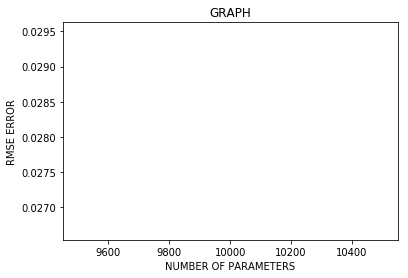

MIN ERROR RMSE== 0.028082597543683183     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [49]:
#BUILD THE GRAPH
X=np.array(parameter_lgbmRegressor)
Y=np.array(accuracy_lgbmRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [50]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
nombre=0
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        nombre+=1
        #print(train_data["galaxy"].loc[i])
print("nombre==",nombre)

nombre== 2


# <center >XGB REGRESSOR </center> #

In [51]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]


###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_xgb_regressor=[]
parameter_xgb_regressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_xgb_regressor.append(i+1)
    xgb_clf_regressor =XGBRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1000)
    #training the xgb model
    xgb_clf_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)
    
    #predictor and calcul rms
    prediction_=xgb_clf_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_xgb_regressor.append(rmse)
timer(start_time)

print(rmse)

/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:13:16] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Time taken: 0 hours 1 minutes and 22.69 seconds.
0.014931577205978649


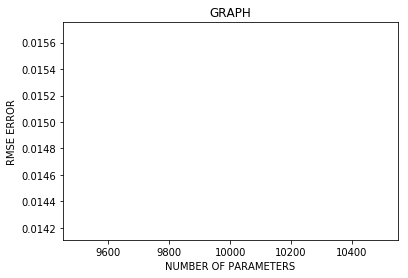

MIN ERROR RMSE== 0.014931577205978649     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [52]:
#BUILD THE GRAPH
X=np.array(parameter_xgb_regressor)
Y=np.array(accuracy_xgb_regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [53]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
###############################################################################################################
###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]
################################################################################################################
#--------------------------------------------------------------------------------------------------------------#
#preprocessing Data
#train_data_preprocessing=Feature_Engineering_version_1train_data)
#test_data_preprocessing=Feature_Engineering_version_1(test_data)
train_data_preprocessing=Feature_Engineering_version_2(train_data)
test_data_preprocessing=Feature_Engineering_version_2(test_data)
#train_data_preprocessing=Feature_Engineering_version_3(train_data)
#test_data_preprocessing=Feature_Engineering_version_3(test_data)
#train_data_preprocessing=Feature_Engineering_version_4(train_data)
#test_data_preprocessing=Feature_Engineering_version_4(test_data)
#--------------------------------------------------------------------------------------------------------------#
################################################################################################################

#build the model
xgb_clf_regressor =XGBRegressor(n_estimators=10001, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1000)
#fit the model
xgb_clf_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)


prediction_test=xgb_clf_regressor.predict(test_data_preprocessing)
#test_data["y"]=np.abs(prediction_test)
################################################################################################################
#---------------------------------------------------------------------------------------------------------------
#op_pred=repartition_energy_strategy_1(test_data,10)
#op_pred=repartition_energy_strategy_2(test_data,11)
#op_pred=repartition_energy_strategy_3(test_data,11)
#op_pred=repartition_energy_strategy_4(test_data,10)
#op_pred=repartition_energy_strategy_5(test_data,10)
#op_pred=repartition_energy_strategy_6(test_data,10)
#op_pred=repartition_energy_strategy_7(test_data,10)
#op_pred=repartition_energy_strategy_9(test_data,10)
#op_pred=repartition_energy_strategy_10(test_data,10)
#op_pred=repartition_energy_strategy_11(test_data,10)
#op_pred=repartition_energy_strategy_12(test_data)
#op_pred=repartition_energy_strategy_13(test_data,10)

#---------------------------------------------------------------------------------------------------------------
################################################################################################################
#prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
#for i in range(prediction_test.shape[0]):
#    prediction_liste.append([np.abs(prediction_test[i]),np.abs(op_pred[i])])
    
    
#statistique 
#Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
#print("----------------------------------------------------------------------------------------------------------")
#print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
#print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
#print("TOTAL INDEX                          = ",total_index)

#save the prediction
#save_liste(prediction_liste,"prediction_")
#save_liste(prediction_liste,"_")

/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:14:40] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## <center> RANDOM FOREST REGRESSOR</center> ##

In [54]:
#load datalassifier 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_2(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_random_forest_regressor=[]
parameter_random_forest_regressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_random_forest_regressor.append(i+1)
    rfc_regressor = RandomForestRegressor(n_estimators=i+1, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the random forest model
    rfc_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)    
    #predictor and calcul rms
    prediction_=rfc_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_random_forest_regressor.append(rmse)
timer(start_time)


Time taken: 0 hours 3 minutes and 22.02 seconds.


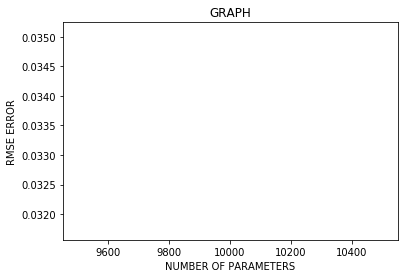

MIN ERROR== 0.03340502074759469      and n_estimators== 10001


In [55]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_regressor)
Y=np.array(accuracy_random_forest_regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR==",min_rmse,"     and n_estimators==",estimator)

## LIKELY IN HERE WE TRY TO BUILD THE GRAPHE OF LIKELY INCREASE IN FACT PARAMETOR OF MODEL USING RANDOM FOREST REGRESSOR

In [59]:
#load data 
train_data=pd.read_csv("DATA/train.csv")
test_data=pd.read_csv("DATA/test.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_4(train_data)
test_data_preprocessing=Feature_Engineering_4(test_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
likely_increase_random_forest_Regressor=[]
parameter_random_forest_Regressor=[]
potential_increase_random_forest_Regressor=[]
total_index_random_forest_Regressor=[]

start_time = timer(None)
for i in [1,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
    parameter_random_forest_Regressor.append(i+1)
    rfc_regressor = RandomForestRegressor(n_estimators=i+1, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the bagging model
    rfc_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)

    #compute the test
    prediction_test=rfc_regressor.predict(test_data_preprocessing)
    test_data["y"]=prediction_test    
    op_pred=repartition_energy_strategy_5(test_data,10)
    prediction_liste=[]
    for i in range(prediction_test.shape[0]):
        prediction_liste.append([prediction_test[i],op_pred[i]])
    
    #statistique predictor
    Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
    likely_increase_random_forest_Regressor.append(Potential_for_increase_in_the_Index)
    potential_increase_random_forest_Regressor.append(Likely_increase_in_the_Index)
    total_index_random_forest_Regressor.append(total_index)
    
timer(start_time)

## Testing Gradient Boosting for Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)

bagging_regressor = GradientBoostingRegressor(n_estimators=10001, learning_rate= 0.09, max_depth=3,min_samples_split=1000, min_samples_leaf=1)

error=cross_val_score(bagging_regressor, train_data_preprocessing, Y_train_data_preprocessing, cv=5, scoring=make_scorer(mean_squared_error))


print(sqrt(error.mean()))


In [ ]:
for i in range(5):
    print(sqrt(error[i]))

In [95]:
#prediction_=bagging_regressor.predict(DATA_node_test_preprocessing)